In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[01/23/25 14:19:43] INFO     Resolved project path as:                                              ]8;id=964550;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=959481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/23/25 14:19:43] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=548149;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=260769;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=175663;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=30054;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=151212;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=601625;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=870591;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=240298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=896541;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=183728;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=268367;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=935172;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=483447;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=294271;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/23/25 14:19:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=501462;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=261992;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=735252;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=664691;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=752393;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=585808;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=469031;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=201017;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=375746;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=898683;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### models:

In [8]:
info_save_all = catalog.load('info_save_all')

[01/22/25 19:16:04] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=230117;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=731302;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
info_save_all_anterior = catalog.load('info_save_all_anterior')

[01/14/25 17:55:09] INFO     Loading data from 'info_save_all_anterior' (PickleDataSet)...      ]8;id=261770;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=73973;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
info_save_all.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

In [10]:
info_save_all['best_model_metrics_dataset'] # sin eda, 2do experimento

model_name dataset_name metric_name   metric_type class_name  \
17    Run2,xgboost_1         test    f1-score  class metric        1.0   
15    Run2,xgboost_1         test   precision  class metric        1.0   
61        Run7,MLP_6         test      recall  class metric        1.0   
14    Run2,xgboost_1        train    f1-score  class metric        1.0   
12    Run2,xgboost_1        train   precision  class metric        1.0   
94  Run11,xgboost_10        train      recall  class metric        1.0   

      value  
17  11.9565  
15   6.6380  
61  74.0484  
14  14.0183  
12   7.7848  
94  83.9734

In [11]:
info_save_all['all_results'][(info_save_all['all_results']['model_name'] == 'Run7,MLP_6') & (info_save_all['all_results']['metric_name'] == 'recall')]

model_name dataset_name metric_name     metric_type      class_name  \
2   Run7,MLP_6      balance      recall  overall metric  overall metric   
13  Run7,MLP_6      balance      recall    class metric             0.0   
14  Run7,MLP_6      balance      recall    class metric             1.0   
2   Run7,MLP_6        train      recall  overall metric  overall metric   
13  Run7,MLP_6        train      recall    class metric             0.0   
14  Run7,MLP_6        train      recall    class metric             1.0   
2   Run7,MLP_6         test      recall  overall metric  overall metric   
13  Run7,MLP_6         test      recall    class metric             0.0   
14  Run7,MLP_6         test      recall    class metric             1.0   

      value  
2   75.0557  
13  74.2793  
14  75.0557  
2   74.4487  
13  74.1501  
14  74.4487  
2   74.0484  
13  74.1433  
14  74.0484

In [12]:
74.4487-74.0484

0.40030000000000143

In [11]:
info_save_all['best_model_metrics_dataset'] # sin eda, 1er experimento

model_name dataset_name metric_name   metric_type class_name  \
17    Run2,xgboost_1         test    f1-score  class metric        1.0   
15    Run2,xgboost_1         test   precision  class metric        1.0   
88       Run10,MLP_9         test      recall  class metric        1.0   
14    Run2,xgboost_1        train    f1-score  class metric        1.0   
12    Run2,xgboost_1        train   precision  class metric        1.0   
94  Run11,xgboost_10        train      recall  class metric        1.0   

      value  
17  11.0626  
15   6.0534  
88  73.4165  
14  11.8773  
12   6.4994  
94  80.3439

In [15]:
info_save_all['all_results'][(info_save_all['all_results']['model_name'] == 'Run10,MLP_9') & (info_save_all['all_results']['metric_name'] == 'recall')]

model_name dataset_name metric_name     metric_type      class_name  \
2   Run10,MLP_9      balance      recall  overall metric  overall metric   
13  Run10,MLP_9      balance      recall    class metric             0.0   
14  Run10,MLP_9      balance      recall    class metric             1.0   
2   Run10,MLP_9        train      recall  overall metric  overall metric   
13  Run10,MLP_9        train      recall    class metric             0.0   
14  Run10,MLP_9        train      recall    class metric             1.0   
2   Run10,MLP_9         test      recall  overall metric  overall metric   
13  Run10,MLP_9         test      recall    class metric             0.0   
14  Run10,MLP_9         test      recall    class metric             1.0   

      value  
2   73.6664  
13  74.4496  
14  73.6664  
2   73.6433  
13  74.3840  
14  73.6433  
2   73.4165  
13  74.3937  
14  73.4165

In [16]:
73.6433-73.4165

0.22679999999999723

In [13]:
info_save_all_anterior['best_model_metrics_dataset']

model_name dataset_name metric_name   metric_type class_name  \
8         Run1,MLP_0         test    f1-score  class metric          1   
6         Run1,MLP_0         test   precision  class metric          1   
88       Run10,MLP_9         test      recall  class metric          1   
14    Run2,xgboost_1        train    f1-score  class metric          1   
12    Run2,xgboost_1        train   precision  class metric          1   
94  Run11,xgboost_10        train      recall  class metric          1   

      value  
8   43.4771  
6   31.3033  
88  76.4862  
14  47.2624  
12  31.7713  
94  93.6281

In [19]:
76.5952-76.4862

0.10900000000000887

In [18]:
info_save_all_anterior['all_results'][(info_save_all_anterior['all_results']['model_name'] == 'Run10,MLP_9') & (info_save_all_anterior['all_results']['metric_name'] == 'recall')]

model_name dataset_name metric_name     metric_type      class_name  \
2   Run10,MLP_9      balance      recall  overall metric  overall metric   
13  Run10,MLP_9      balance      recall    class metric               0   
14  Run10,MLP_9      balance      recall    class metric               1   
2   Run10,MLP_9        train      recall  overall metric  overall metric   
13  Run10,MLP_9        train      recall    class metric               0   
14  Run10,MLP_9        train      recall    class metric               1   
2   Run10,MLP_9         test      recall  overall metric  overall metric   
13  Run10,MLP_9         test      recall    class metric               0   
14  Run10,MLP_9         test      recall    class metric               1   

      value  
2   76.6523  
13  91.7479  
14  76.6523  
2   76.5952  
13  91.6475  
14  76.5952  
2   76.4862  
13  91.6351  
14  76.4862

info_save_all2 = info_save_all.copy()
for col in info_save_all.keys():
    if isinstance(col, int) and ('grid_search' not in info_save_all[col].keys()):
        del info_save_all2[col]

print(info_save_all2.keys())
print(info_save_all.keys())
info_save_last_all = models.evaluate_models_for_all(info_save_all2, params)
info_save_all_correct = models.compare_metrics_models(info_save_last_all, params)
print(info_save_all_correct.keys())

import pickle
import boto3
from io import BytesIO

# Configura el cliente de S3 (asegúrate de tener configuradas las credenciales de AWS)
s3_client = boto3.client('s3')

# Serializa el objeto en memoria (sin necesidad de archivo local)
pickle_buffer = BytesIO()
pickle.dump(info_save_all_correct, pickle_buffer)
pickle_buffer.seek(0)  # Vuelve al principio del buffer después de serializar


# Define el nombre del bucket y la ruta en S3
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_key = 'casos-uso/fabrica-personas/AH/06-models/info_save_all.pickle'

# Sube el archivo pickle a S3
s3_client.upload_fileobj(pickle_buffer, bucket_name, s3_key)

print("Object has been pickled and uploaded to S3.")

In [9]:
for i in range(12): # 1er experimento
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [13]:
for i in range(12): # 2do experimento
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [ ]:
# con eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

In [14]:
# sin eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

REINDEX    grupo_etario  \
llave                                                             
0                           grupo_etario__joven          _joven   
1                   grupo_etario__persona_mayor  _persona_mayor   
2                         ocupacion_comerciante             NaN   
3                         ocupacion_desempleado             NaN   
4                    ocupacion_empleado_entidad             NaN   
5                    ocupacion_empleado_privado             NaN   
6                    ocupacion_empleado_publico             NaN   
7                          ocupacion_estudiante             NaN   
8                   ocupacion_fuerzas_militares             NaN   
9                               ocupacion_hogar             NaN   
10                      ocupacion_independiente             NaN   
11                         ocupacion_pensionado             NaN   
12                   ocupacion_policia_nacional             NaN   
13                           ocupacion_politico             NaN   
14          ocupacion_profesional_independiente             NaN   
15                ocupacion_rentista_de_capital             NaN   
DROP_FIRST                                  NaN         _adulto   

                            ocupacion  
llave                                  
0                    empleado_privado  
1                          pensionado  
2                    empleado_publico  
3                          estudiante  
4                       independiente  
5                               hogar  
6                 rentista_de_capital  
7                         desempleado  
8                         comerciante  
9           profesional_independiente  
10                   policia_nacional  
11                   empleado_entidad  
12                  fuerzas_militares  
13                           politico  
14                                NaN  
15                                NaN  
DROP_FIRST                    artista

In [ ]:
# con EDA
info_temp = models.compare_metrics_models(info_save_all,params)

                    INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=277028;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=663642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=317652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=740234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

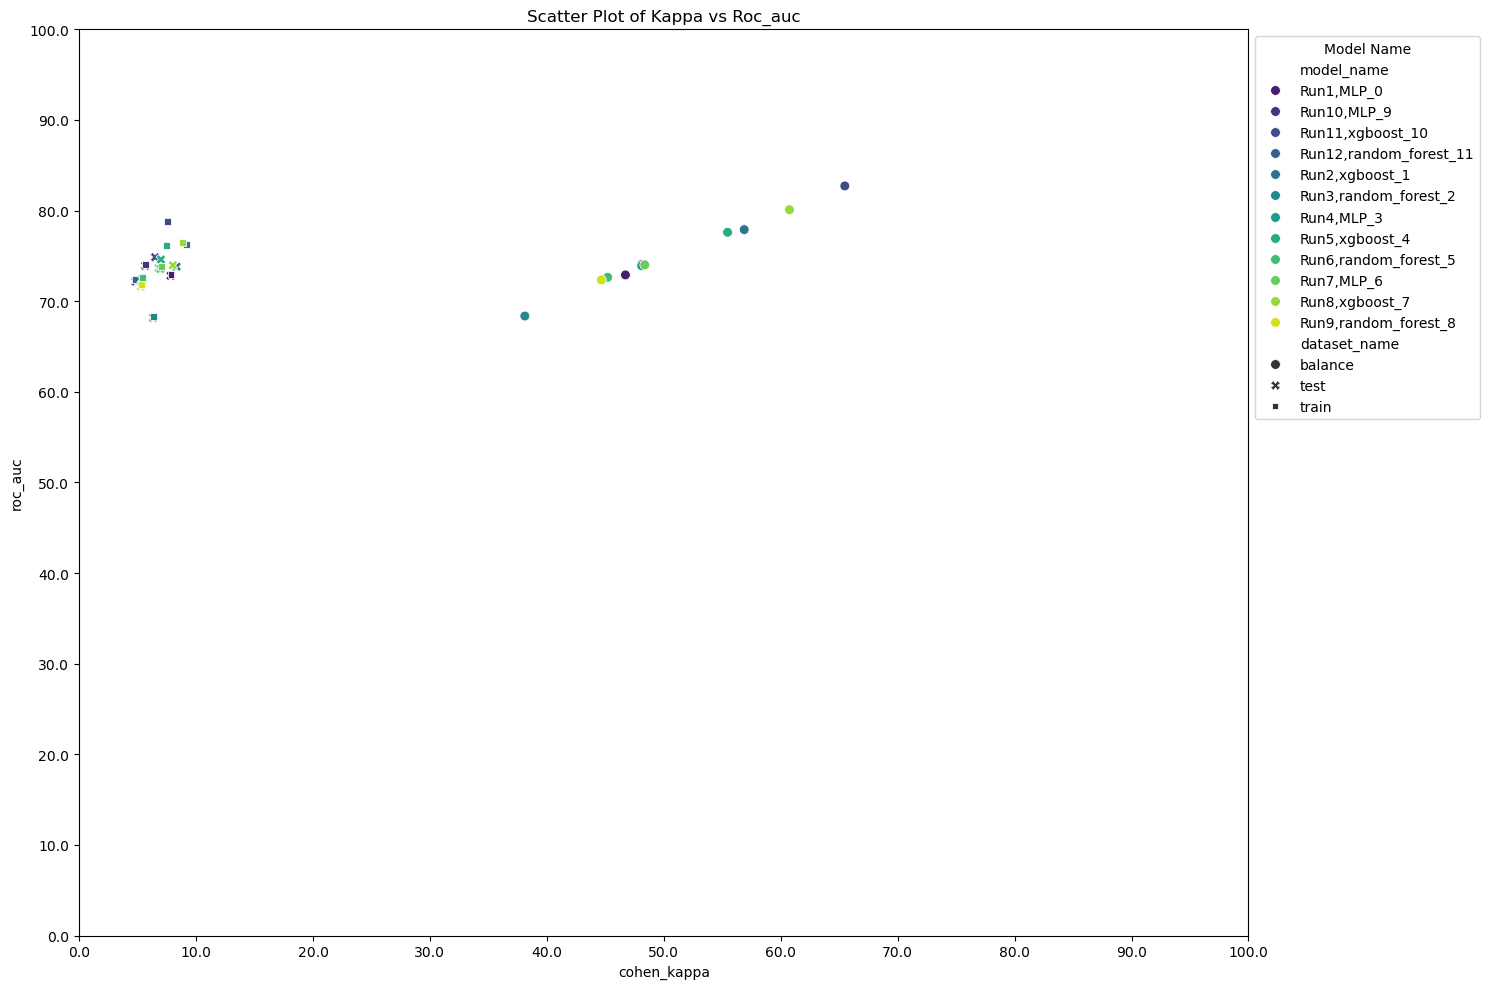

                    INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=979639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=2827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

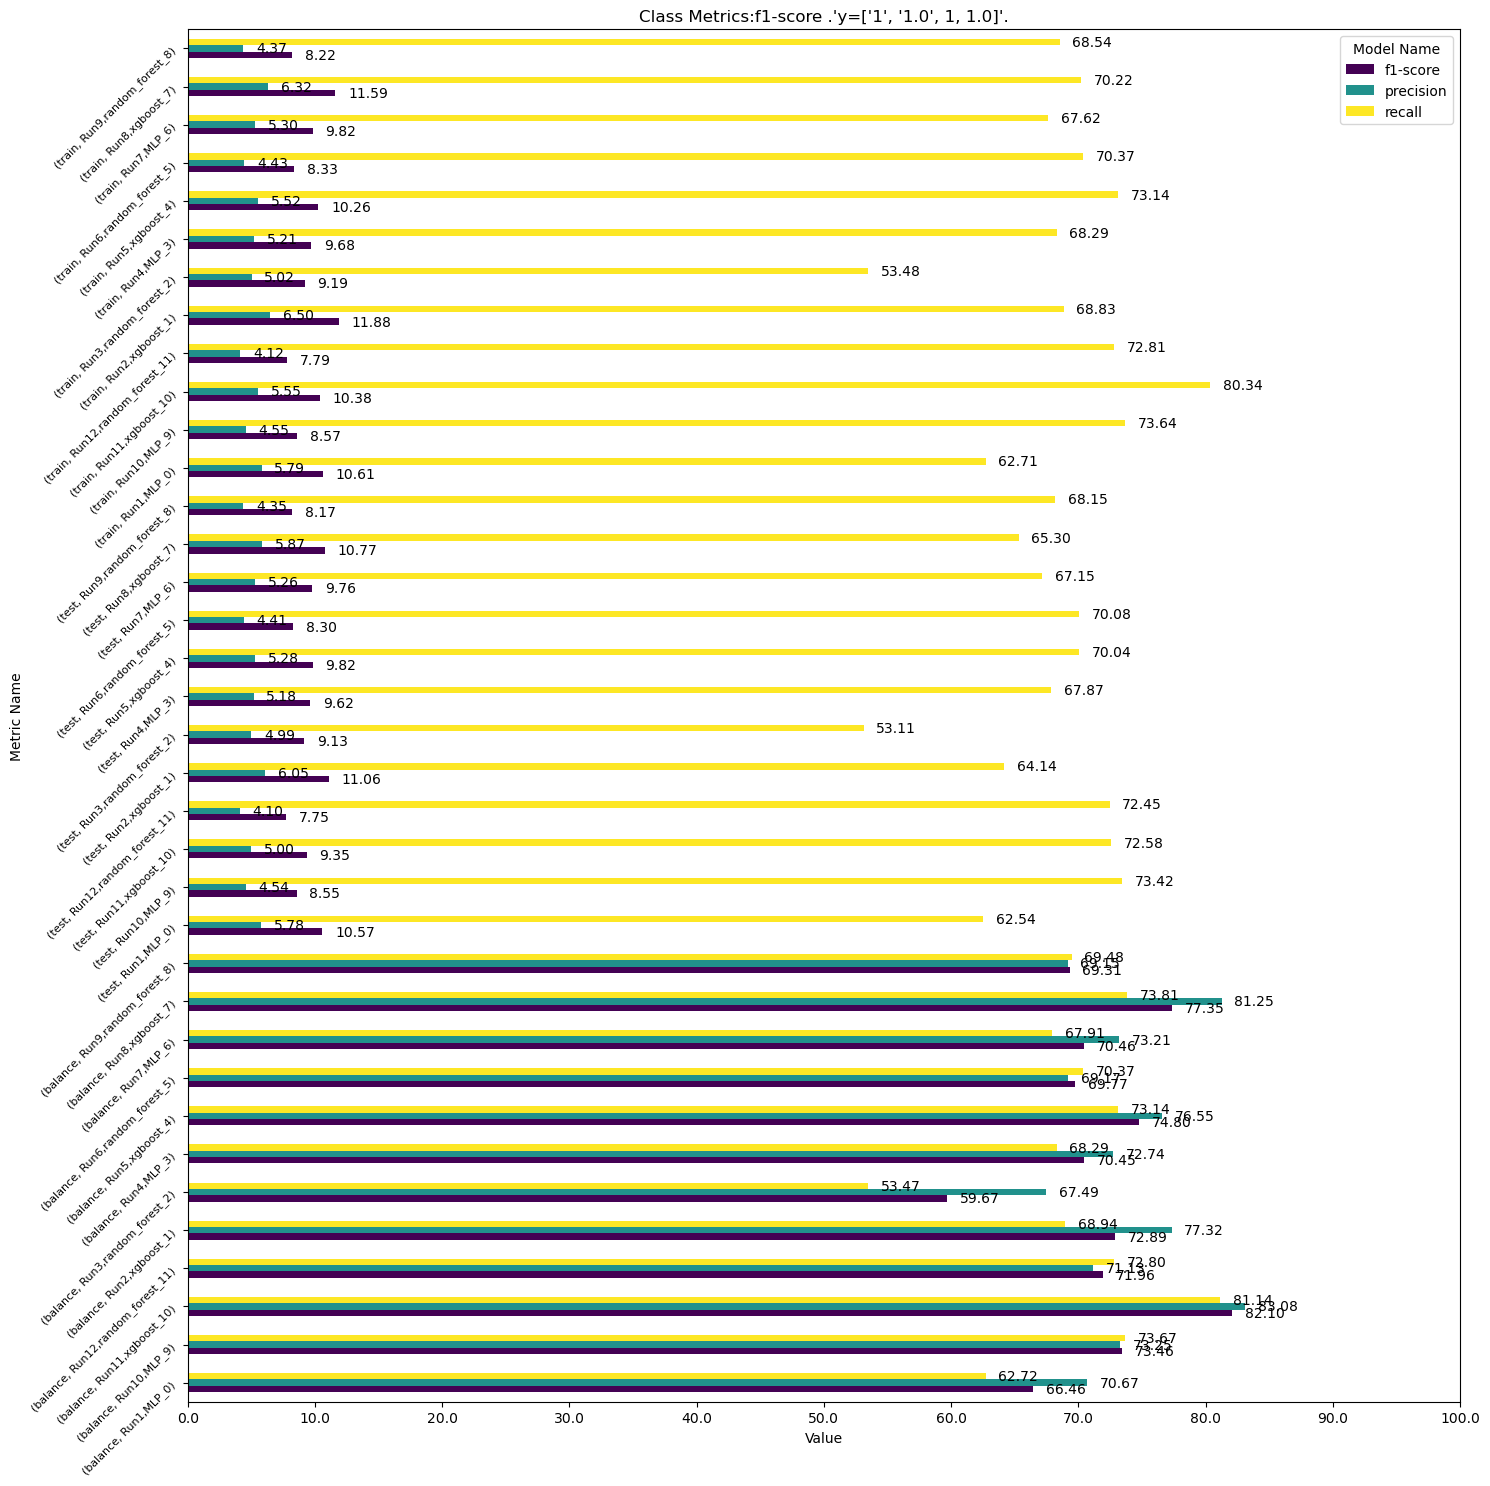

[01/14/25 20:34:33] INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=893892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=932607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

model_name dataset_name metric_name   metric_type class_name  \
17    Run2,xgboost_1         test    f1-score  class metric        1.0   
15    Run2,xgboost_1         test   precision  class metric        1.0   
88       Run10,MLP_9         test      recall  class metric        1.0   
14    Run2,xgboost_1        train    f1-score  class metric        1.0   
12    Run2,xgboost_1        train   precision  class metric        1.0   
94  Run11,xgboost_10        train      recall  class metric        1.0   

      value  
17  11.0626  
15   6.0534  
88  73.4165  
14  11.8773  
12   6.4994  
94  80.3439

                    INFO     Mejores algoritmos:                                                      ]8;id=483525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=600241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

best_model_name   best_unbiased_model best_fitting_model
model_name   Run2,xgboost_1  Run3,random_forest_2        Run10,MLP_9
metric_name        f1-score              f1-score           f1-score
metric_type    class metric          class metric       class metric
class_name              1.0                   1.0                1.0
test                11.0626                9.1266              8.548
balance             72.8925               59.6676            73.4601
train               11.8773                9.1852             8.5703
bias               -61.0152              -50.4824           -64.8898
real_bias              True                  True               True
test-train          -0.8147               -0.0586            -0.0223
fitting         overfitting           overfitting        overfitting

In [13]:
# sin EDA 1er experimento
info_temp = models.compare_metrics_models(info_save_all,params)

[01/22/25 19:49:34] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=327733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=258932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=288763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=520620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

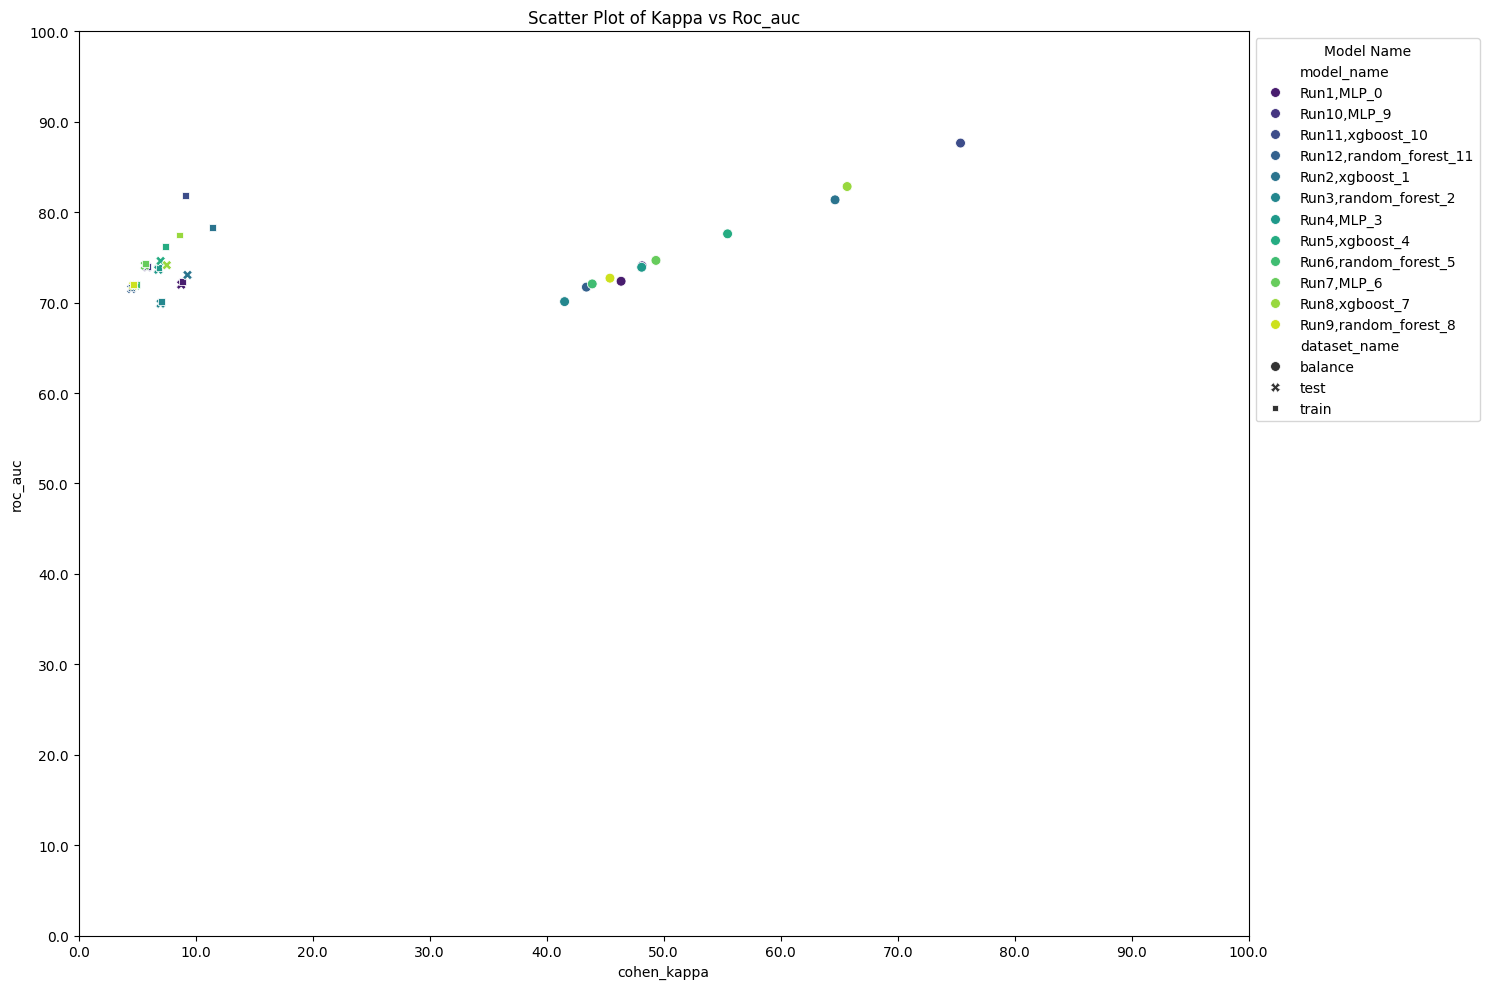

[01/22/25 19:49:35] INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=790408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=811765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

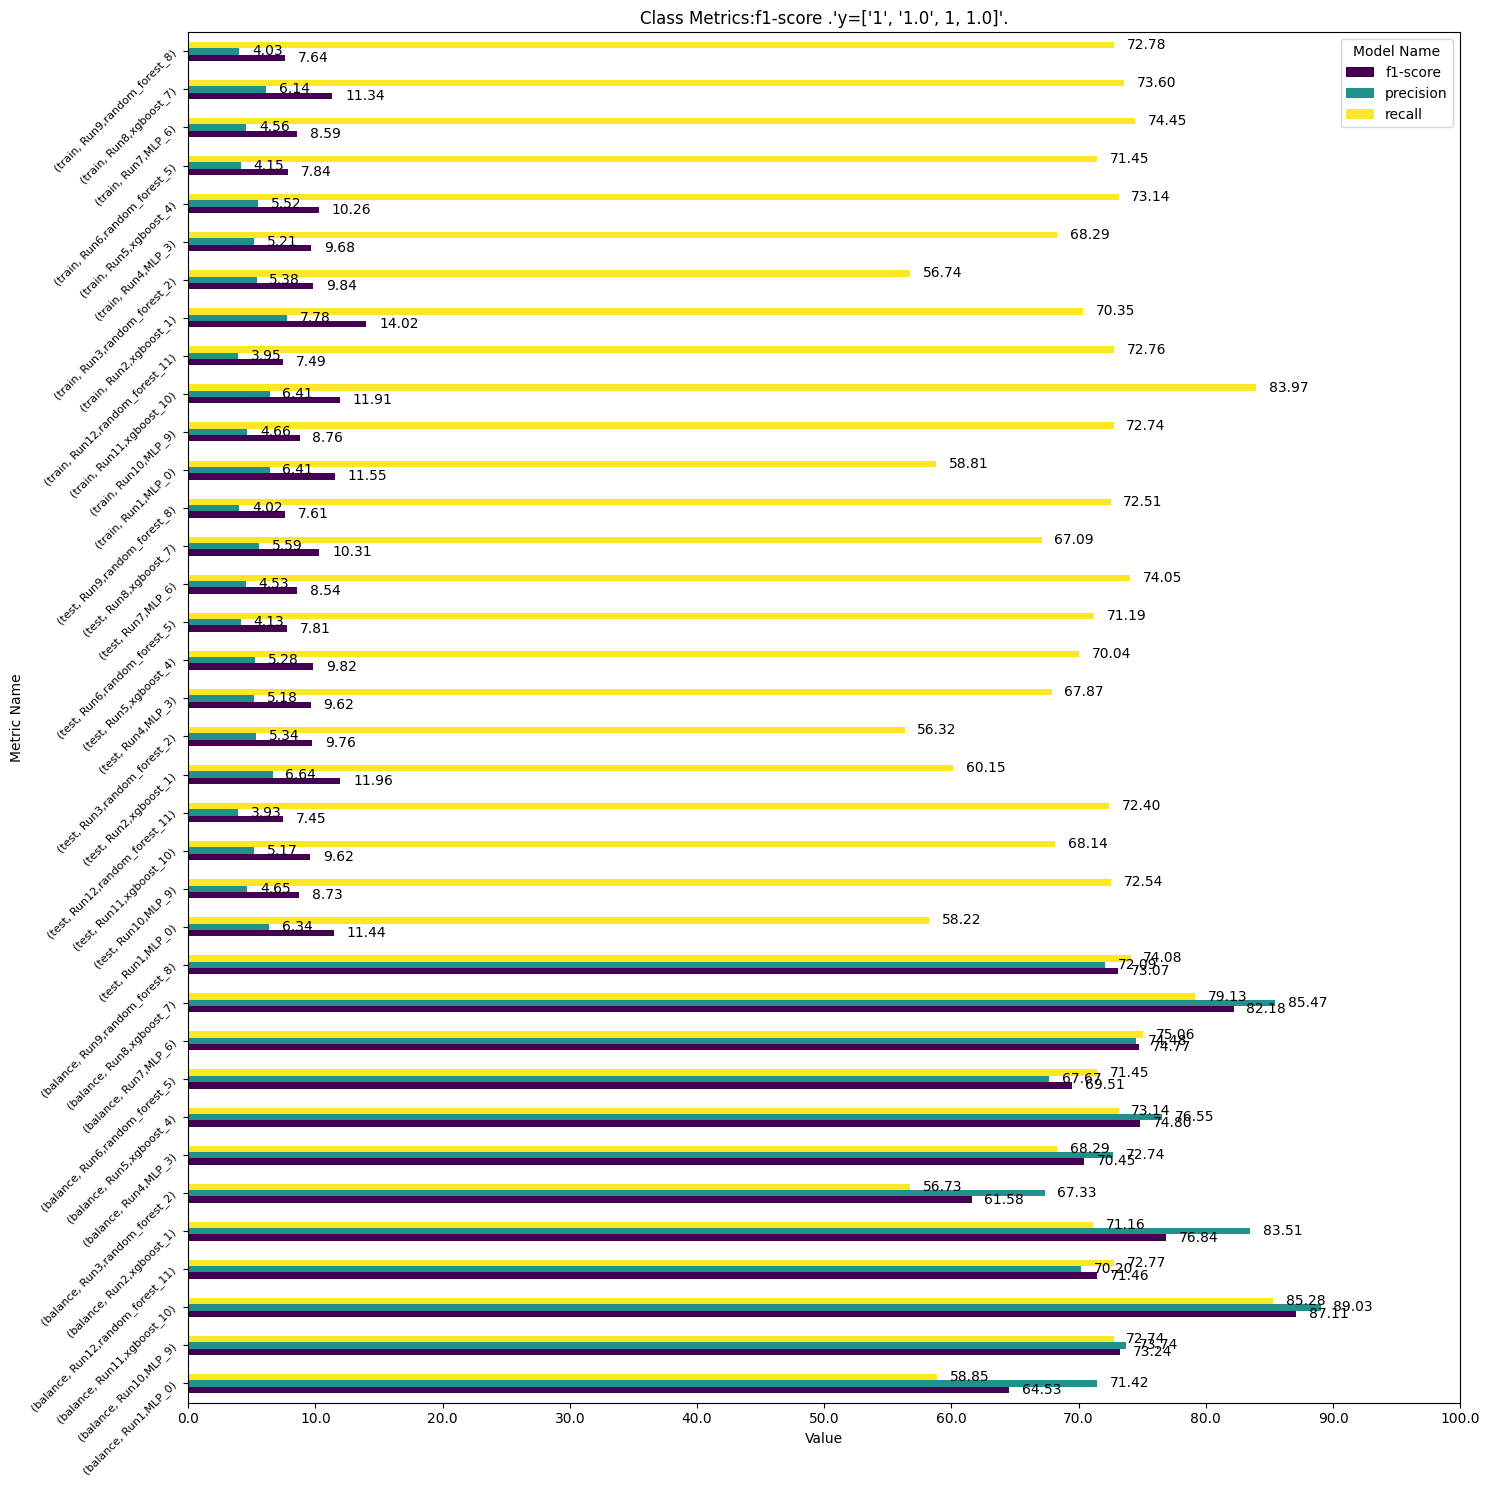

[01/22/25 19:49:36] INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=455840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=819501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

model_name dataset_name metric_name   metric_type class_name  \
17    Run2,xgboost_1         test    f1-score  class metric        1.0   
15    Run2,xgboost_1         test   precision  class metric        1.0   
61        Run7,MLP_6         test      recall  class metric        1.0   
14    Run2,xgboost_1        train    f1-score  class metric        1.0   
12    Run2,xgboost_1        train   precision  class metric        1.0   
94  Run11,xgboost_10        train      recall  class metric        1.0   

      value  
17  11.9565  
15   6.6380  
61  74.0484  
14  14.0183  
12   7.7848  
94  83.9734

                    INFO     Mejores algoritmos:                                                      ]8;id=488591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=110370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

best_model_name   best_unbiased_model best_fitting_model
model_name   Run2,xgboost_1  Run3,random_forest_2        Run10,MLP_9
metric_name        f1-score              f1-score           f1-score
metric_type    class metric          class metric       class metric
class_name              1.0                   1.0                1.0
test                11.9565                9.7624             8.7338
balance             76.8444               61.5805            73.2387
train               14.0183                9.8356             8.7599
bias               -62.8261              -51.7449           -64.4788
real_bias              True                  True               True
test-train          -2.0618               -0.0732            -0.0261
fitting         overfitting           overfitting        overfitting

In [15]:
# sin EDA 2do experimento
info_temp = models.compare_metrics_models(info_save_all,params)

In [12]:
pct = 0.65

In [ ]:
# con EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df

In [ ]:
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)

In [ ]:
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)

In [ ]:
df_metrics_test[df_metrics_test['model_name'].isin(names)]

In [ ]:
df_metrics_train[df_metrics_train['model_name'].isin(names)]

In [ ]:
info_save_all['best_model_metrics_dataset']

In [14]:
# sin EDA, 1er experimento
pct = 0.58
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run5', 'Run7', 'Run8']
[1, 1, 1, 1, 1]
Total de modelo:  5


model_name dataset_name metric_name   metric_type class_name    value
16  Run2,xgboost_1         test    f1-score  class metric        1.0  11.0626
16  Run8,xgboost_7         test    f1-score  class metric        1.0  10.7667
16      Run1,MLP_0         test    f1-score  class metric        1.0  10.5750
16  Run5,xgboost_4         test    f1-score  class metric        1.0   9.8176
16      Run7,MLP_6         test    f1-score  class metric        1.0   9.7591

model_name dataset_name metric_name   metric_type class_name    value
16  Run2,xgboost_1        train    f1-score  class metric        1.0  11.8773
16  Run8,xgboost_7        train    f1-score  class metric        1.0  11.5938
16      Run1,MLP_0        train    f1-score  class metric        1.0  10.6089
16  Run5,xgboost_4        train    f1-score  class metric        1.0  10.2583
16      Run7,MLP_6        train    f1-score  class metric        1.0   9.8232

model_name dataset_name metric_name   metric_type class_name  \
17    Run2,xgboost_1         test    f1-score  class metric        1.0   
15    Run2,xgboost_1         test   precision  class metric        1.0   
88       Run10,MLP_9         test      recall  class metric        1.0   
14    Run2,xgboost_1        train    f1-score  class metric        1.0   
12    Run2,xgboost_1        train   precision  class metric        1.0   
94  Run11,xgboost_10        train      recall  class metric        1.0   

      value  
17  11.0626  
15   6.0534  
88  73.4165  
14  11.8773  
12   6.4994  
94  80.3439

In [20]:
# sin EDA, 2do experimento
pct = 0.58
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run3', 'Run5', 'Run8']
[1, 1, 1, 1, 1]
Total de modelo:  5


model_name dataset_name metric_name   metric_type class_name  \
16        Run2,xgboost_1         test    f1-score  class metric        1.0   
16            Run1,MLP_0         test    f1-score  class metric        1.0   
16        Run8,xgboost_7         test    f1-score  class metric        1.0   
16        Run5,xgboost_4         test    f1-score  class metric        1.0   
16  Run3,random_forest_2         test    f1-score  class metric        1.0   

      value  
16  11.9565  
16  11.4408  
16  10.3126  
16   9.8176  
16   9.7624

model_name dataset_name metric_name   metric_type class_name  \
16        Run2,xgboost_1        train    f1-score  class metric        1.0   
16            Run1,MLP_0        train    f1-score  class metric        1.0   
16        Run8,xgboost_7        train    f1-score  class metric        1.0   
16        Run5,xgboost_4        train    f1-score  class metric        1.0   
16  Run3,random_forest_2        train    f1-score  class metric        1.0   

      value  
16  14.0183  
16  11.5541  
16  11.3355  
16  10.2583  
16   9.8356

model_name dataset_name metric_name   metric_type class_name  \
17    Run2,xgboost_1         test    f1-score  class metric        1.0   
15    Run2,xgboost_1         test   precision  class metric        1.0   
61        Run7,MLP_6         test      recall  class metric        1.0   
14    Run2,xgboost_1        train    f1-score  class metric        1.0   
12    Run2,xgboost_1        train   precision  class metric        1.0   
94  Run11,xgboost_10        train      recall  class metric        1.0   

      value  
17  11.9565  
15   6.6380  
61  74.0484  
14  14.0183  
12   7.7848  
94  83.9734

## model_selection

In [17]:
## algoritmo anterior

In [57]:
info_save_select_ini = catalog.load('info_save_select_anterior') # best model unico

[01/14/25 21:51:32] INFO     Loading data from 'info_save_select_anterior' (PickleDataSet)...   ]8;id=527118;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=35471;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [58]:
check_df = info_save_select_ini['select_model2']
check_df = check_df[np.in1d(check_df.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df = check_df[check_df['class_name'].isin([1,1.0,'1','1.0'])]
check_df = check_df.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df

value  \
metric_name     dataset_name class_name select_model    name_model             
Precision n_top test         1          best_model_name Run4          0.1233   
                train        1          best_model_name Run4        0.428335   
backtest        test         1          best_model_name Run4        0.126683   
                train        1          best_model_name Run4        0.031599   
f1-score n_top  test         1          best_model_name Run4        0.219532   
                train        1          best_model_name Run4        0.599768   
recall n_top    test         1          best_model_name Run4             1.0   
                train        1          best_model_name Run4             1.0   

                                                                   model_name  
metric_name     dataset_name class_name select_model    name_model             
Precision n_top test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3  
backtest        test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3  
f1-score n_top  test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3  
recall n_top    test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3

In [ ]:
info_save_select_mvp2 = catalog.load('info_save_select_mvp2') # best model unico

In [ ]:
check_df_mvp2 = info_save_select_mvp2['select_model2']
check_df_mvp2 = check_df_mvp2[np.in1d(check_df_mvp2.index.get_level_values(1),['backtest'])].reset_index() 
check_df_mvp2 = check_df_mvp2.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_mvp2

In [21]:
params['Ensamble']['want'] = True
params['optimizacion_bayesiana']['want'] = False
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [22]:
params['n_obs_filter']

0.3

In [23]:
params['use_key']

{'want': False, 'llave': ['Run10,xgboost_9'], 'estrategia': ['best_model_name']}

In [24]:
params['Ensamble']


{
    'want': True,
    'Algoritmos': ['Run1', 'Run2', 'Run3', 'Run5', 'Run8'],
    'weights': [1, 1, 1, 1, 1],
    'scorer': 'backtest_scorer'
}

In [25]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

[01/22/25 19:51:18] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=314406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#747\747]8;;\

                    INFO     train                                                                     ]8;id=208381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=878587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=717303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=863847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:51:30] INFO     Nodo 1, Run2                                                              ]8;id=159146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=809448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:51:50] INFO     Nodo 2, Run3                                                              ]8;id=355211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=262920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.6s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   25.9s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   51.6s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/22/25 19:53:01] INFO     Nodo 4, Run5                                                              ]8;id=664998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=210019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:53:08] INFO     Nodo 7, Run8                                                              ]8;id=260775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:53:25] INFO     test                                                                      ]8;id=253907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=867454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=536198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=659026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:53:28] INFO     Nodo 1, Run2                                                              ]8;id=535715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=238764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:53:34] INFO     Nodo 2, Run3                                                              ]8;id=323717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=14666;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    2.0s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    6.9s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   13.5s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:   17.7s finished


[01/22/25 19:53:52] INFO     Nodo 4, Run5                                                              ]8;id=684932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=867084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:53:54] INFO     Nodo 7, Run8                                                              ]8;id=312664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=105835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/22/25 19:54:20] INFO     Ok Forecast                                                               ]8;id=623050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=418677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#723\723]8;;\

                    INFO     Iniciando el calculo de las metricas...                                  ]8;id=915977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=549285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1073\1073]8;;\

                    INFO     Tipo de Threshold: KS                                                    ]8;id=801853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=22665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1079\1079]8;;\

                    INFO     Models: best_model_name                                                  ]8;id=48986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_model_name                                               ]8;id=349150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=647276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6753228                                                           ]8;id=814144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/22/25 19:54:50] INFO     TOP N: 1688307                                                           ]8;id=329118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=712125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          8.2394       Run2  xgboost_1   
           true_sum n_top test           72542       Run2  xgboost_1   
           backtest       test          4.2967       Run2  xgboost_1   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[01/22/25 19:54:57] INFO     Models: best_unbiased_model                                              ]8;id=354992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=648512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_unbiased_model                                           ]8;id=585075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6753228                                                           ]8;id=83286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=541014;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.5s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   25.9s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   51.7s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/22/25 19:56:18] INFO     TOP N: 1688307                                                           ]8;id=456579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=635364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    2.0s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    6.9s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   13.6s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:   17.9s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          7.6262       Run3  random_forest_2   
           true_sum n_top test           66929       Run3  random_forest_2   
           backtest       test          3.9643       Run3  random_forest_2   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[01/22/25 19:56:38] INFO     Models: best_fitting_model                                               ]8;id=978964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=316774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_fitting_model                                            ]8;id=110872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=482975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6753228                                                           ]8;id=553057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=29887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/22/25 19:56:52] INFO     TOP N: 1688307                                                           ]8;id=774429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

value name_model model_name  \
class_name metric_name    dataset_name                                 
1          f1-score n_top test          8.0578      Run10      MLP_9   
           true_sum n_top test           70876      Run10      MLP_9   
           backtest       test          4.1981      Run10      MLP_9   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[01/22/25 19:56:55] INFO     Estrategy: modelo_produccion                                             ]8;id=604432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=713010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6753228                                                           ]8;id=163191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/22/25 19:57:09] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=171050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=191122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/22/25 19:57:10] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=682402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=205167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=610665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=133373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=585700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=334641;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=13522;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=179421;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=679360;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=607541;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=805307;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=984336;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=966994;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=430064;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=270090;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=386668;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=114196;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=910912;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=311304;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=533126;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=697529;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=537263;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=829587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=492527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/22/25 19:57:34] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=763243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=759943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=816731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=396966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=619319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=800798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76]                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=482319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=606069;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=953961;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=56429;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=187761;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=846641;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=414136;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=529747;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=209055;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=127256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=621805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.7s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   26.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   52.1s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/22/25 19:58:47] INFO     Try Segment Dist Probs: 90                                               ]8;id=85631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=524836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/22/25 19:58:50] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=553207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=487154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=643648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=361456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [89, 88, 87, 86, 85, 84, 83, 82, 81, 80,    ]8;id=254057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=526011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 66, 65, 64, 63, 58]                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=35048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=82521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=437882;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=695165;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=619604;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=898000;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=780970;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=895022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=341427;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=182504;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=230862;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=87449;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=277152;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=595427;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=241388;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=867958;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

[01/22/25 19:58:51] INFO     Finalizando el procesamiento del ks                                      ]8;id=738793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=68732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/22/25 19:59:00] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=620736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=970757;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/22/25 19:59:01] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=54076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=15820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=847718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=815649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72]                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=314176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=644201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=555157;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=493900;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=43379;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=789130;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=427828;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=130635;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=857637;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=911393;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=490435;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=373261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=890623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=410075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/22/25 19:59:19] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=305432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=287861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=939733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=774406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=306423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=890764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74]                                           

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=955347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=896990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=747649;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=361176;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=259715;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=466514;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=507796;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=174716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=163983;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=501090;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=169568;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=961882;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=205077;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=790123;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=195711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=513606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=46721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=512299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=641898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=862567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=73949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 19:59:33] INFO     Update probs: Selected: 0, Target Select: 6753228, Diff %: -1.0           ]8;id=725053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 19:59:37] INFO     Update probs: Selected: 236765, Target Select: 6753228, Diff %:           ]8;id=948033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=598144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649404699500742                                                                   

[01/22/25 19:59:41] INFO     Update probs: Selected: 474034, Target Select: 6753228, Diff %:           ]8;id=470980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298063089236732                                                                   

[01/22/25 19:59:46] INFO     Update probs: Selected: 710942, Target Select: 6753228, Diff %:           ]8;id=36945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=332870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947256038149459                                                                   

[01/22/25 19:59:50] INFO     Update probs: Selected: 947918, Target Select: 6753228, Diff %:           ]8;id=956883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=177307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596348294474879                                                                   

[01/22/25 19:59:54] INFO     Update probs: Selected: 1184471, Target Select: 6753228, Diff %:          ]8;id=20929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=685859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8246066917924287                                                                   

[01/22/25 19:59:59] INFO     Update probs: Selected: 1422190, Target Select: 6753228, Diff %:          ]8;id=229893;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=968105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894058959656034                                                                   

[01/22/25 20:00:03] INFO     Update probs: Selected: 1658458, Target Select: 6753228, Diff %:          ]8;id=888172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=960125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544199603508129                                                                   

[01/22/25 20:00:07] INFO     Update probs: Selected: 1895901, Target Select: 6753228, Diff %:          ]8;id=47761;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=630239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192600338682479                                                                   

[01/22/25 20:00:12] INFO     Update probs: Selected: 2132803, Target Select: 6753228, Diff %:          ]8;id=130504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841802172235263                                                                   

[01/22/25 20:00:16] INFO     Update probs: Selected: 2369756, Target Select: 6753228, Diff %:          ]8;id=126060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=561198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490928486347566                                                                   

[01/22/25 20:00:20] INFO     Update probs: Selected: 2607097, Target Select: 6753228, Diff %:          ]8;id=774062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=687734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139480260402876                                                                   

[01/22/25 20:00:24] INFO     Update probs: Selected: 2842935, Target Select: 6753228, Diff %:          ]8;id=610608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=254987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790257636792361                                                                   

[01/22/25 20:00:29] INFO     Update probs: Selected: 3081140, Target Select: 6753228, Diff %:          ]8;id=129135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=317618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437530022679524                                                                   

[01/22/25 20:00:33] INFO     Update probs: Selected: 3318026, Target Select: 6753228, Diff %:          ]8;id=324885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=518205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5086755548605792                                                                   

[01/22/25 20:00:37] INFO     Update probs: Selected: 3554856, Target Select: 6753228, Diff %:          ]8;id=187069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47360639978392555                                                                  

[01/22/25 20:00:42] INFO     Update probs: Selected: 3790658, Target Select: 6753228, Diff %:          ]8;id=898736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43868946820690785                                                                  

[01/22/25 20:00:46] INFO     Update probs: Selected: 4027901, Target Select: 6753228, Diff %:          ]8;id=7839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40355915719119806                                                                  

[01/22/25 20:00:50] INFO     Update probs: Selected: 4265933, Target Select: 6753228, Diff %:          ]8;id=614043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=31830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36831201315874423                                                                  

[01/22/25 20:00:55] INFO     Update probs: Selected: 4501963, Target Select: 6753228, Diff %:          ]8;id=220111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=216245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33336131994951157                                                                  

[01/22/25 20:00:59] INFO     Update probs: Selected: 4739320, Target Select: 6753228, Diff %:          ]8;id=515540;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=225891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2982141281176942                                                                   

[01/22/25 20:01:03] INFO     Update probs: Selected: 4976548, Target Select: 6753228, Diff %:          ]8;id=862503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=379375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26308603826199856                                                                  

[01/22/25 20:01:07] INFO     Update probs: Selected: 5212213, Target Select: 6753228, Diff %:          ]8;id=90600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=843223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22818939327977672                                                                  

[01/22/25 20:01:12] INFO     Update probs: Selected: 5449518, Target Select: 6753228, Diff %:          ]8;id=603391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19304990146934178                                                                  

[01/22/25 20:01:16] INFO     Update probs: Selected: 5687031, Target Select: 6753228, Diff %:          ]8;id=252997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=538399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15787960957337735                                                                  

[01/22/25 20:01:20] INFO     Update probs: Selected: 5924683, Target Select: 6753228, Diff %:          ]8;id=543876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=218709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12268873492794853                                                                  

[01/22/25 20:01:25] INFO     Update probs: Selected: 6159710, Target Select: 6753228, Diff %:          ]8;id=792694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=376928;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08788656328499497                                                                  

[01/22/25 20:01:29] INFO     Update probs: Selected: 6397278, Target Select: 6753228, Diff %:          ]8;id=738648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052708127135645357                                                                 

[01/22/25 20:01:33] INFO     Update probs: Selected: 6635349, Target Select: 6753228, Diff %:          ]8;id=213727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=475472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017455208087154766                                                                 

[01/22/25 20:01:38] INFO     Update probs: Selected: 6753228, Target Select: 6753228, Diff %: 0.0      ]8;id=42142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=722632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=968777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=784387;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=18269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=357799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=973225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:02:00] INFO     Update probs: Selected: 0, Target Select: 6753228, Diff %: -1.0           ]8;id=276589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:02:04] INFO     Update probs: Selected: 236993, Target Select: 6753228, Diff %:           ]8;id=198786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649067083178593                                                                   

[01/22/25 20:02:09] INFO     Update probs: Selected: 473705, Target Select: 6753228, Diff %:           ]8;id=326586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=97160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298550263666502                                                                   

[01/22/25 20:02:13] INFO     Update probs: Selected: 710850, Target Select: 6753228, Diff %:           ]8;id=967668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947392269296994                                                                   

[01/22/25 20:02:17] INFO     Update probs: Selected: 948203, Target Select: 6753228, Diff %:           ]8;id=462327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=932461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8595926274072192                                                                   

[01/22/25 20:02:21] INFO     Update probs: Selected: 1184933, Target Select: 6753228, Diff %:          ]8;id=53412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245382800639931                                                                   

[01/22/25 20:02:25] INFO     Update probs: Selected: 1421787, Target Select: 6753228, Diff %:          ]8;id=210639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=427450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894655711313168                                                                   

[01/22/25 20:02:29] INFO     Update probs: Selected: 1658616, Target Select: 6753228, Diff %:          ]8;id=352319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543965641319973                                                                   

[01/22/25 20:02:33] INFO     Update probs: Selected: 1896146, Target Select: 6753228, Diff %:          ]8;id=111660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192237549213502                                                                   

[01/22/25 20:02:38] INFO     Update probs: Selected: 2132748, Target Select: 6753228, Diff %:          ]8;id=258876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=333461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841883614769115                                                                   

[01/22/25 20:02:42] INFO     Update probs: Selected: 2369982, Target Select: 6753228, Diff %:          ]8;id=548462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=208428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490593831572101                                                                   

[01/22/25 20:02:46] INFO     Update probs: Selected: 2605978, Target Select: 6753228, Diff %:          ]8;id=276678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=392682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6141137245773428                                                                   

[01/22/25 20:02:50] INFO     Update probs: Selected: 2844115, Target Select: 6753228, Diff %:          ]8;id=61488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788510324247901                                                                   

[01/22/25 20:02:54] INFO     Update probs: Selected: 3080241, Target Select: 6753228, Diff %:          ]8;id=183618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=972021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438861237914668                                                                   

[01/22/25 20:02:58] INFO     Update probs: Selected: 3317906, Target Select: 6753228, Diff %:          ]8;id=415702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5086933241406925                                                                   

[01/22/25 20:03:02] INFO     Update probs: Selected: 3555025, Target Select: 6753228, Diff %:          ]8;id=205049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=934005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47358137471443285                                                                  

[01/22/25 20:03:06] INFO     Update probs: Selected: 3790732, Target Select: 6753228, Diff %:          ]8;id=898916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=422366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43867851048417145                                                                  

[01/22/25 20:03:11] INFO     Update probs: Selected: 4028031, Target Select: 6753228, Diff %:          ]8;id=394069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4035399071377421                                                                   

[01/22/25 20:03:15] INFO     Update probs: Selected: 4265842, Target Select: 6753228, Diff %:          ]8;id=848124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683254881961634                                                                   

[01/22/25 20:03:19] INFO     Update probs: Selected: 4502630, Target Select: 6753228, Diff %:          ]8;id=112026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=798744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33326255236754926                                                                  

[01/22/25 20:03:23] INFO     Update probs: Selected: 4738350, Target Select: 6753228, Diff %:          ]8;id=500353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29835776313194223                                                                  

[01/22/25 20:03:27] INFO     Update probs: Selected: 4975938, Target Select: 6753228, Diff %:          ]8;id=641247;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=68827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631763654359071                                                                   

[01/22/25 20:03:31] INFO     Update probs: Selected: 5212264, Target Select: 6753228, Diff %:          ]8;id=278959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22818184133572864                                                                  

[01/22/25 20:03:35] INFO     Update probs: Selected: 5449085, Target Select: 6753228, Diff %:          ]8;id=596506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=998061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1931140189550834                                                                   

[01/22/25 20:03:40] INFO     Update probs: Selected: 5686620, Target Select: 6753228, Diff %:          ]8;id=637477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=536872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1579404693577649                                                                   

[01/22/25 20:03:44] INFO     Update probs: Selected: 5923697, Target Select: 6753228, Diff %:          ]8;id=667369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=331499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12283473917954495                                                                  

[01/22/25 20:03:48] INFO     Update probs: Selected: 6161548, Target Select: 6753228, Diff %:          ]8;id=393579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=459115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08761439714459515                                                                  

[01/22/25 20:03:52] INFO     Update probs: Selected: 6396637, Target Select: 6753228, Diff %:          ]8;id=158921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=7162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052803044706916456                                                                 

[01/22/25 20:03:56] INFO     Update probs: Selected: 6634751, Target Select: 6753228, Diff %:          ]8;id=846273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=329816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017543758333051985                                                                 

[01/22/25 20:04:00] INFO     Update probs: Selected: 6753228, Target Select: 6753228, Diff %: 0.0      ]8;id=696033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=556662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=801312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=800755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/22/25 20:04:01] INFO     ------------------------------------------------------                    ]8;id=915831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_2,Run3. Weight: 1                                   ]8;id=208431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=267036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.8s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:   26.1s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   51.8s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/22/25 20:05:13] INFO     Update probs: Selected: 0, Target Select: 6753228, Diff %: -1.0           ]8;id=584911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=85471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:05:17] INFO     Update probs: Selected: 249888, Target Select: 6753228, Diff %:           ]8;id=460519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=152416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9629972510923664                                                                   

[01/22/25 20:05:21] INFO     Update probs: Selected: 503961, Target Select: 6753228, Diff %:           ]8;id=144216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9253747985407867                                                                   

[01/22/25 20:05:26] INFO     Update probs: Selected: 750702, Target Select: 6753228, Diff %:           ]8;id=703388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=200552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8888380490041207                                                                   

[01/22/25 20:05:30] INFO     Update probs: Selected: 1000391, Target Select: 6753228, Diff %:          ]8;id=223974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=592329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8518647674860081                                                                   

[01/22/25 20:05:34] INFO     Update probs: Selected: 1250841, Target Select: 6753228, Diff %:          ]8;id=780252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8147787991165114                                                                   

[01/22/25 20:05:39] INFO     Update probs: Selected: 1500488, Target Select: 6753228, Diff %:          ]8;id=837913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=209594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7778117368464385                                                                   

[01/22/25 20:05:43] INFO     Update probs: Selected: 1751968, Target Select: 6753228, Diff %:          ]8;id=635880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=835299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7405732488226371                                                                   

[01/22/25 20:05:47] INFO     Update probs: Selected: 2000020, Target Select: 6753228, Diff %:          ]8;id=5637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7038423699007349                                                                   

[01/22/25 20:05:52] INFO     Update probs: Selected: 2250975, Target Select: 6753228, Diff %:          ]8;id=832957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6666816224774286                                                                   

[01/22/25 20:05:56] INFO     Update probs: Selected: 2501415, Target Select: 6753228, Diff %:          ]8;id=334331;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=186938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6295971348812746                                                                   

[01/22/25 20:06:00] INFO     Update probs: Selected: 2750890, Target Select: 6753228, Diff %:          ]8;id=975700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=895832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5926555419126972                                                                   

[01/22/25 20:06:05] INFO     Update probs: Selected: 3000829, Target Select: 6753228, Diff %:          ]8;id=998100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=779385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5556452410610155                                                                   

[01/22/25 20:06:09] INFO     Update probs: Selected: 3253126, Target Select: 6753228, Diff %:          ]8;id=901047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5182857738551104                                                                   

[01/22/25 20:06:13] INFO     Update probs: Selected: 3501658, Target Select: 6753228, Diff %:          ]8;id=36752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4814838178127556                                                                   

[01/22/25 20:06:18] INFO     Update probs: Selected: 3748662, Target Select: 6753228, Diff %:          ]8;id=757068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=627009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.44490812393717494                                                                  

[01/22/25 20:06:22] INFO     Update probs: Selected: 4002395, Target Select: 6753228, Diff %:          ]8;id=666952;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=266512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4073360176792491                                                                   

[01/22/25 20:06:26] INFO     Update probs: Selected: 4249427, Target Select: 6753228, Diff %:          ]8;id=203255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=996876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37075617763830865                                                                  

[01/22/25 20:06:31] INFO     Update probs: Selected: 4478139, Target Select: 6753228, Diff %:          ]8;id=961853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=230787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33688911436130986                                                                  

[01/22/25 20:06:35] INFO     Update probs: Selected: 4754039, Target Select: 6753228, Diff %:          ]8;id=652559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=832042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2960345778344815                                                                   

[01/22/25 20:06:39] INFO     Update probs: Selected: 5001644, Target Select: 6753228, Diff %:          ]8;id=237954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=384090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2593698894810008                                                                   

[01/22/25 20:06:43] INFO     Update probs: Selected: 5248192, Target Select: 6753228, Diff %:          ]8;id=787525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=143465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2228617188698501                                                                   

[01/22/25 20:06:48] INFO     Update probs: Selected: 5501329, Target Select: 6753228, Diff %:          ]8;id=725280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=293464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18537786670315293                                                                  

[01/22/25 20:06:52] INFO     Update probs: Selected: 5752816, Target Select: 6753228, Diff %:          ]8;id=674204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=695463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14813834213801164                                                                  

[01/22/25 20:06:56] INFO     Update probs: Selected: 6005879, Target Select: 6753228, Diff %:          ]8;id=784853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=477273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1106654476940509                                                                   

[01/22/25 20:07:01] INFO     Update probs: Selected: 6253904, Target Select: 6753228, Diff %:          ]8;id=130882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=455735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07393856686017412                                                                  

[01/22/25 20:07:05] INFO     Update probs: Selected: 6503221, Target Select: 6753228, Diff %:          ]8;id=604452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.037020370110412384                                                                 

[01/22/25 20:07:09] INFO     Update probs: Selected: 6753228, Target Select: 6753228, Diff %: 0.0      ]8;id=692308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=929416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=653159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/22/25 20:07:10] INFO     ------------------------------------------------------                    ]8;id=96194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=897927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:07:18] INFO     Update probs: Selected: 0, Target Select: 6753228, Diff %: -1.0           ]8;id=23921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=968870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:07:22] INFO     Update probs: Selected: 236904, Target Select: 6753228, Diff %:           ]8;id=812386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=42199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649198872006098                                                                   

[01/22/25 20:07:27] INFO     Update probs: Selected: 473887, Target Select: 6753228, Diff %:           ]8;id=431941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=791692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298280762918119                                                                   

[01/22/25 20:07:31] INFO     Update probs: Selected: 710662, Target Select: 6753228, Diff %:           ]8;id=533373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=810219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947670654685433                                                                   

[01/22/25 20:07:35] INFO     Update probs: Selected: 948200, Target Select: 6753228, Diff %:           ]8;id=267377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859593071639222                                                                    

[01/22/25 20:07:39] INFO     Update probs: Selected: 1185153, Target Select: 6753228, Diff %:          ]8;id=275214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245057030504523                                                                   

[01/22/25 20:07:43] INFO     Update probs: Selected: 1421125, Target Select: 6753228, Diff %:          ]8;id=514032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=937690;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895635983266076                                                                   

[01/22/25 20:07:47] INFO     Update probs: Selected: 1658184, Target Select: 6753228, Diff %:          ]8;id=209483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=981881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544605335404047                                                                   

[01/22/25 20:07:51] INFO     Update probs: Selected: 1895814, Target Select: 6753228, Diff %:          ]8;id=882916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.71927291659633                                                                     

[01/22/25 20:07:56] INFO     Update probs: Selected: 2133081, Target Select: 6753228, Diff %:          ]8;id=311073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=644455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841390517245974                                                                   

[01/22/25 20:08:00] INFO     Update probs: Selected: 2369690, Target Select: 6753228, Diff %:          ]8;id=839330;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=239350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491026217388188                                                                   

[01/22/25 20:08:04] INFO     Update probs: Selected: 2605777, Target Select: 6753228, Diff %:          ]8;id=342364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6141434881215324                                                                   

[01/22/25 20:08:08] INFO     Update probs: Selected: 2843494, Target Select: 6753228, Diff %:          ]8;id=671500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=214603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789429884493756                                                                   

[01/22/25 20:08:13] INFO     Update probs: Selected: 3080259, Target Select: 6753228, Diff %:          ]8;id=520432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438834583994498                                                                   

[01/22/25 20:08:17] INFO     Update probs: Selected: 3316616, Target Select: 6753228, Diff %:          ]8;id=428853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=46737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088843439019088                                                                   

[01/22/25 20:08:21] INFO     Update probs: Selected: 3553599, Target Select: 6753228, Diff %:          ]8;id=678598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=155903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47379253299311086                                                                  

[01/22/25 20:08:25] INFO     Update probs: Selected: 3791305, Target Select: 6753228, Diff %:          ]8;id=649210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=221097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385936621716311                                                                   

[01/22/25 20:08:29] INFO     Update probs: Selected: 4027999, Target Select: 6753228, Diff %:          ]8;id=967796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40354464561243897                                                                  

[01/22/25 20:08:33] INFO     Update probs: Selected: 4264936, Target Select: 6753228, Diff %:          ]8;id=484886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=679631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684596462610177                                                                   

[01/22/25 20:08:37] INFO     Update probs: Selected: 4502476, Target Select: 6753228, Diff %:          ]8;id=435394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=841630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3332853562770278                                                                   

[01/22/25 20:08:42] INFO     Update probs: Selected: 4739356, Target Select: 6753228, Diff %:          ]8;id=268283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=153907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2982087973336603                                                                   

[01/22/25 20:08:46] INFO     Update probs: Selected: 4976502, Target Select: 6753228, Diff %:          ]8;id=6034;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=946780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26309284981937525                                                                  

[01/22/25 20:08:50] INFO     Update probs: Selected: 5213451, Target Select: 6753228, Diff %:          ]8;id=208991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=543123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22800607353994268                                                                  

[01/22/25 20:08:54] INFO     Update probs: Selected: 5449608, Target Select: 6753228, Diff %:          ]8;id=378018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=563971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1930365745092569                                                                   

[01/22/25 20:08:58] INFO     Update probs: Selected: 5686378, Target Select: 6753228, Diff %:          ]8;id=300987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=982738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15797630407265978                                                                  

[01/22/25 20:09:03] INFO     Update probs: Selected: 6161588, Target Select: 6753228, Diff %:          ]8;id=642449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=534091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0876084740512241                                                                   

[01/22/25 20:09:07] INFO     Update probs: Selected: 6396800, Target Select: 6753228, Diff %:          ]8;id=656779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=467383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05277890810142942                                                                  

[01/22/25 20:09:11] INFO     Update probs: Selected: 6635258, Target Select: 6753228, Diff %:          ]8;id=178729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=683392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01746868312457391                                                                  

[01/22/25 20:09:15] INFO     Update probs: Selected: 6753228, Target Select: 6753228, Diff %: 0.0      ]8;id=913300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=83210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=664497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=553363;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/22/25 20:09:16] INFO     ------------------------------------------------------                    ]8;id=501778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=87591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=610325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:09:33] INFO     Update probs: Selected: 0, Target Select: 6753228, Diff %: -1.0           ]8;id=751651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=672573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:09:37] INFO     Update probs: Selected: 236898, Target Select: 6753228, Diff %:           ]8;id=610147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=791779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649207756646155                                                                   

[01/22/25 20:09:41] INFO     Update probs: Selected: 473985, Target Select: 6753228, Diff %:           ]8;id=442397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=33025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298135647130528                                                                   

[01/22/25 20:09:45] INFO     Update probs: Selected: 710786, Target Select: 6753228, Diff %:           ]8;id=890087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=642564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947487038790931                                                                   

[01/22/25 20:09:49] INFO     Update probs: Selected: 947655, Target Select: 6753228, Diff %:           ]8;id=461940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596737737864026                                                                   

[01/22/25 20:09:54] INFO     Update probs: Selected: 1185145, Target Select: 6753228, Diff %:          ]8;id=69774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=888027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245068876691265                                                                   

[01/22/25 20:09:58] INFO     Update probs: Selected: 1421335, Target Select: 6753228, Diff %:          ]8;id=11352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895325020864097                                                                   

[01/22/25 20:10:02] INFO     Update probs: Selected: 1659022, Target Select: 6753228, Diff %:          ]8;id=877496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=155975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543364447342812                                                                   

[01/22/25 20:10:06] INFO     Update probs: Selected: 1895650, Target Select: 6753228, Diff %:          ]8;id=772765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=709830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192972012791512                                                                   

[01/22/25 20:10:10] INFO     Update probs: Selected: 2132388, Target Select: 6753228, Diff %:          ]8;id=642475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=980433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.684241669317251                                                                    

[01/22/25 20:10:14] INFO     Update probs: Selected: 2369147, Target Select: 6753228, Diff %:          ]8;id=652337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491830277313309                                                                   

[01/22/25 20:10:18] INFO     Update probs: Selected: 2607011, Target Select: 6753228, Diff %:          ]8;id=149550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139607606910354                                                                   

[01/22/25 20:10:22] INFO     Update probs: Selected: 2843148, Target Select: 6753228, Diff %:          ]8;id=32056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789942232070352                                                                   

[01/22/25 20:10:27] INFO     Update probs: Selected: 3080861, Target Select: 6753228, Diff %:          ]8;id=796936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=61740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437943158442156                                                                   

[01/22/25 20:10:31] INFO     Update probs: Selected: 3317726, Target Select: 6753228, Diff %:          ]8;id=11845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=875764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087199780608621                                                                   

[01/22/25 20:10:35] INFO     Update probs: Selected: 3554771, Target Select: 6753228, Diff %:          ]8;id=38030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=333608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.473618986357339                                                                    

[01/22/25 20:10:39] INFO     Update probs: Selected: 3791675, Target Select: 6753228, Diff %:          ]8;id=208145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=419434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385388735579489                                                                   

[01/22/25 20:10:43] INFO     Update probs: Selected: 4027447, Target Select: 6753228, Diff %:          ]8;id=542199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=785702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4036263843009595                                                                   

[01/22/25 20:10:47] INFO     Update probs: Selected: 4265186, Target Select: 6753228, Diff %:          ]8;id=624688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36842262692744865                                                                  

[01/22/25 20:10:51] INFO     Update probs: Selected: 4501934, Target Select: 6753228, Diff %:          ]8;id=605922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=196049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33336561419220556                                                                  

[01/22/25 20:10:56] INFO     Update probs: Selected: 4738028, Target Select: 6753228, Diff %:          ]8;id=358951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=581200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2984054440335792                                                                   

[01/22/25 20:11:00] INFO     Update probs: Selected: 4974953, Target Select: 6753228, Diff %:          ]8;id=625715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=909862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2633222216101692                                                                   

[01/22/25 20:11:04] INFO     Update probs: Selected: 5212093, Target Select: 6753228, Diff %:          ]8;id=709469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22820716255988988                                                                  

[01/22/25 20:11:08] INFO     Update probs: Selected: 5450483, Target Select: 6753228, Diff %:          ]8;id=358980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=112289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19290700684176515                                                                  

[01/22/25 20:11:12] INFO     Update probs: Selected: 5687880, Target Select: 6753228, Diff %:          ]8;id=194232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1577538919165768                                                                   

[01/22/25 20:11:17] INFO     Update probs: Selected: 5924732, Target Select: 6753228, Diff %:          ]8;id=756056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=159930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12268147913856899                                                                  

[01/22/25 20:11:21] INFO     Update probs: Selected: 6160043, Target Select: 6753228, Diff %:          ]8;id=986573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=892370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08783725353268096                                                                  

[01/22/25 20:11:25] INFO     Update probs: Selected: 6396268, Target Select: 6753228, Diff %:          ]8;id=137794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=204423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0528576852432644                                                                   

[01/22/25 20:11:29] INFO     Update probs: Selected: 6633752, Target Select: 6753228, Diff %:          ]8;id=95207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=694013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017691687589994                                                                    

[01/22/25 20:11:34] INFO     Update probs: Selected: 6753228, Target Select: 6753228, Diff %: 0.0      ]8;id=105616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=865580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=83506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/22/25 20:11:35] INFO     Iniciando sistema de votaciones..                                         ]8;id=757232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/22/25 20:11:41] INFO     Ok Sistema de votaciones                                                  ]8;id=672488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

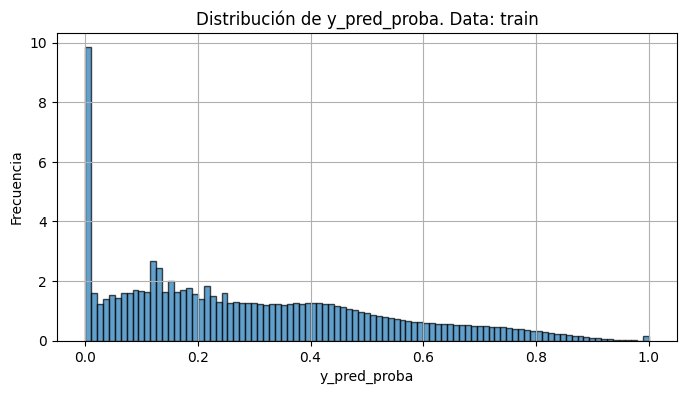

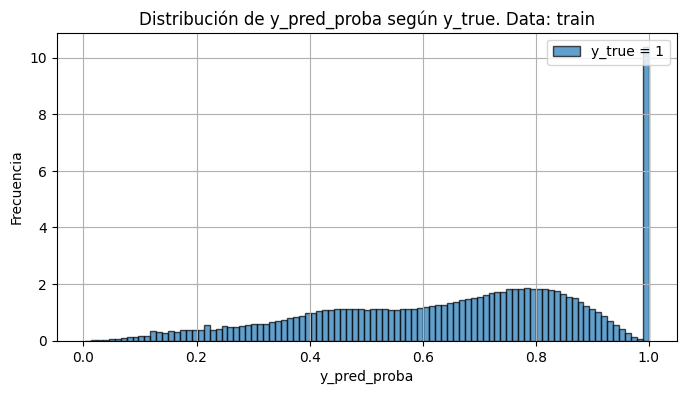

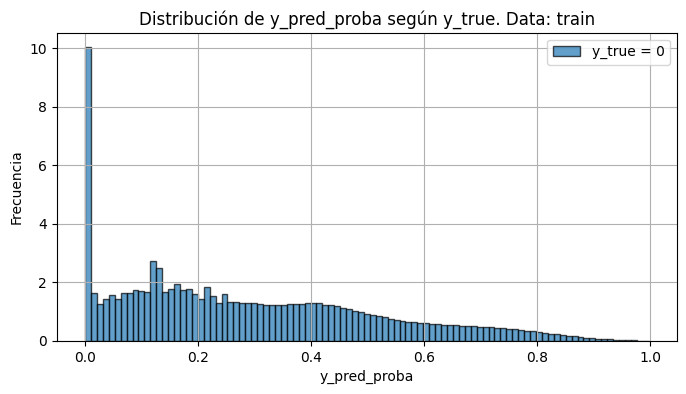

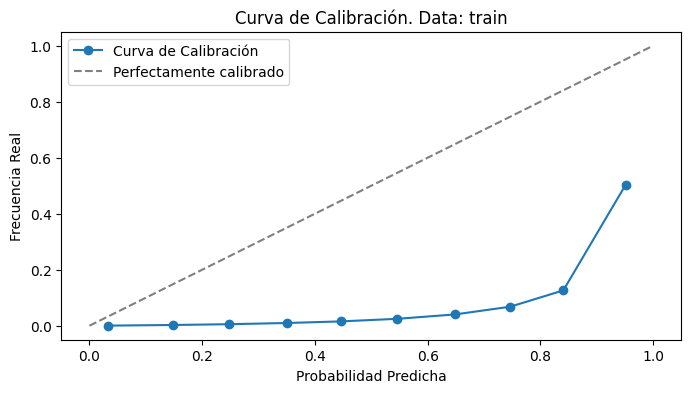

[01/22/25 20:12:06] INFO     TOP N: 1688307                                                           ]8;id=348148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=421613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/22/25 20:12:10] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=569345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=80305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=202467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=201110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=891829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=172246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 67]                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=643135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=803869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=328363;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=886848;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=29385;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=263598;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=930691;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=768480;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=485602;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=626517;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=606436;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=488769;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=699702;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=17419;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=115085;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=639406;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=339898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=692215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/22/25 20:12:16] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=425807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=714475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=214586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=89045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=310319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=218840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=265818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=231872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=842236;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=974396;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=72199;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=657252;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=222214;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=899311;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=925679;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=416059;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=306426;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=184651;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=322596;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=678639;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=126996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=994889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    2.0s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    7.2s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   13.9s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:   18.3s finished


[01/22/25 20:12:36] INFO     Try Segment Dist Probs: 90                                               ]8;id=156234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=691056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=749749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=505606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/22/25 20:12:37] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=526988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=709719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [89, 88, 87, 86, 85, 84, 83, 82, 81, 80,    ]8;id=264518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=948980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 66, 65, 64, 63, 59, 58]               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=818763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=601814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=871822;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=868528;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=410455;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=624657;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=745586;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=633313;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=745123;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=930390;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=806691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=651926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/22/25 20:12:39] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=284264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=922404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=107305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=115946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=116289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=287106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69]                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=518168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=341063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=690034;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=421198;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=516067;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=228930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=872611;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=867046;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=482807;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=154165;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=215183;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=965998;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=298692;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=236475;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=415025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=202943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/22/25 20:12:44] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=211958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=880607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=438333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=834887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=500023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=452345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=347104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=480568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=373853;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=831514;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=534739;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=153372;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=38607;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=389890;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=21630;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=710921;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=122028;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=648480;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=561231;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=780381;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=70787;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=355461;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=731030;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=832873;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=997068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=671354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=113354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=532631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=496335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=513810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=571970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:12:48] INFO     Update probs: Selected: 0, Target Select: 1688307, Diff %: -1.0           ]8;id=25790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=653698;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:12:49] INFO     Update probs: Selected: 59209, Target Select: 1688307, Diff %:            ]8;id=417748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=450833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649299564593407                                                                   

[01/22/25 20:12:50] INFO     Update probs: Selected: 118504, Target Select: 1688307, Diff %:           ]8;id=412606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=325082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298089743156902                                                                   

[01/22/25 20:12:51] INFO     Update probs: Selected: 177637, Target Select: 1688307, Diff %:           ]8;id=837998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=713032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947839462846509                                                                   

[01/22/25 20:12:52] INFO     Update probs: Selected: 236996, Target Select: 1688307, Diff %:           ]8;id=500925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=230994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596250563434257                                                                   

[01/22/25 20:12:53] INFO     Update probs: Selected: 296232, Target Select: 1688307, Diff %:           ]8;id=523167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245390204506645                                                                   

[01/22/25 20:12:54] INFO     Update probs: Selected: 355483, Target Select: 1688307, Diff %:           ]8;id=859591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=728635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894440999178467                                                                   

[01/22/25 20:12:55] INFO     Update probs: Selected: 414723, Target Select: 1688307, Diff %:           ]8;id=669180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=785300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543556947877371                                                                   

[01/22/25 20:12:56] INFO     Update probs: Selected: 473791, Target Select: 1688307, Diff %:           ]8;id=472054;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=606945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193691668636095                                                                   

[01/22/25 20:12:57] INFO     Update probs: Selected: 533063, Target Select: 1688307, Diff %:           ]8;id=46024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608476;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842618078347126                                                                   

[01/22/25 20:12:58] INFO     Update probs: Selected: 592368, Target Select: 1688307, Diff %:           ]8;id=764891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=435222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.649134902597691                                                                    

[01/22/25 20:12:59] INFO     Update probs: Selected: 651495, Target Select: 1688307, Diff %:           ]8;id=826974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=215942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6141134284226744                                                                   

[01/22/25 20:13:00] INFO     Update probs: Selected: 710993, Target Select: 1688307, Diff %:           ]8;id=545547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=677038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788722074835916                                                                   

[01/22/25 20:13:01] INFO     Update probs: Selected: 770079, Target Select: 1688307, Diff %:           ]8;id=201617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=335497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438750179913961                                                                   

[01/22/25 20:13:02] INFO     Update probs: Selected: 829408, Target Select: 1688307, Diff %:           ]8;id=145610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=744379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087338973302842                                                                   

[01/22/25 20:13:03] INFO     Update probs: Selected: 888640, Target Select: 1688307, Diff %:           ]8;id=103190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=475533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47365023067487133                                                                  

[01/22/25 20:13:05] INFO     Update probs: Selected: 947823, Target Select: 1688307, Diff %:           ]8;id=744908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=589704;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385955871769767                                                                   

[01/22/25 20:13:06] INFO     Update probs: Selected: 1007232, Target Select: 1688307, Diff %:          ]8;id=583094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=870416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034070817688963                                                                   

[01/22/25 20:13:07] INFO     Update probs: Selected: 1066218, Target Select: 1688307, Diff %:          ]8;id=824356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36846912321041136                                                                  

[01/22/25 20:13:08] INFO     Update probs: Selected: 1125709, Target Select: 1688307, Diff %:          ]8;id=201312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33323204843668836                                                                  

[01/22/25 20:13:09] INFO     Update probs: Selected: 1184668, Target Select: 1688307, Diff %:          ]8;id=64439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29831008223030525                                                                  

[01/22/25 20:13:10] INFO     Update probs: Selected: 1244118, Target Select: 1688307, Diff %:          ]8;id=266004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2630972921394036                                                                   

[01/22/25 20:13:11] INFO     Update probs: Selected: 1303357, Target Select: 1688307, Diff %:          ]8;id=733188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=723884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22800947931863103                                                                  

[01/22/25 20:13:12] INFO     Update probs: Selected: 1362606, Target Select: 1688307, Diff %:          ]8;id=533269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19291574340448744                                                                  

[01/22/25 20:13:13] INFO     Update probs: Selected: 1421958, Target Select: 1688307, Diff %:          ]8;id=655117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15776099962862206                                                                  

[01/22/25 20:13:14] INFO     Update probs: Selected: 1481164, Target Select: 1688307, Diff %:          ]8;id=562232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=542904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12269273301597398                                                                  

[01/22/25 20:13:15] INFO     Update probs: Selected: 1540460, Target Select: 1688307, Diff %:          ]8;id=958815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=87957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08757115856298647                                                                  

[01/22/25 20:13:16] INFO     Update probs: Selected: 1599312, Target Select: 1688307, Diff %:          ]8;id=856998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=861265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052712569455673645                                                                 

[01/22/25 20:13:17] INFO     Update probs: Selected: 1658896, Target Select: 1688307, Diff %:          ]8;id=781697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=315932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017420409913599836                                                                 

[01/22/25 20:13:18] INFO     Update probs: Selected: 1688307, Target Select: 1688307, Diff %: 0.0      ]8;id=690267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=695217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=146632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=765568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=94128;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=532105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=552525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:13:24] INFO     Update probs: Selected: 0, Target Select: 1688307, Diff %: -1.0           ]8;id=393457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372944;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:13:25] INFO     Update probs: Selected: 59241, Target Select: 1688307, Diff %:            ]8;id=759393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649110025605533                                                                   

[01/22/25 20:13:26] INFO     Update probs: Selected: 118509, Target Select: 1688307, Diff %:           ]8;id=421163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298060127690047                                                                   

                    INFO     Update probs: Selected: 177792, Target Select: 1688307, Diff %:           ]8;id=637339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=980315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946921383373996                                                                   

[01/22/25 20:13:27] INFO     Update probs: Selected: 236959, Target Select: 1688307, Diff %:           ]8;id=411800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596469717888986                                                                   

[01/22/25 20:13:28] INFO     Update probs: Selected: 296295, Target Select: 1688307, Diff %:           ]8;id=316788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=863324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245017049624268                                                                   

[01/22/25 20:13:29] INFO     Update probs: Selected: 355382, Target Select: 1688307, Diff %:           ]8;id=812987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895039231608943                                                                   

[01/22/25 20:13:30] INFO     Update probs: Selected: 414669, Target Select: 1688307, Diff %:           ]8;id=944847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=342705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543876794919407                                                                   

[01/22/25 20:13:31] INFO     Update probs: Selected: 473847, Target Select: 1688307, Diff %:           ]8;id=394586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=618566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193359975407316                                                                   

[01/22/25 20:13:32] INFO     Update probs: Selected: 533176, Target Select: 1688307, Diff %:           ]8;id=143270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=111484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841948768796197                                                                   

[01/22/25 20:13:33] INFO     Update probs: Selected: 592430, Target Select: 1688307, Diff %:           ]8;id=594797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490981794187906                                                                   

[01/22/25 20:13:34] INFO     Update probs: Selected: 651625, Target Select: 1688307, Diff %:           ]8;id=521257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140364282088506                                                                   

[01/22/25 20:13:35] INFO     Update probs: Selected: 710819, Target Select: 1688307, Diff %:           ]8;id=94062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789752693082478                                                                   

[01/22/25 20:13:36] INFO     Update probs: Selected: 770090, Target Select: 1688307, Diff %:           ]8;id=757202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=211541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438685025886879                                                                   

[01/22/25 20:13:37] INFO     Update probs: Selected: 829469, Target Select: 1688307, Diff %:           ]8;id=734732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5086977664607207                                                                   

[01/22/25 20:13:38] INFO     Update probs: Selected: 888560, Target Select: 1688307, Diff %:           ]8;id=65350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=210793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47369761542183975                                                                  

[01/22/25 20:13:39] INFO     Update probs: Selected: 947924, Target Select: 1688307, Diff %:           ]8;id=488008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43853576393392907                                                                  

[01/22/25 20:13:40] INFO     Update probs: Selected: 1007202, Target Select: 1688307, Diff %:          ]8;id=227242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=472422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40342485104900944                                                                  

                    INFO     Update probs: Selected: 1066448, Target Select: 1688307, Diff %:          ]8;id=682136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=898006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36833289206287717                                                                  

[01/22/25 20:13:41] INFO     Update probs: Selected: 1125564, Target Select: 1688307, Diff %:          ]8;id=890649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=136981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3333179332905686                                                                   

[01/22/25 20:13:42] INFO     Update probs: Selected: 1184903, Target Select: 1688307, Diff %:          ]8;id=687975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=146296;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29817088953608556                                                                  

[01/22/25 20:13:43] INFO     Update probs: Selected: 1243993, Target Select: 1688307, Diff %:          ]8;id=91267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631713308065417                                                                   

[01/22/25 20:13:44] INFO     Update probs: Selected: 1303169, Target Select: 1688307, Diff %:          ]8;id=325010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=270785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2281208334740068                                                                   

[01/22/25 20:13:45] INFO     Update probs: Selected: 1362570, Target Select: 1688307, Diff %:          ]8;id=268382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=413499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19293706654062323                                                                  

[01/22/25 20:13:46] INFO     Update probs: Selected: 1421647, Target Select: 1688307, Diff %:          ]8;id=380480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=390905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15794520783246174                                                                  

[01/22/25 20:13:47] INFO     Update probs: Selected: 1480696, Target Select: 1688307, Diff %:          ]8;id=630020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=490305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1229699337857392                                                                   

[01/22/25 20:13:48] INFO     Update probs: Selected: 1539973, Target Select: 1688307, Diff %:          ]8;id=33766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=920157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08785961321015669                                                                  

[01/22/25 20:13:49] INFO     Update probs: Selected: 1599616, Target Select: 1688307, Diff %:          ]8;id=241582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=792945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052532507417193675                                                                 

[01/22/25 20:13:50] INFO     Update probs: Selected: 1658611, Target Select: 1688307, Diff %:          ]8;id=856670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=47257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017589218074674808                                                                 

[01/22/25 20:13:51] INFO     Update probs: Selected: 1688307, Target Select: 1688307, Diff %: 0.0      ]8;id=73361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=468463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=39162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=336398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_2,Run3. Weight: 1                                   ]8;id=204309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    2.0s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    6.9s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:   14.0s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:   18.3s finished


[01/22/25 20:14:11] INFO     Update probs: Selected: 0, Target Select: 1688307, Diff %: -1.0           ]8;id=534427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=529249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:14:12] INFO     Update probs: Selected: 62107, Target Select: 1688307, Diff %:            ]8;id=917622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=4336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9632134440004099                                                                   

[01/22/25 20:14:13] INFO     Update probs: Selected: 125876, Target Select: 1688307, Diff %:           ]8;id=554382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.925442469882551                                                                    

[01/22/25 20:14:14] INFO     Update probs: Selected: 187560, Target Select: 1688307, Diff %:           ]8;id=226133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=177620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8889064607325563                                                                   

[01/22/25 20:14:15] INFO     Update probs: Selected: 250175, Target Select: 1688307, Diff %:           ]8;id=482418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8518190115897168                                                                   

[01/22/25 20:14:16] INFO     Update probs: Selected: 312585, Target Select: 1688307, Diff %:           ]8;id=72929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8148529858609839                                                                   

[01/22/25 20:14:17] INFO     Update probs: Selected: 375364, Target Select: 1688307, Diff %:           ]8;id=874133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=665994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.777668397986859                                                                    

[01/22/25 20:14:18] INFO     Update probs: Selected: 437727, Target Select: 1688307, Diff %:           ]8;id=312698;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=272175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.74073021079697                                                                     

[01/22/25 20:14:19] INFO     Update probs: Selected: 500422, Target Select: 1688307, Diff %:           ]8;id=315654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=819311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.703595376907162                                                                    

[01/22/25 20:14:20] INFO     Update probs: Selected: 562838, Target Select: 1688307, Diff %:           ]8;id=812238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=342090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6666257973224065                                                                   

[01/22/25 20:14:21] INFO     Update probs: Selected: 625372, Target Select: 1688307, Diff %:           ]8;id=945424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6295863252358724                                                                   

[01/22/25 20:14:22] INFO     Update probs: Selected: 687973, Target Select: 1688307, Diff %:           ]8;id=955461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5925071684237523                                                                   

[01/22/25 20:14:23] INFO     Update probs: Selected: 750144, Target Select: 1688307, Diff %:           ]8;id=295933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=930344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5556827046265874                                                                   

[01/22/25 20:14:24] INFO     Update probs: Selected: 813149, Target Select: 1688307, Diff %:           ]8;id=842163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=16822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5183642548422769                                                                   

[01/22/25 20:14:25] INFO     Update probs: Selected: 875210, Target Select: 1688307, Diff %:           ]8;id=666854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=196489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48160494507219365                                                                  

[01/22/25 20:14:26] INFO     Update probs: Selected: 938221, Target Select: 1688307, Diff %:           ]8;id=725948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=21370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4442829414318604                                                                   

[01/22/25 20:14:27] INFO     Update probs: Selected: 1000501, Target Select: 1688307, Diff %:          ]8;id=29099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4073939159169511                                                                   

[01/22/25 20:14:28] INFO     Update probs: Selected: 1061775, Target Select: 1688307, Diff %:          ]8;id=83093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=560353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3711007535951696                                                                   

[01/22/25 20:14:29] INFO     Update probs: Selected: 1119053, Target Select: 1688307, Diff %:          ]8;id=202700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=570294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3371744593844603                                                                   

[01/22/25 20:14:30] INFO     Update probs: Selected: 1188216, Target Select: 1688307, Diff %:          ]8;id=964100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=866278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29620856870225615                                                                  

[01/22/25 20:14:31] INFO     Update probs: Selected: 1250638, Target Select: 1688307, Diff %:          ]8;id=831182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=860684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2592354352614779                                                                   

[01/22/25 20:14:32] INFO     Update probs: Selected: 1312269, Target Select: 1688307, Diff %:          ]8;id=31;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=993735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22273081850634985                                                                  

[01/22/25 20:14:33] INFO     Update probs: Selected: 1375881, Target Select: 1688307, Diff %:          ]8;id=856574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=467953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18505283695441646                                                                  

[01/22/25 20:14:34] INFO     Update probs: Selected: 1438103, Target Select: 1688307, Diff %:          ]8;id=310618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14819816538105926                                                                  

[01/22/25 20:14:35] INFO     Update probs: Selected: 1501436, Target Select: 1688307, Diff %:          ]8;id=557664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=62236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11068543813417821                                                                  

[01/22/25 20:14:36] INFO     Update probs: Selected: 1563319, Target Select: 1688307, Diff %:          ]8;id=740096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07403155942609964                                                                  

[01/22/25 20:14:37] INFO     Update probs: Selected: 1625658, Target Select: 1688307, Diff %:          ]8;id=80950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=998518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03710758766030112                                                                  

[01/22/25 20:14:38] INFO     Update probs: Selected: 1688253, Target Select: 1688307, Diff %:          ]8;id=427698;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=969785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -3.1984704203678596e-05                                                               

[01/22/25 20:14:39] INFO     Update probs: Selected: 1688307, Target Select: 1688307, Diff %: 0.0      ]8;id=187149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=194434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=999814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=463059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/22/25 20:14:40] INFO     ------------------------------------------------------                    ]8;id=419343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=114970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=168695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:14:42] INFO     Update probs: Selected: 0, Target Select: 1688307, Diff %: -1.0           ]8;id=113378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=72863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:14:43] INFO     Update probs: Selected: 59203, Target Select: 1688307, Diff %:            ]8;id=463486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=640016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649335103153632                                                                   

[01/22/25 20:14:44] INFO     Update probs: Selected: 118533, Target Select: 1688307, Diff %:           ]8;id=708643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297917973449141                                                                   

[01/22/25 20:14:45] INFO     Update probs: Selected: 177618, Target Select: 1688307, Diff %:           ]8;id=732104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=480330;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947952001620558                                                                   

[01/22/25 20:14:46] INFO     Update probs: Selected: 237077, Target Select: 1688307, Diff %:           ]8;id=650032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=76006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8595770792871201                                                                   

[01/22/25 20:14:47] INFO     Update probs: Selected: 296156, Target Select: 1688307, Diff %:           ]8;id=170746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245840359602845                                                                   

[01/22/25 20:14:48] INFO     Update probs: Selected: 355385, Target Select: 1688307, Diff %:           ]8;id=89329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.789502146232883                                                                    

                    INFO     Update probs: Selected: 414520, Target Select: 1688307, Diff %:           ]8;id=236980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=9596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544759335831694                                                                   

[01/22/25 20:14:49] INFO     Update probs: Selected: 473782, Target Select: 1688307, Diff %:           ]8;id=105017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=963687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193744976476435                                                                   

[01/22/25 20:14:50] INFO     Update probs: Selected: 533245, Target Select: 1688307, Diff %:           ]8;id=528506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=101124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841540075353594                                                                   

[01/22/25 20:14:51] INFO     Update probs: Selected: 592215, Target Select: 1688307, Diff %:           ]8;id=659072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104792;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6492255259262681                                                                   

[01/22/25 20:14:52] INFO     Update probs: Selected: 710688, Target Select: 1688307, Diff %:           ]8;id=776403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=163639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790528618314086                                                                   

[01/22/25 20:14:53] INFO     Update probs: Selected: 770093, Target Select: 1688307, Diff %:           ]8;id=548159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=456678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438667256606766                                                                   

[01/22/25 20:14:54] INFO     Update probs: Selected: 829252, Target Select: 1688307, Diff %:           ]8;id=440429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=672569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088262975868725                                                                   

[01/22/25 20:14:55] INFO     Update probs: Selected: 888780, Target Select: 1688307, Diff %:           ]8;id=612989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4735673073676766                                                                   

[01/22/25 20:14:56] INFO     Update probs: Selected: 947795, Target Select: 1688307, Diff %:           ]8;id=855823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=819613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43861217183841567                                                                  

[01/22/25 20:14:57] INFO     Update probs: Selected: 1007289, Target Select: 1688307, Diff %:          ]8;id=103130;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=225062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4033733201366813                                                                   

[01/22/25 20:14:58] INFO     Update probs: Selected: 1066400, Target Select: 1688307, Diff %:          ]8;id=650199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683613229110582                                                                   

[01/22/25 20:14:59] INFO     Update probs: Selected: 1125330, Target Select: 1688307, Diff %:          ]8;id=472278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3334565336754512                                                                   

[01/22/25 20:15:00] INFO     Update probs: Selected: 1184676, Target Select: 1688307, Diff %:          ]8;id=998534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=846610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983053437556084                                                                   

[01/22/25 20:15:01] INFO     Update probs: Selected: 1244221, Target Select: 1688307, Diff %:          ]8;id=984436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=778174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2630362842776817                                                                   

[01/22/25 20:15:02] INFO     Update probs: Selected: 1303257, Target Select: 1688307, Diff %:          ]8;id=541834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22806871025234154                                                                  

[01/22/25 20:15:03] INFO     Update probs: Selected: 1362400, Target Select: 1688307, Diff %:          ]8;id=886902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=64327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1930377591279311                                                                   

[01/22/25 20:15:04] INFO     Update probs: Selected: 1421544, Target Select: 1688307, Diff %:          ]8;id=345086;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=350349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15800621569418358                                                                  

[01/22/25 20:15:05] INFO     Update probs: Selected: 1480855, Target Select: 1688307, Diff %:          ]8;id=859748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12287575660113949                                                                  

[01/22/25 20:15:06] INFO     Update probs: Selected: 1540024, Target Select: 1688307, Diff %:          ]8;id=639128;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=656335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08782940543396432                                                                  

[01/22/25 20:15:07] INFO     Update probs: Selected: 1599534, Target Select: 1688307, Diff %:          ]8;id=525182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=238632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0525810767828363                                                                   

[01/22/25 20:15:08] INFO     Update probs: Selected: 1658570, Target Select: 1688307, Diff %:          ]8;id=373510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017613502757496118                                                                 

[01/22/25 20:15:09] INFO     Update probs: Selected: 1688307, Target Select: 1688307, Diff %: 0.0      ]8;id=997792;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=110588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=967060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=733613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=885623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=377441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=710627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/22/25 20:15:14] INFO     Update probs: Selected: 0, Target Select: 1688307, Diff %: -1.0           ]8;id=476513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=945617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/22/25 20:15:15] INFO     Update probs: Selected: 59286, Target Select: 1688307, Diff %:            ]8;id=966470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=852222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648843486403835                                                                   

[01/22/25 20:15:16] INFO     Update probs: Selected: 118524, Target Select: 1688307, Diff %:           ]8;id=28047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=487925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297971281289481                                                                   

[01/22/25 20:15:17] INFO     Update probs: Selected: 177630, Target Select: 1688307, Diff %:           ]8;id=396834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947880924500106                                                                   

[01/22/25 20:15:18] INFO     Update probs: Selected: 236871, Target Select: 1688307, Diff %:           ]8;id=88418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=948522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596990950105639                                                                   

                    INFO     Update probs: Selected: 296085, Target Select: 1688307, Diff %:           ]8;id=724950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.824626089923219                                                                    

[01/22/25 20:15:19] INFO     Update probs: Selected: 355341, Target Select: 1688307, Diff %:           ]8;id=202738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895282078437156                                                                   

[01/22/25 20:15:20] INFO     Update probs: Selected: 414678, Target Select: 1688307, Diff %:           ]8;id=500986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=310676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543823487079068                                                                   

[01/22/25 20:15:21] INFO     Update probs: Selected: 473821, Target Select: 1688307, Diff %:           ]8;id=959000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=366428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193513975834964                                                                   

[01/22/25 20:15:22] INFO     Update probs: Selected: 533189, Target Select: 1688307, Diff %:           ]8;id=482776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841871768582373                                                                   

[01/22/25 20:15:23] INFO     Update probs: Selected: 592398, Target Select: 1688307, Diff %:           ]8;id=471210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=332286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491171333175779                                                                   

[01/22/25 20:15:24] INFO     Update probs: Selected: 651660, Target Select: 1688307, Diff %:           ]8;id=22784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=753549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.614015697382052                                                                    

[01/22/25 20:15:25] INFO     Update probs: Selected: 710858, Target Select: 1688307, Diff %:           ]8;id=176657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=266722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789521692441008                                                                   

[01/22/25 20:15:26] INFO     Update probs: Selected: 770237, Target Select: 1688307, Diff %:           ]8;id=812709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=38334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437814331161335                                                                   

[01/22/25 20:15:27] INFO     Update probs: Selected: 829484, Target Select: 1688307, Diff %:           ]8;id=525892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=945180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5086888818206642                                                                   

[01/22/25 20:15:28] INFO     Update probs: Selected: 888384, Target Select: 1688307, Diff %:           ]8;id=624915;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=595872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47380186186517026                                                                  

[01/22/25 20:15:29] INFO     Update probs: Selected: 947771, Target Select: 1688307, Diff %:           ]8;id=321428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=463921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4386263872625062                                                                   

[01/22/25 20:15:30] INFO     Update probs: Selected: 1006845, Target Select: 1688307, Diff %:          ]8;id=908801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=56919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.403636305482356                                                                    

[01/22/25 20:15:31] INFO     Update probs: Selected: 1066120, Target Select: 1688307, Diff %:          ]8;id=887221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=595188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3685271695254477                                                                   

[01/22/25 20:15:32] INFO     Update probs: Selected: 1125475, Target Select: 1688307, Diff %:          ]8;id=193234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33337064882157097                                                                  

[01/22/25 20:15:33] INFO     Update probs: Selected: 1184561, Target Select: 1688307, Diff %:          ]8;id=2455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29837345932937553                                                                  

[01/22/25 20:15:34] INFO     Update probs: Selected: 1243953, Target Select: 1688307, Diff %:          ]8;id=493637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631950231800259                                                                   

[01/22/25 20:15:35] INFO     Update probs: Selected: 1303239, Target Select: 1688307, Diff %:          ]8;id=906902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22807937182040944                                                                  

[01/22/25 20:15:36] INFO     Update probs: Selected: 1422014, Target Select: 1688307, Diff %:          ]8;id=338700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=481573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15772783030574417                                                                  

[01/22/25 20:15:37] INFO     Update probs: Selected: 1481226, Target Select: 1688307, Diff %:          ]8;id=924661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=463636;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12265600983707348                                                                  

[01/22/25 20:15:38] INFO     Update probs: Selected: 1540045, Target Select: 1688307, Diff %:          ]8;id=656677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=333072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08781696693788511                                                                  

[01/22/25 20:15:39] INFO     Update probs: Selected: 1599273, Target Select: 1688307, Diff %:          ]8;id=486376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=401790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05273566951982074                                                                  

[01/22/25 20:15:40] INFO     Update probs: Selected: 1658731, Target Select: 1688307, Diff %:          ]8;id=637518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01751814095422219                                                                  

[01/22/25 20:15:41] INFO     Update probs: Selected: 1688307, Target Select: 1688307, Diff %: 0.0      ]8;id=596870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=529513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=100038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=330358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=770018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=201070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/22/25 20:15:43] INFO     Ok Sistema de votaciones                                                  ]8;id=881373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=293404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

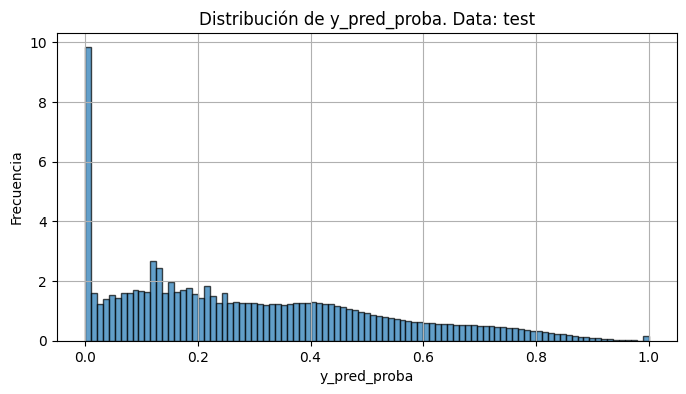

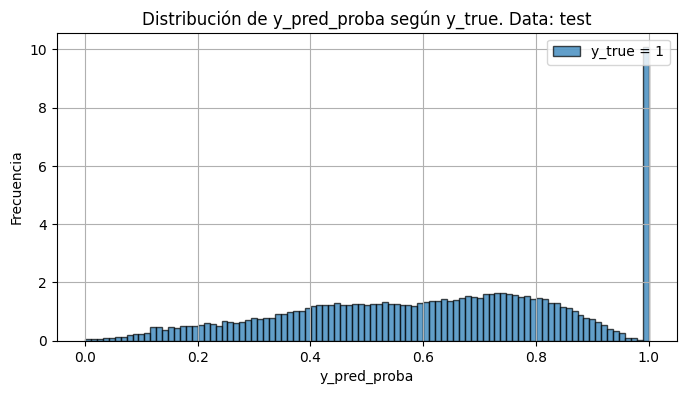

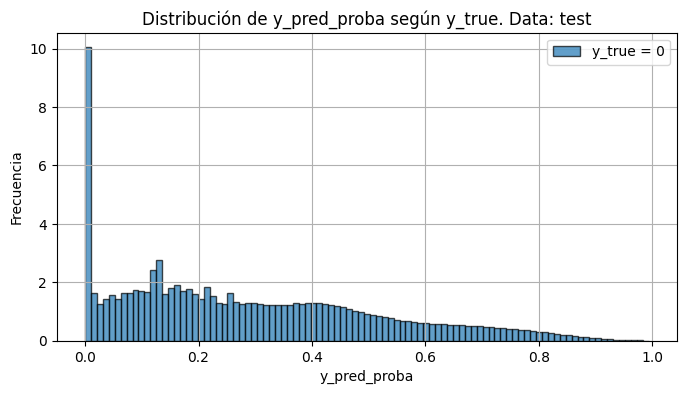

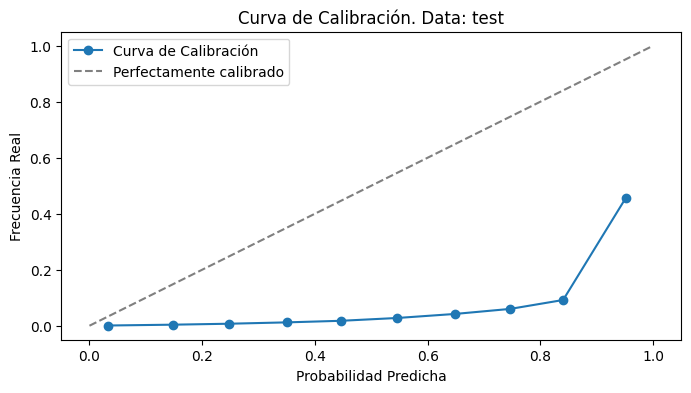

value       name_model model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          8.2081  [0, 1, 2, 4, 7]   Ensamble   
           true_sum n_top test           72254  [0, 1, 2, 4, 7]   Ensamble   
           backtest       test          4.2797  [0, 1, 2, 4, 7]   Ensamble   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [ ]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

In [ ]:
# con eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

In [21]:
# sin eda, 1er experimento
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                
Precision n_top test         1          best_fitting_model  Run10            4.1883   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3              3.864   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.2884   
                train        1          best_fitting_model  Run10            4.1989   
                                        best_model_name     Run2             4.4697   
                                        best_unbiased_model Run3             3.8838   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.4035   
backtest        test         1          best_fitting_model  Run10            4.1883   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3              3.864   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.2884   
                train        1          best_fitting_model  Run10            4.1989   
                                        best_model_name     Run2             4.4697   
                                        best_unbiased_model Run3             3.8838   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.4035   
f1-score n_top  test         1          best_fitting_model  Run10            8.0399   
                                        best_model_name     Run2             8.2393   
                                        best_unbiased_model Run3             7.4405   
                                        modelo_produccion   [0, 1, 4, 6, 7]  8.2241   
                train        1          best_fitting_model  Run10            8.0594   
                                        best_model_name     Run2              8.557   
                                        best_unbiased_model Run3             7.4771   
                                        modelo_produccion   [0, 1, 4, 6, 7]  8.4356   
recall n_top    test         1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 4, 6, 7]   100.0   
                train        1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 4, 6, 7]   100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 4, 6, 7]         Ensamble  
                train        1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 4, 6, 7]         Ensamble  
backtest        test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2          

In [28]:
# sin eda, 2do experimento
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                
Precision n_top test         1          best_fitting_model  Run10            4.1981   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3             3.9643   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.2797   
                train        1          best_fitting_model  Run10            4.2042   
                                        best_model_name     Run2             4.6562   
                                        best_unbiased_model Run3             3.9781   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.4281   
backtest        test         1          best_fitting_model  Run10            4.1981   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3             3.9643   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.2797   
                train        1          best_fitting_model  Run10            4.2042   
                                        best_model_name     Run2             4.6562   
                                        best_unbiased_model Run3             3.9781   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.4281   
f1-score n_top  test         1          best_fitting_model  Run10            8.0578   
                                        best_model_name     Run2             8.2394   
                                        best_unbiased_model Run3             7.6262   
                                        modelo_produccion   [0, 1, 2, 4, 7]  8.2081   
                train        1          best_fitting_model  Run10            8.0691   
                                        best_model_name     Run2              8.898   
                                        best_unbiased_model Run3             7.6519   
                                        modelo_produccion   [0, 1, 2, 4, 7]  8.4807   
recall n_top    test         1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 2, 4, 7]   100.0   
                train        1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 2, 4, 7]   100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 7]         Ensamble  
                train        1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 7]         Ensamble  
backtest        test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2          

In [27]:
# sin eda, 2da experimenta
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                
Precision n_top test         1          best_fitting_model  Run10            4.1981   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3             3.9643   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.2797   
                train        1          best_fitting_model  Run10            4.2042   
                                        best_model_name     Run2             4.6562   
                                        best_unbiased_model Run3             3.9781   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.4281   
backtest        test         1          best_fitting_model  Run10            4.1981   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3             3.9643   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.2797   
                train        1          best_fitting_model  Run10            4.2042   
                                        best_model_name     Run2             4.6562   
                                        best_unbiased_model Run3             3.9781   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.4281   
f1-score n_top  test         1          best_fitting_model  Run10            8.0578   
                                        best_model_name     Run2             8.2394   
                                        best_unbiased_model Run3             7.6262   
                                        modelo_produccion   [0, 1, 2, 4, 7]  8.2081   
                train        1          best_fitting_model  Run10            8.0691   
                                        best_model_name     Run2              8.898   
                                        best_unbiased_model Run3             7.6519   
                                        modelo_produccion   [0, 1, 2, 4, 7]  8.4807   
recall n_top    test         1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 2, 4, 7]   100.0   
                train        1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 2, 4, 7]   100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 7]         Ensamble  
                train        1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 7]         Ensamble  
backtest        test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2          

In [29]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

prob_min  prob_max  tasa_aperturas
0     81.87    100.00           27.03
1     76.85     81.87            8.69
2     73.16     76.85            7.30
3     70.11     73.16            6.37
4     67.44     70.11            5.67

prob_min  prob_max  tasa_aperturas
0     81.87    100.00           26.56
1     76.85     81.87            8.59
2     73.18     76.85            7.21
3     70.13     73.18            6.50
4     67.44     70.13            5.52

# optimizar ensamblado

In [30]:
train = info_save2['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test = info_save2['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

(5627691, 6)

In [31]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = False

In [51]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = True

In [40]:
mejor_test_dado_mejores_train = False
ignore_train = True
first_loop = True

In [52]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')        
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')
    if first_loop == True:
        break
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")
epochs.shape

N TOP 4502152 .EMPEZAMOS:  Train Data


[01/22/25 20:22:53] INFO     Numero de iteraciones: 211. Train Data                                ]8;id=453191;file:///tmp/ipykernel_18224/3713006134.py\3713006134.py]8;;\:]8;id=277090;file:///tmp/ipykernel_18224/3713006134.py#42\42]8;;\

[01/22/25 20:24:17] INFO     TP: 282288.0. True: 367159.0. Tasa de Exito: 6.2701%. Usando 0.2      ]8;id=184882;file:///tmp/ipykernel_18224/3713006134.py\3713006134.py]8;;\:]8;id=953958;file:///tmp/ipykernel_18224/3713006134.py#61\61]8;;\
                             deciles para Train Data                                                               

                    INFO     Numero de Iteraciones Finales: 1. Train Data                          ]8;id=50417;file:///tmp/ipykernel_18224/3713006134.py\3713006134.py]8;;\:]8;id=713522;file:///tmp/ipykernel_18224/3713006134.py#63\63]8;;\

------------------------


                    INFO     Hrs: 0. Min 1.410115639368693                                         ]8;id=90591;file:///tmp/ipykernel_18224/3713006134.py\3713006134.py]8;;\:]8;id=583830;file:///tmp/ipykernel_18224/3713006134.py#74\74]8;;\

(211, 1)

In [53]:
print(mejor_test_dado_mejores_train)
print(ignore_train)
print(first_loop)

True
False
True


In [54]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Unico


Run1  Run2  Run3  Run5  Run8
27     0     1     0     0     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
27         6.2701
1          6.0459
3          5.8043
81         5.4273
9          5.0462

Cominaciones e ietraciones de modelos unicos


Run1  Run2  Run3  Run5  Run8
81     1     0     0     0     0
27     0     1     0     0     0
9      0     0     1     0     0
3      0     0     0     1     0
1      0     0     0     0     1

Decil 1:  (27, 10.1273)
Decil 2:  (27, 6.2701)
Decil 3:  (27, 4.6562)


In [55]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Iteraciones


Run1  Run2  Run3  Run5  Run8
27     0     1     0     0     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
27         6.2701
55         6.2104
28         6.1814
29         6.1483
57         6.1304

Decil 1:  (27, 10.1273)
Decil 2:  (27, 6.2701)
Decil 3:  (27, 4.6562)


In [38]:
iterr = [65,37,46,47,28] # test best in test
iterr2 = iterr   # test best in train
iterr3 = [27,55,28,29,57] # train best in test
iterr4 = iterr3 # train best in train

**Sin eda 1er experimento**

In [38]:
# sin eda
# test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

Run1  Run2  Run5  Run7  Run8
65     0     2     1     0     2
37     0     1     1     0     1
46     0     1     2     0     1
47     0     1     2     0     2
28     0     1     0     0     1

Valor
Iteracion        
65         5.5664
37         5.5662
46         5.5659
47         5.5658
28         5.5657

In [48]:
# sin eda
# test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

Run1  Run2  Run5  Run7  Run8
65     0     2     1     0     2
37     0     1     1     0     1
46     0     1     2     0     1
47     0     1     2     0     2
28     0     1     0     0     1

Valor
Iteracion        
65         5.9050
37         5.8936
46         5.8768
47         5.8890
28         5.9257

In [39]:
# sin eda
# train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

Run1  Run2  Run5  Run7  Run8
28     0     1     0     0     1
29     0     1     0     0     2
55     0     2     0     0     1
1      0     0     0     0     1
65     0     2     1     0     2

Valor
Iteracion        
28         5.5657
29         5.5605
55         5.5627
1          5.5384
65         5.5664

In [49]:
# sin eda
# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

Run1  Run2  Run5  Run7  Run8
28     0     1     0     0     1
29     0     1     0     0     2
55     0     2     0     0     1
1      0     0     0     0     1
65     0     2     1     0     2

Valor
Iteracion        
28         5.9257
29         5.9253
55         5.9211
1          5.9203
65         5.9050

**Sin eda 2do experimento**

In [46]:
iterr = [139,143,58,31,142] # test best in test
iterr2 = iterr   # test best in train
iterr3 = [28,29,55,1,65] # train best in test
iterr4 = iterr3 # train best in train

In [47]:
# sin eda, test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

Run1  Run2  Run3  Run5  Run8
139     1     2     0     1     1
143     1     2     0     2     2
58      0     2     0     1     1
31      0     1     0     1     1
142     1     2     0     2     1

Valor
Iteracion        
139        5.5907
143        5.5904
58         5.5903
31         5.5890
142        5.5890

In [56]:
# sin eda, test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

Run1  Run2  Run3  Run5  Run8
139     1     2     0     1     1
143     1     2     0     2     2
58      0     2     0     1     1
31      0     1     0     1     1
142     1     2     0     2     1

Valor
Iteracion        
139        6.0387
143        6.0242
58         6.1274
31         6.0819
142        6.0098

In [48]:
# sin eda, train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

Run1  Run2  Run3  Run5  Run8
28     0     1     0     0     1
29     0     1     0     0     2
55     0     2     0     0     1
1      0     0     0     0     1
65     0     2     1     0     2

Valor
Iteracion        
28         5.5796
29         5.5700
55         5.5823
1          5.5138
65         5.5759

In [39]:
# sin eda, train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

Run1  Run2  Run3  Run5  Run8
27     0     1     0     0     0
55     0     2     0     0     1
28     0     1     0     0     1
29     0     1     0     0     2
57     0     2     0     1     0

Valor
Iteracion        
27         6.2701
55         6.2104
28         6.1814
29         6.1483
57         6.1304

In [57]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2+iterr3+iterr4))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3,0.5])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

Iteracion:  [1, 65, 139, 142, 143, 55, 58, 27, 28, 29, 31]
Calling:  [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]


In [58]:
# sin eda train, 2do experimento
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

0.01    0.05     0.10     0.20     0.30     0.50
Iteraccion                                                    
1           3.3645  6.9985   9.4298  12.0918  13.6585  14.4179
65          3.7464  7.5143   9.7200  12.1097  13.6604  14.6765
139         3.6662  7.3752   9.6134  12.0774  13.6276  14.7404
142         3.6000  7.2631   9.5138  12.0195  13.5115  14.7404
143         3.5909  7.2614   9.5243  12.0483  13.5784  14.7404
55          3.8306  7.7198   9.9888  12.4208  13.9337  14.7583
58          3.7458  7.5349   9.7982  12.2548  13.7828  14.7450
27          3.8666  7.8276  10.1273  12.5401  13.9685  14.6337
28          3.7672  7.6111   9.8927  12.3627  13.8396  14.7583
29          3.6584  7.4621   9.7700  12.2966  13.7063  14.7583
31          3.6449  7.3697   9.6440  12.1639  13.6661  14.7450

In [50]:
# sin eda test, 2do experimento
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

0.01    0.05    0.10     0.20     0.30     0.50
Iteraccion                                                   
1           2.7560  5.6618  8.0616  11.0276  12.8060  13.8185
65          2.8390  5.8683  8.2451  11.1518  12.8893  14.3258
139         2.8680  5.9133  8.2846  11.1815  12.9266  14.3428
142         2.8637  5.9147  8.2762  11.1779  12.9131  14.3428
143         2.8628  5.9101  8.2833  11.1808  12.9263  14.3428
55          2.8408  5.8749  8.2609  11.1646  12.9051  14.1404
58          2.8605  5.9038  8.2890  11.1806  12.9339  14.2346
27          2.8150  5.8406  8.2043  11.1221  12.8902  13.8778
28          2.8395  5.8536  8.2437  11.1593  12.9183  14.1404
29          2.8250  5.8198  8.2114  11.1399  12.8353  14.1404
31          2.8527  5.8971  8.2792  11.1779  12.9314  14.2346

<Axes: ylabel='Iteraccion'>

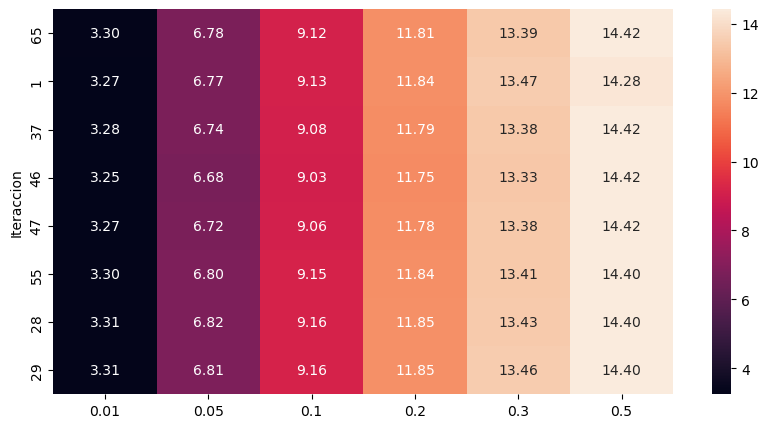

In [52]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

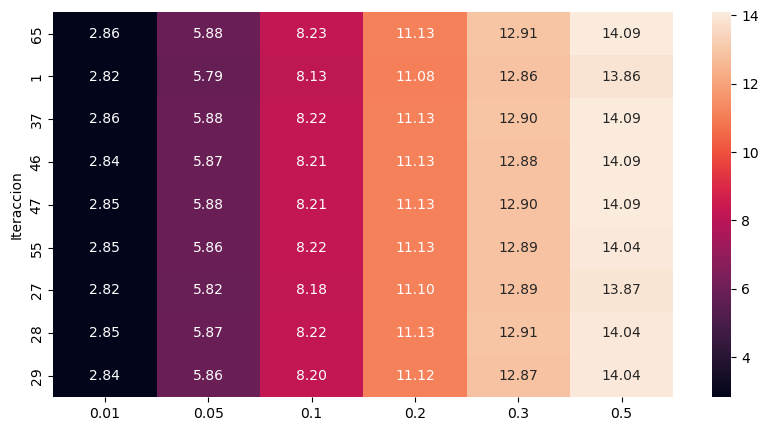

In [53]:
# sin eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

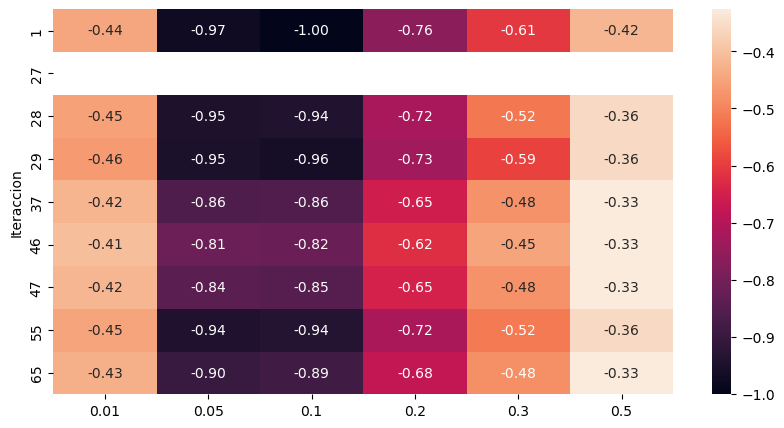

In [54]:
# sin eda test-train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test -summary, annot=True,  fmt=".2f")

**sin eda 2do experimento**

<Axes: ylabel='Iteraccion'>

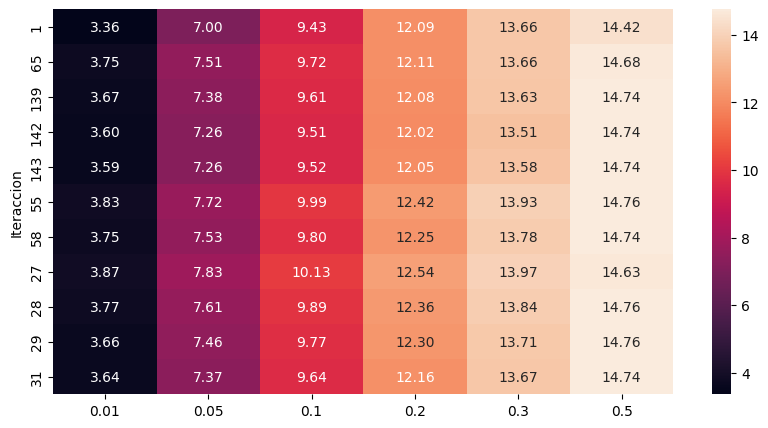

In [59]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

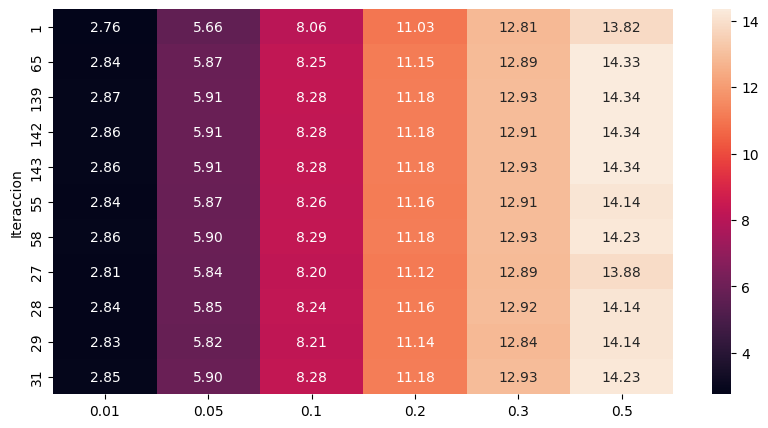

In [60]:
# sin eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

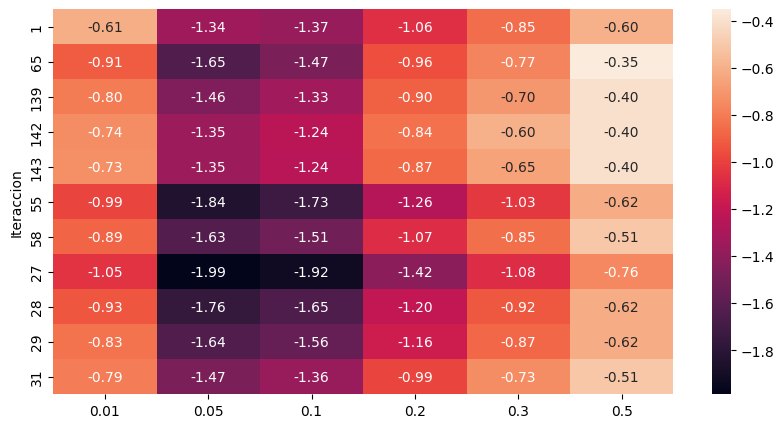

In [61]:
# sin eda test-train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test -summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

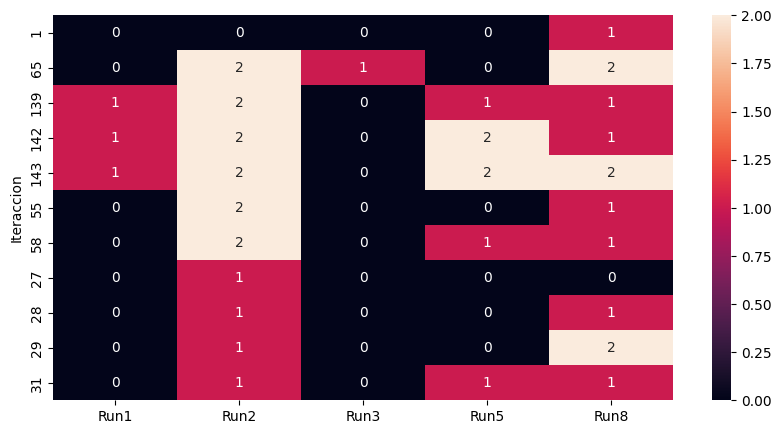

In [62]:
# sin eda, edo experimento
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)# 139 es mejormodelo pero el 142 es muy parecido aunque sale menos sobre/ajsutado
# modelos semi/iguales ... me quedo en con el modelo 142

In [59]:
# mejor modelo
check_df

value  \
metric_name     dataset_name class_name select_model    name_model             
Precision n_top test         1          best_model_name Run4          0.1233   
                train        1          best_model_name Run4        0.428335   
backtest        test         1          best_model_name Run4        0.126683   
                train        1          best_model_name Run4        0.031599   
f1-score n_top  test         1          best_model_name Run4        0.219532   
                train        1          best_model_name Run4        0.599768   
recall n_top    test         1          best_model_name Run4             1.0   
                train        1          best_model_name Run4             1.0   

                                                                   model_name  
metric_name     dataset_name class_name select_model    name_model             
Precision n_top test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3  
backtest        test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3  
f1-score n_top  test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3  
recall n_top    test         1          best_model_name Run4            MLP_3  
                train        1          best_model_name Run4            MLP_3

In [ ]:
# MVP2
check_df_mvp2

In [60]:
# ensamble sin optimizar, 1er experimento
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                
Precision n_top test         1          best_fitting_model  Run10            4.1883   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3              3.864   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.2884   
                train        1          best_fitting_model  Run10            4.1989   
                                        best_model_name     Run2             4.4697   
                                        best_unbiased_model Run3             3.8838   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.4035   
backtest        test         1          best_fitting_model  Run10            4.1883   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3              3.864   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.2884   
                train        1          best_fitting_model  Run10            4.1989   
                                        best_model_name     Run2             4.4697   
                                        best_unbiased_model Run3             3.8838   
                                        modelo_produccion   [0, 1, 4, 6, 7]  4.4035   
f1-score n_top  test         1          best_fitting_model  Run10            8.0399   
                                        best_model_name     Run2             8.2393   
                                        best_unbiased_model Run3             7.4405   
                                        modelo_produccion   [0, 1, 4, 6, 7]  8.2241   
                train        1          best_fitting_model  Run10            8.0594   
                                        best_model_name     Run2              8.557   
                                        best_unbiased_model Run3             7.4771   
                                        modelo_produccion   [0, 1, 4, 6, 7]  8.4356   
recall n_top    test         1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 4, 6, 7]   100.0   
                train        1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 4, 6, 7]   100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 4, 6, 7]         Ensamble  
                train        1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 4, 6, 7]         Ensamble  
backtest        test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2          

In [63]:
# ensamble sin optimizar, 2do experimento
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                
Precision n_top test         1          best_fitting_model  Run10            4.1981   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3             3.9643   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.2797   
                train        1          best_fitting_model  Run10            4.2042   
                                        best_model_name     Run2             4.6562   
                                        best_unbiased_model Run3             3.9781   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.4281   
backtest        test         1          best_fitting_model  Run10            4.1981   
                                        best_model_name     Run2             4.2967   
                                        best_unbiased_model Run3             3.9643   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.2797   
                train        1          best_fitting_model  Run10            4.2042   
                                        best_model_name     Run2             4.6562   
                                        best_unbiased_model Run3             3.9781   
                                        modelo_produccion   [0, 1, 2, 4, 7]  4.4281   
f1-score n_top  test         1          best_fitting_model  Run10            8.0578   
                                        best_model_name     Run2             8.2394   
                                        best_unbiased_model Run3             7.6262   
                                        modelo_produccion   [0, 1, 2, 4, 7]  8.2081   
                train        1          best_fitting_model  Run10            8.0691   
                                        best_model_name     Run2              8.898   
                                        best_unbiased_model Run3             7.6519   
                                        modelo_produccion   [0, 1, 2, 4, 7]  8.4807   
recall n_top    test         1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 2, 4, 7]   100.0   
                train        1          best_fitting_model  Run10             100.0   
                                        best_model_name     Run2              100.0   
                                        best_unbiased_model Run3              100.0   
                                        modelo_produccion   [0, 1, 2, 4, 7]   100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 7]         Ensamble  
                train        1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2                   xgboost_1  
                                        best_unbiased_model Run3             random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 7]         Ensamble  
backtest        test         1          best_fitting_model  Run10                      MLP_9  
                                        best_model_name     Run2          

In [61]:
info_save_select_ensamble = catalog.load("info_save_select_mvp7_exp1") # modelo generado experimento 1
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[01/14/25 22:27:12] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=771413;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=318494;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Run_name:  [1, 4, 7]
W:  [2, 1, 2]


value  \
metric_name     dataset_name class_name select_model        name_model           
Precision n_top test         1          best_fitting_model  Run10       4.1883   
                                        best_model_name     Run2        4.2967   
                                        best_unbiased_model Run3         3.864   
                                        modelo_produccion   [1, 4, 7]   4.3022   
                train        1          best_fitting_model  Run10       4.1989   
                                        best_model_name     Run2        4.4697   
                                        best_unbiased_model Run3        3.8838   
                                        modelo_produccion   [1, 4, 7]   4.4629   
backtest        test         1          best_fitting_model  Run10       4.1883   
                                        best_model_name     Run2        4.2967   
                                        best_unbiased_model Run3         3.864   
                                        modelo_produccion   [1, 4, 7]   4.3022   
                train        1          best_fitting_model  Run10       4.1989   
                                        best_model_name     Run2        4.4697   
                                        best_unbiased_model Run3        3.8838   
                                        modelo_produccion   [1, 4, 7]   4.4629   
f1-score n_top  test         1          best_fitting_model  Run10       8.0399   
                                        best_model_name     Run2        8.2393   
                                        best_unbiased_model Run3        7.4405   
                                        modelo_produccion   [1, 4, 7]   8.2496   
                train        1          best_fitting_model  Run10       8.0594   
                                        best_model_name     Run2         8.557   
                                        best_unbiased_model Run3        7.4771   
                                        modelo_produccion   [1, 4, 7]   8.5445   
recall n_top    test         1          best_fitting_model  Run10        100.0   
                                        best_model_name     Run2         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [1, 4, 7]    100.0   
                train        1          best_fitting_model  Run10        100.0   
                                        best_model_name     Run2         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [1, 4, 7]    100.0   

                                                                             model_name  
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run10                 MLP_9  
                                        best_model_name     Run2              xgboost_1  
                                        best_unbiased_model Run3        random_forest_2  
                                        modelo_produccion   [1, 4, 7]          Ensamble  
                train        1          best_fitting_model  Run10                 MLP_9  
                                        best_model_name     Run2              xgboost_1  
                                        best_unbiased_model Run3        random_forest_2  
                                        modelo_produccion   [1, 4, 7]          Ensamble  
backtest        test         1          best_fitting_model  Run10                 MLP_9  
                                        best_model_name     Run2              xgboost_1  
                                        best_unbiased_model Run3        random_forest_2  
                                        modelo_produccion   [1, 4, 7]          Ensamble  
                train   

In [9]:
info_save_select_ensamble = catalog.load("info_save_select_mvp7_exp2") # modelo generado experimento 2
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[01/22/25 22:03:32] INFO     Loading data from 'info_save_select_mvp7_exp2' (PickleDataSet)...  ]8;id=463889;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=774182;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Run_name:  [0, 1, 4, 7]
W:  [1, 2, 2, 1]


value  \
metric_name     dataset_name class_name select_model        name_model             
Precision n_top test         1          best_fitting_model  Run10         4.1981   
                                        best_model_name     Run2          4.2967   
                                        best_unbiased_model Run3          3.9643   
                                        modelo_produccion   [0, 1, 4, 7]  4.3044   
                train        1          best_fitting_model  Run10         4.2042   
                                        best_model_name     Run2          4.6562   
                                        best_unbiased_model Run3          3.9781   
                                        modelo_produccion   [0, 1, 4, 7]  4.5038   
backtest        test         1          best_fitting_model  Run10         4.1981   
                                        best_model_name     Run2          4.2967   
                                        best_unbiased_model Run3          3.9643   
                                        modelo_produccion   [0, 1, 4, 7]  4.3044   
                train        1          best_fitting_model  Run10         4.2042   
                                        best_model_name     Run2          4.6562   
                                        best_unbiased_model Run3          3.9781   
                                        modelo_produccion   [0, 1, 4, 7]  4.5038   
f1-score n_top  test         1          best_fitting_model  Run10         8.0578   
                                        best_model_name     Run2          8.2394   
                                        best_unbiased_model Run3          7.6262   
                                        modelo_produccion   [0, 1, 4, 7]  8.2535   
                train        1          best_fitting_model  Run10         8.0691   
                                        best_model_name     Run2           8.898   
                                        best_unbiased_model Run3          7.6519   
                                        modelo_produccion   [0, 1, 4, 7]  8.6195   
recall n_top    test         1          best_fitting_model  Run10          100.0   
                                        best_model_name     Run2           100.0   
                                        best_unbiased_model Run3           100.0   
                                        modelo_produccion   [0, 1, 4, 7]   100.0   
                train        1          best_fitting_model  Run10          100.0   
                                        best_model_name     Run2           100.0   
                                        best_unbiased_model Run3           100.0   
                                        modelo_produccion   [0, 1, 4, 7]   100.0   

                                                                               model_name  
metric_name     dataset_name class_name select_model        name_model                     
Precision n_top test         1          best_fitting_model  Run10                   MLP_9  
                                        best_model_name     Run2                xgboost_1  
                                        best_unbiased_model Run3          random_forest_2  
                                        modelo_produccion   [0, 1, 4, 7]         Ensamble  
                train        1          best_fitting_model  Run10                   MLP_9  
                                        best_model_name     Run2                xgboost_1  
                                        best_unbiased_model Run3          random_forest_2  
                                        modelo_produccion   [0, 1, 4, 7]         Ensamble  
backtest        test         1          best_fitting_model  Run10                   MLP_9  
                                        best_model_name     Run2                xgboost_1  
                                        best_unbiased_model Run3          random_forest_2  
                      

## backtesting

In [10]:
#info_save_select = catalog.load("info_save_select") # dio mejor en el backtesting
info_save_select = info_save_select_ensamble.copy()
print('Run_name: ',info_save_select['modelo_produccion']['nodos_select'])
print('W: ',info_save_select['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest'])].reset_index() 
check_df_opt = check_df_opt.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_opt

Run_name:  [0, 1, 4, 7]
W:  [1, 2, 2, 1]


metric_name   value  \
select_model        name_model   dataset_name class_name                       
best_fitting_model  Run10        test         1             backtest  4.1981   
                                 train        1             backtest  4.2042   
best_model_name     Run2         test         1             backtest  4.2967   
                                 train        1             backtest  4.6562   
best_unbiased_model Run3         test         1             backtest  3.9643   
                                 train        1             backtest  3.9781   
modelo_produccion   [0, 1, 4, 7] test         1             backtest  4.3044   
                                 train        1             backtest  4.5038   

                                                               model_name  
select_model        name_model   dataset_name class_name                   
best_fitting_model  Run10        test         1                     MLP_9  
                                 train        1                     MLP_9  
best_model_name     Run2         test         1                 xgboost_1  
                                 train        1                 xgboost_1  
best_unbiased_model Run3         test         1           random_forest_2  
                                 train        1           random_forest_2  
modelo_produccion   [0, 1, 4, 7] test         1                  Ensamble  
                                 train        1                  Ensamble

In [11]:
try:
    display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select["modelo_produccion"]['ks_test'])
    display(info_save_select["modelo_produccion"]['ks_train'])
except:
    display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

REINDEX    grupo_etario  \
llave                                                             
0                           grupo_etario__joven          _joven   
1                   grupo_etario__persona_mayor  _persona_mayor   
2                         ocupacion_comerciante             NaN   
3                         ocupacion_desempleado             NaN   
4                    ocupacion_empleado_entidad             NaN   
5                    ocupacion_empleado_privado             NaN   
6                    ocupacion_empleado_publico             NaN   
7                          ocupacion_estudiante             NaN   
8                   ocupacion_fuerzas_militares             NaN   
9                               ocupacion_hogar             NaN   
10                      ocupacion_independiente             NaN   
11                         ocupacion_pensionado             NaN   
12                   ocupacion_policia_nacional             NaN   
13                           ocupacion_politico             NaN   
14          ocupacion_profesional_independiente             NaN   
15                ocupacion_rentista_de_capital             NaN   
DROP_FIRST                                  NaN         _adulto   

                            ocupacion  
llave                                  
0                    empleado_privado  
1                          pensionado  
2                    empleado_publico  
3                          estudiante  
4                       independiente  
5                               hogar  
6                 rentista_de_capital  
7                         desempleado  
8                         comerciante  
9           profesional_independiente  
10                   policia_nacional  
11                   empleado_entidad  
12                  fuerzas_militares  
13                           politico  
14                                NaN  
15                                NaN  
DROP_FIRST                    artista

In [12]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
if info_save_select["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select["modelo_produccion"]["nodos_select"])
    print(info_save_select["modelo_produccion"]["weights"])

Ensamble

[0, 1, 4, 7]
[1, 2, 2, 1]


In [8]:
save_backtesting = catalog.load("data_backtesting_202411_exp2")
#save_backtesting = catalog.load("data_backtesting")

[01/23/25 14:20:03] INFO     Loading data from 'data_backtesting_202411_exp2'                   ]8;id=343866;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=697220;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

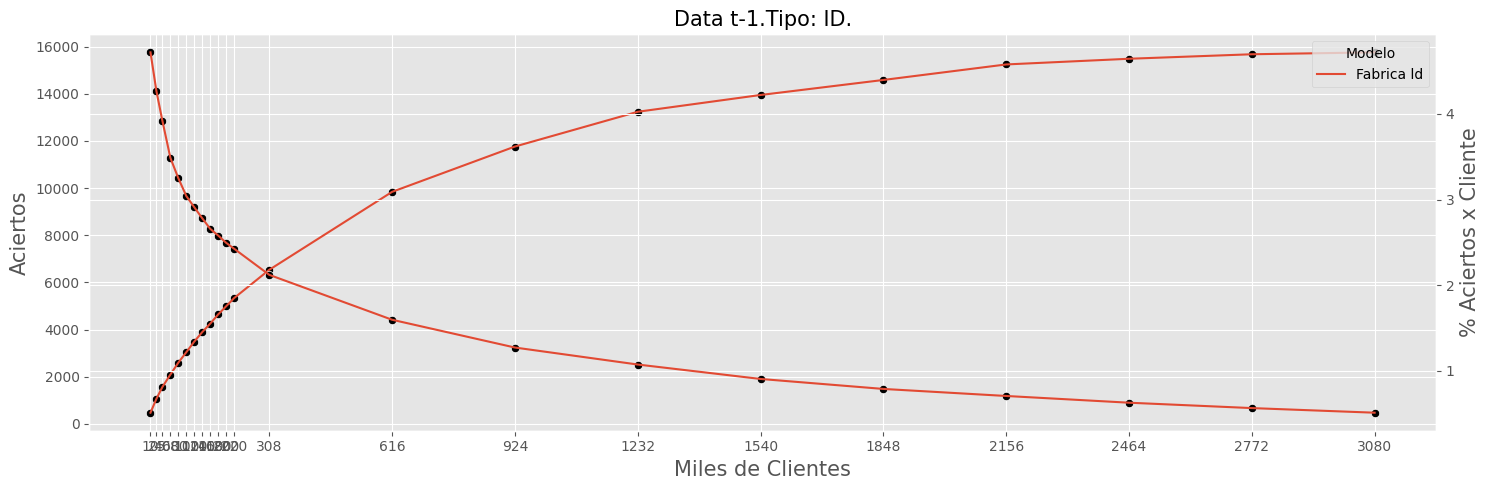

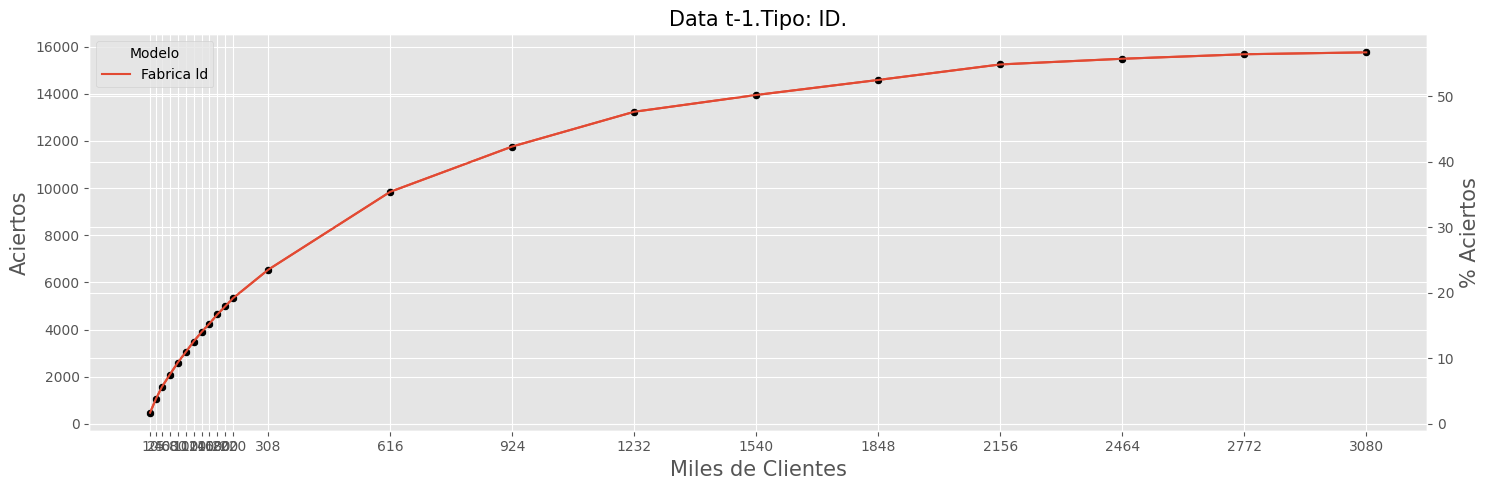

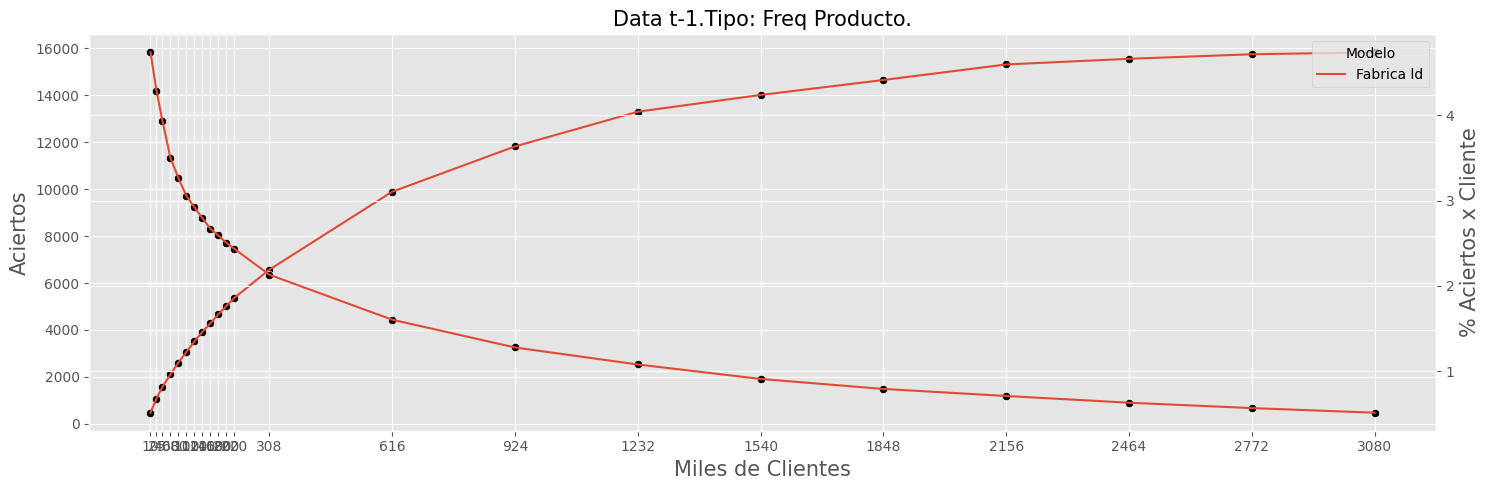

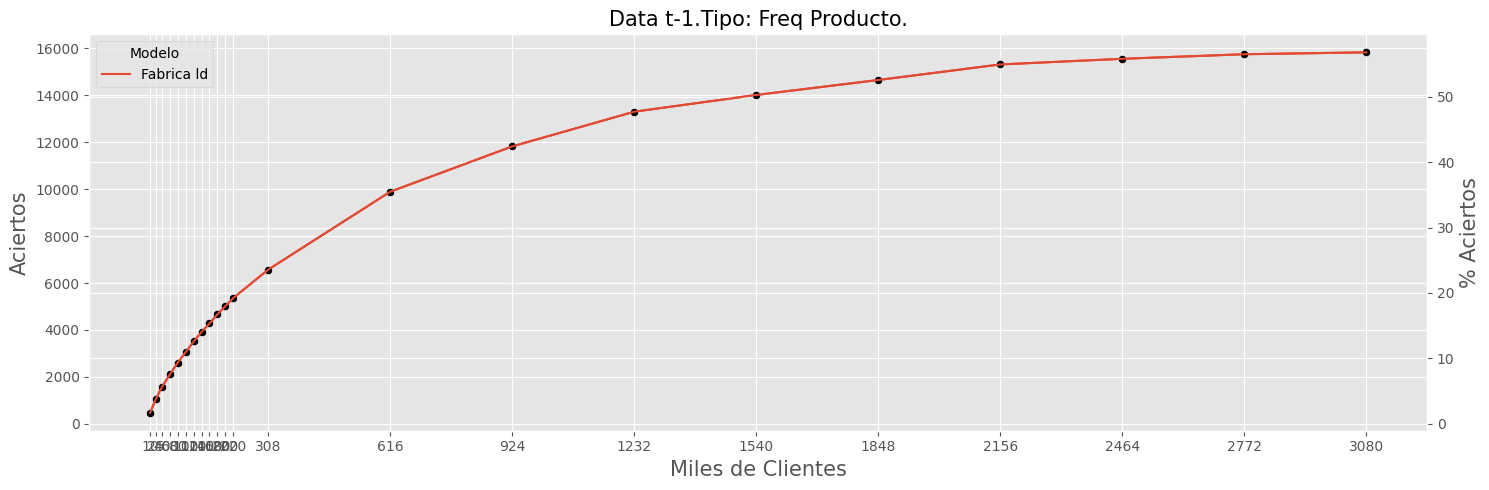

[01/23/25 14:23:00] INFO     ---------------------------------------------------                       ]8;id=393033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=181867;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

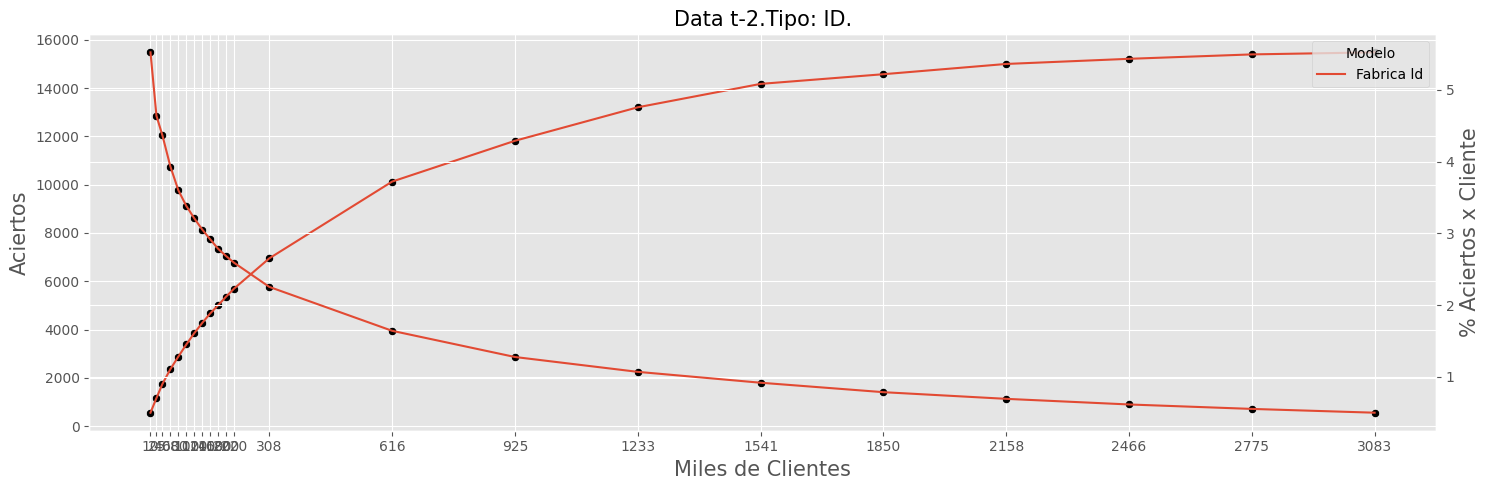

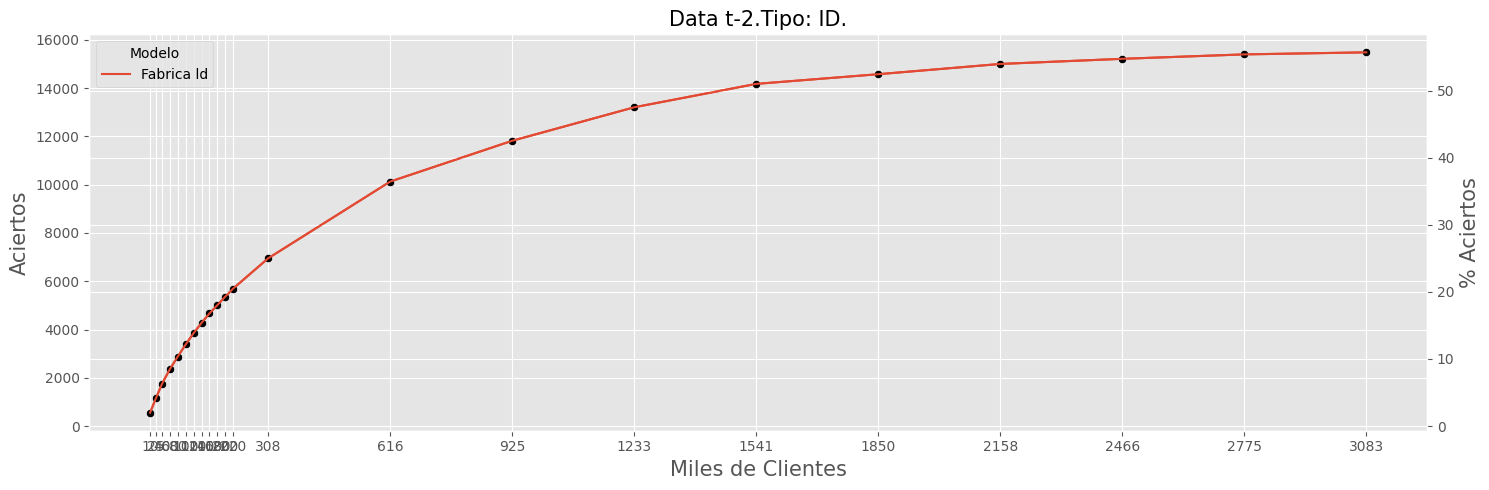

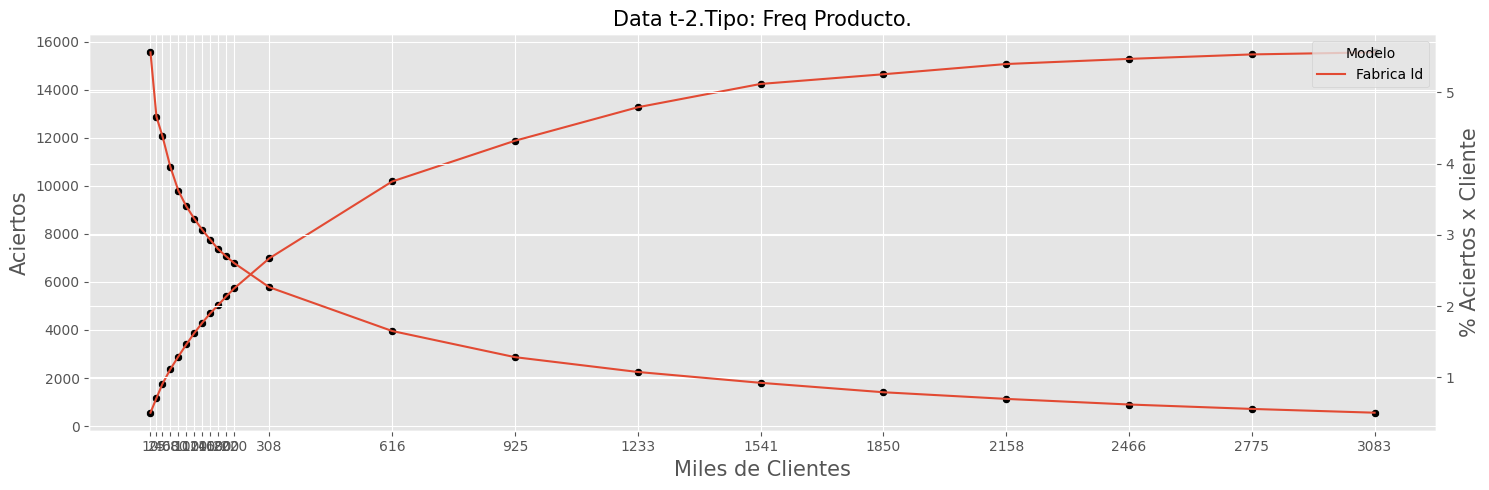

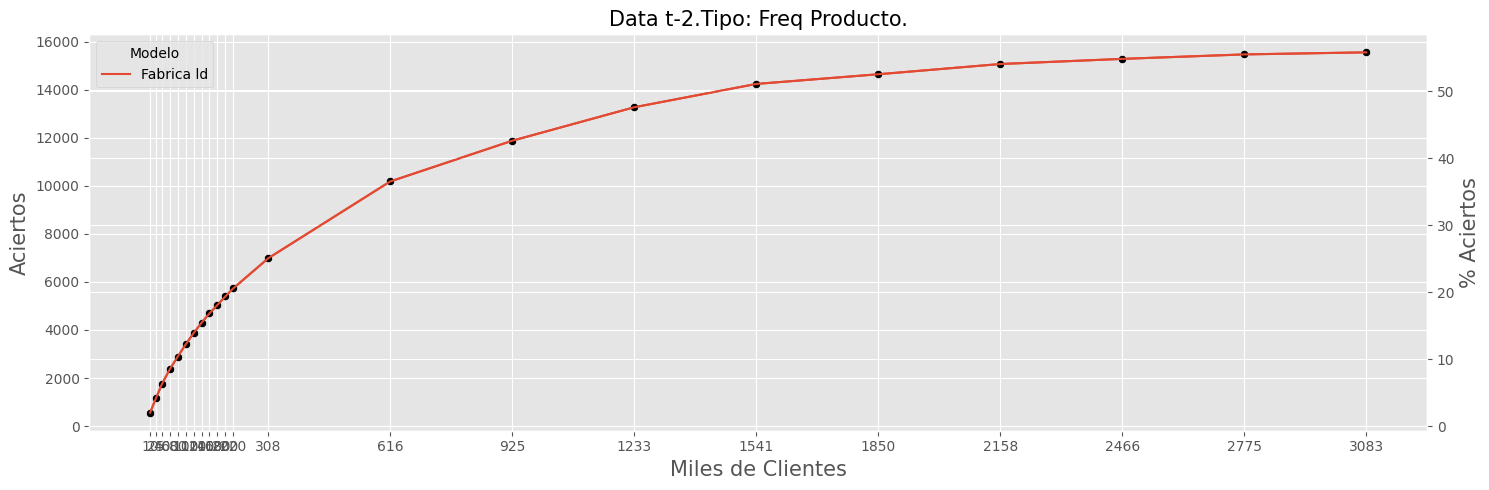

[01/23/25 14:23:02] INFO     ---------------------------------------------------                       ]8;id=885746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=938675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

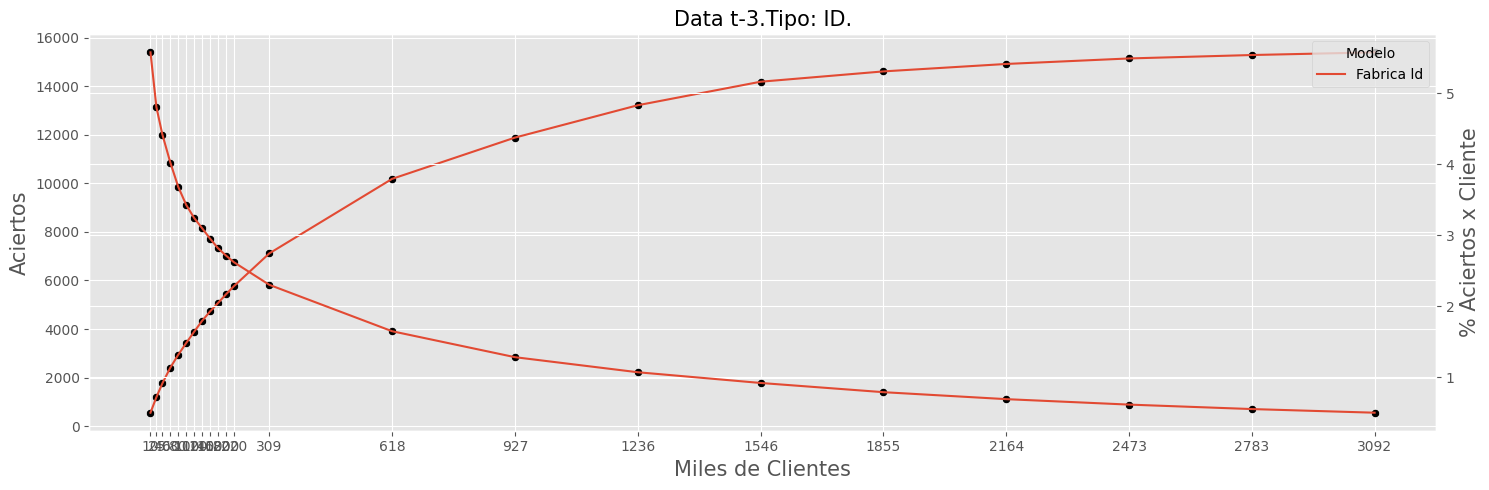

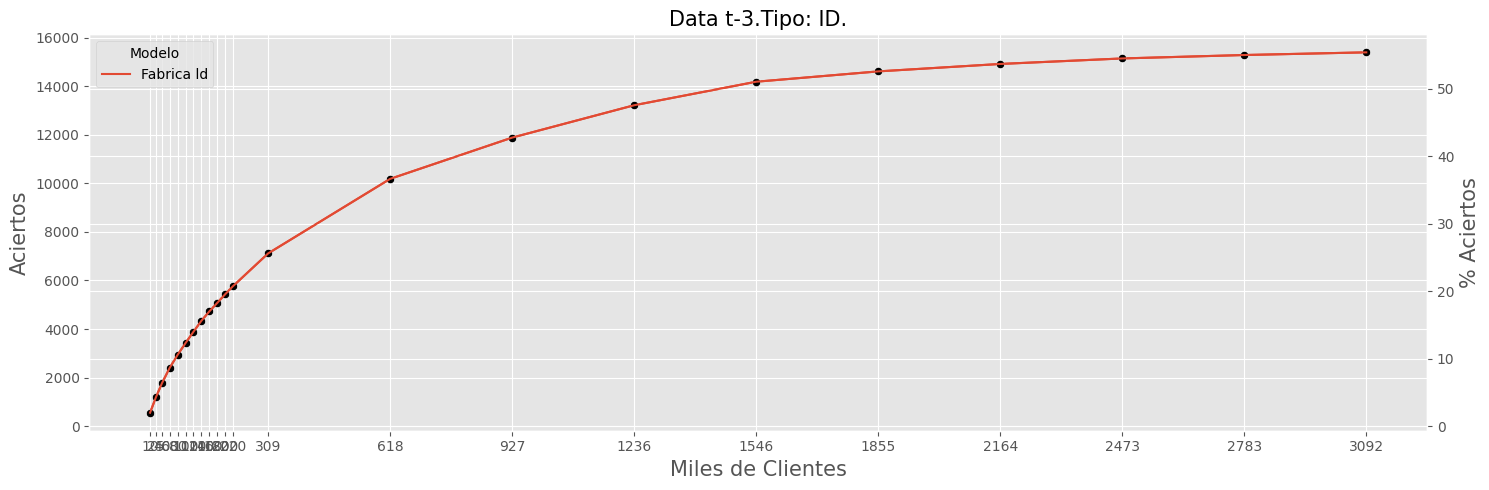

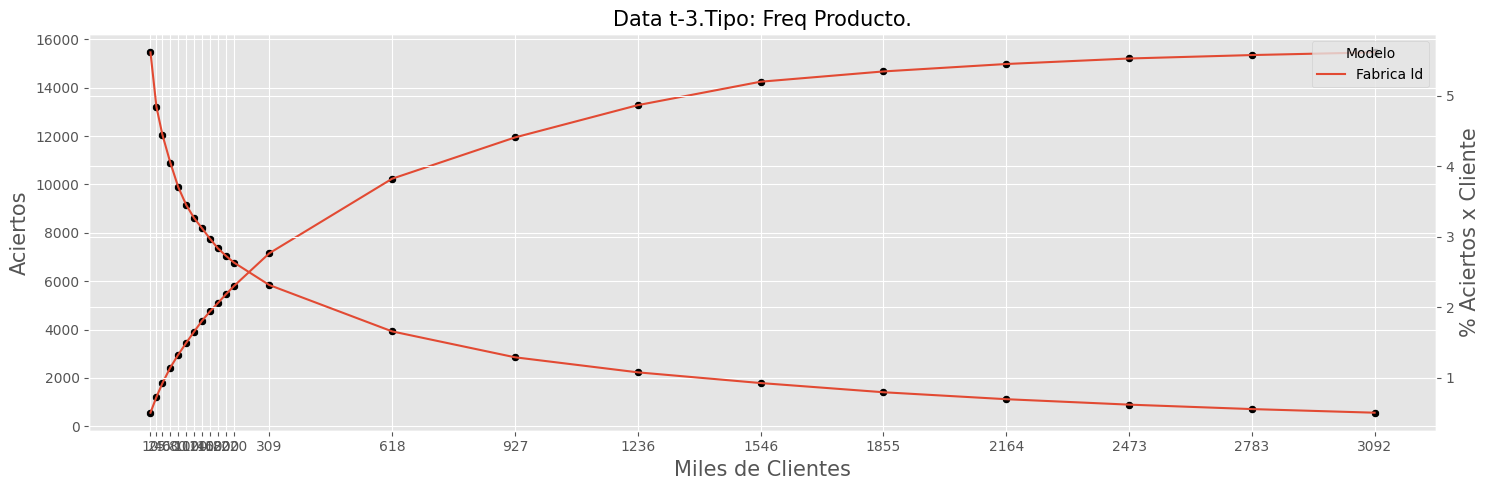

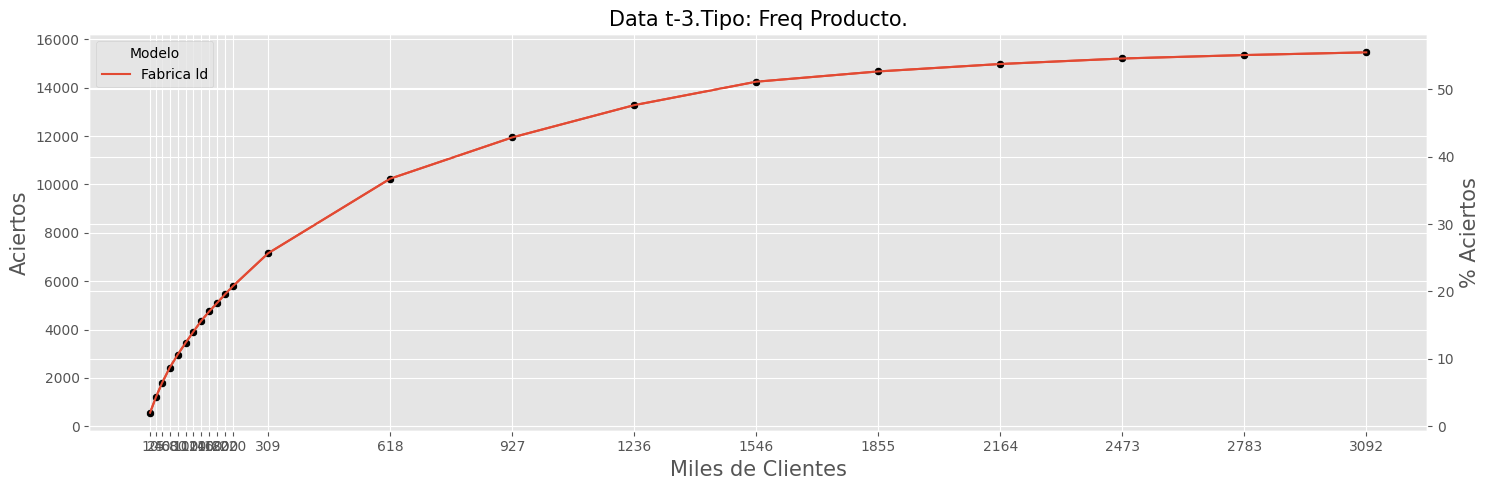

[01/23/25 14:23:03] INFO     ---------------------------------------------------                       ]8;id=219502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=851840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

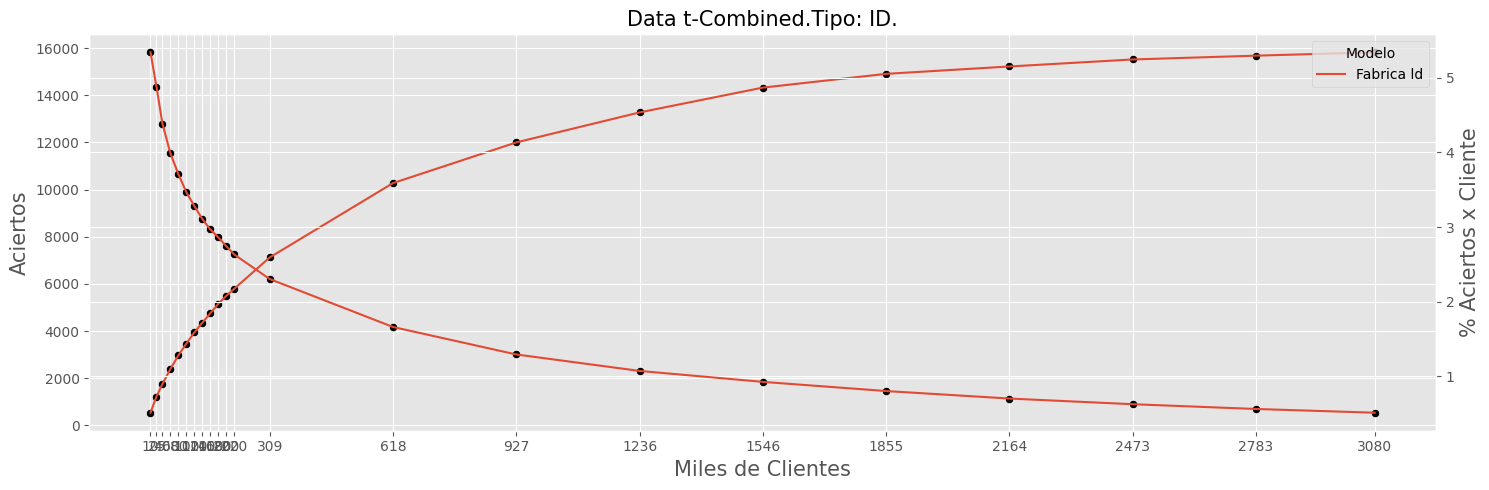

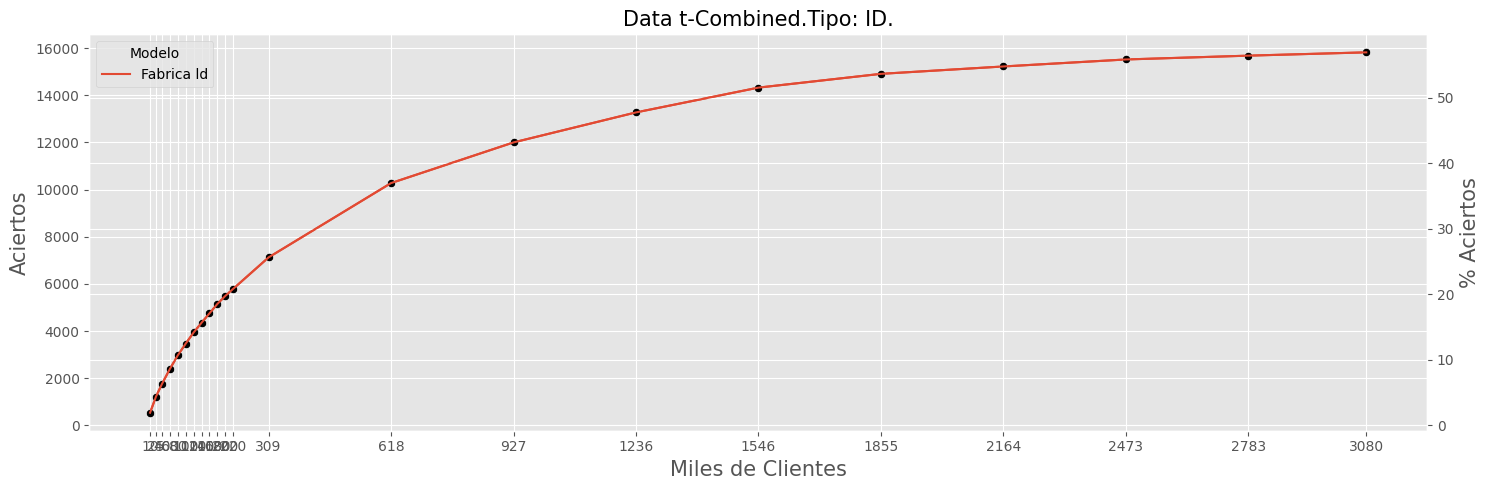

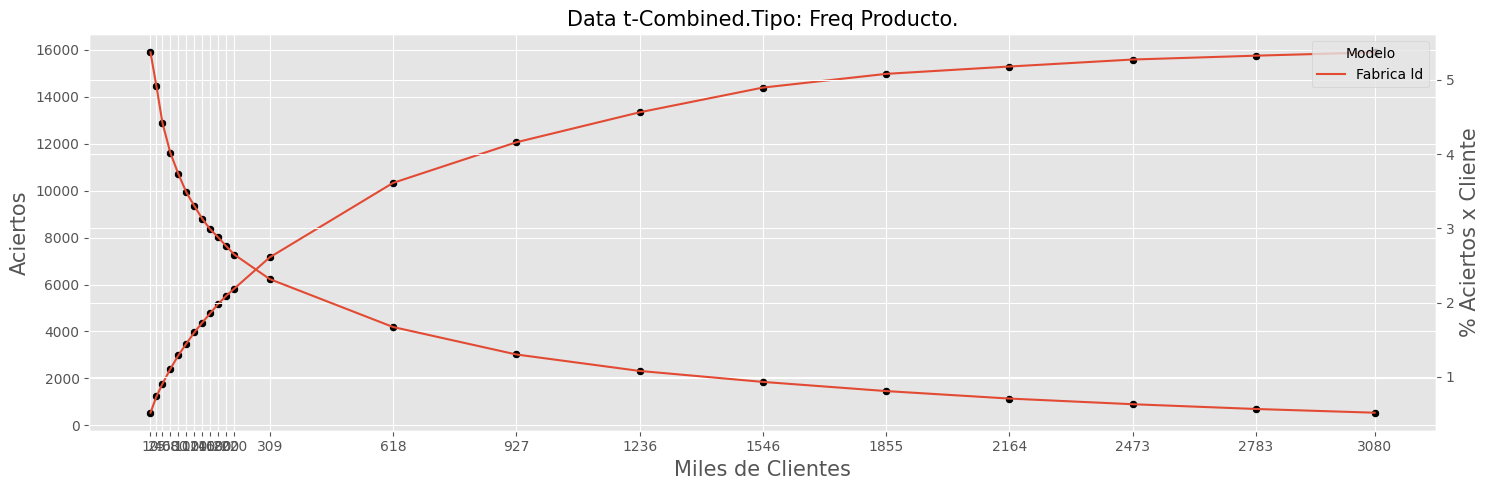

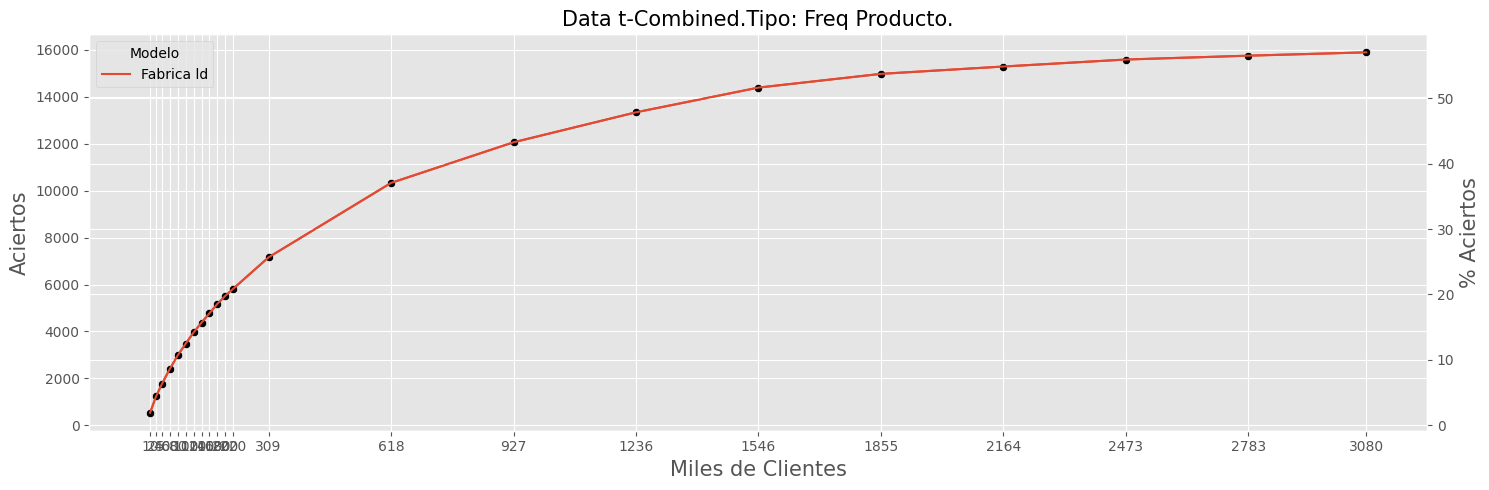

[01/23/25 14:23:05] INFO     ---------------------------------------------------                       ]8;id=48654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=550310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

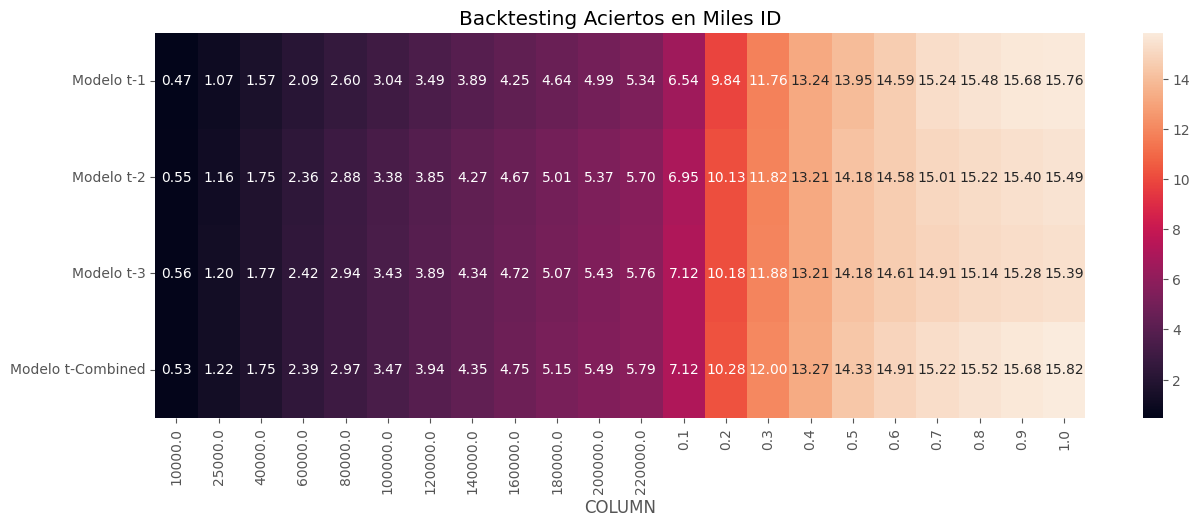

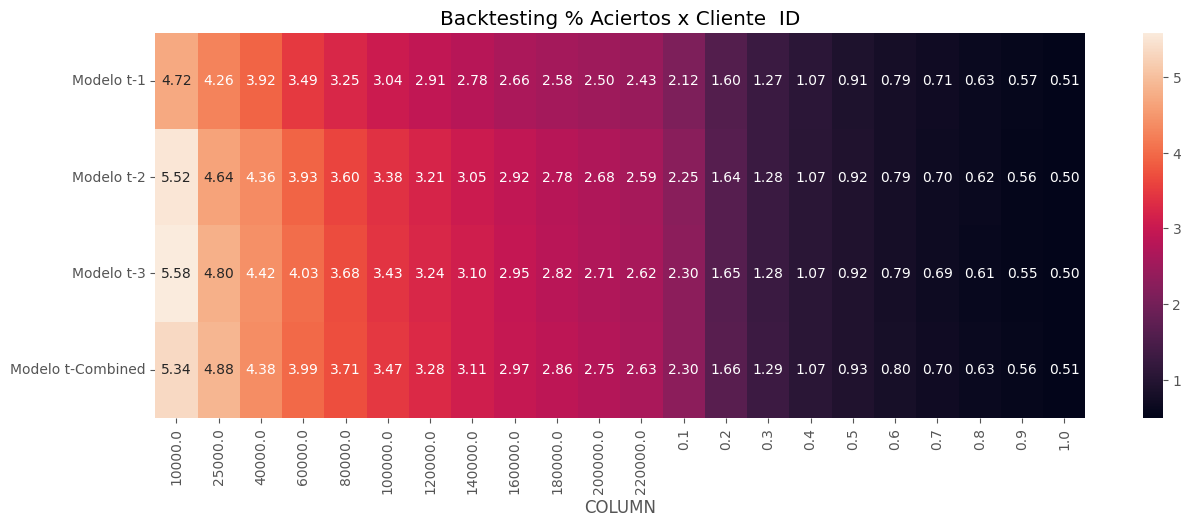

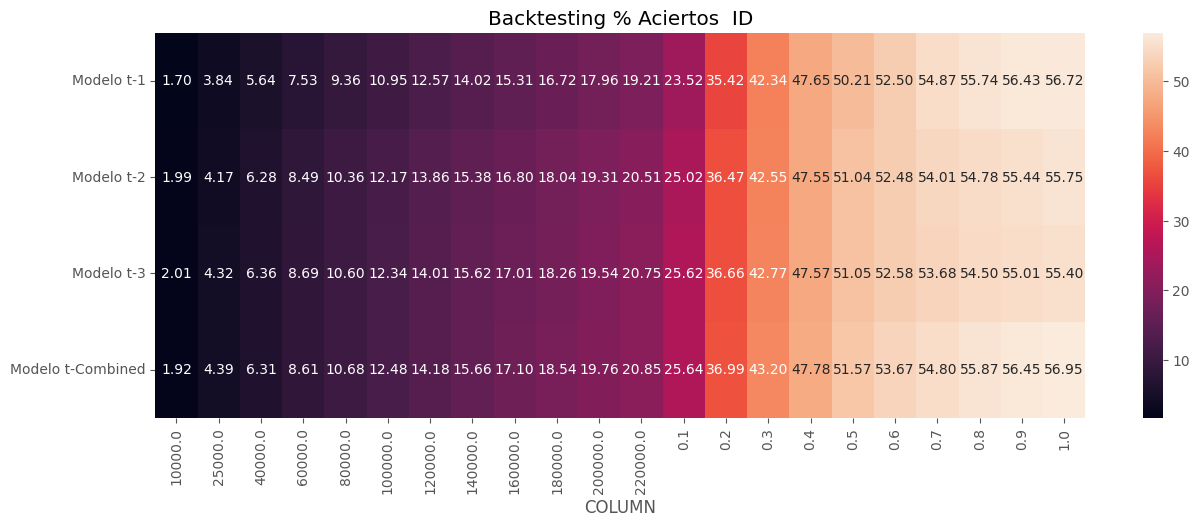

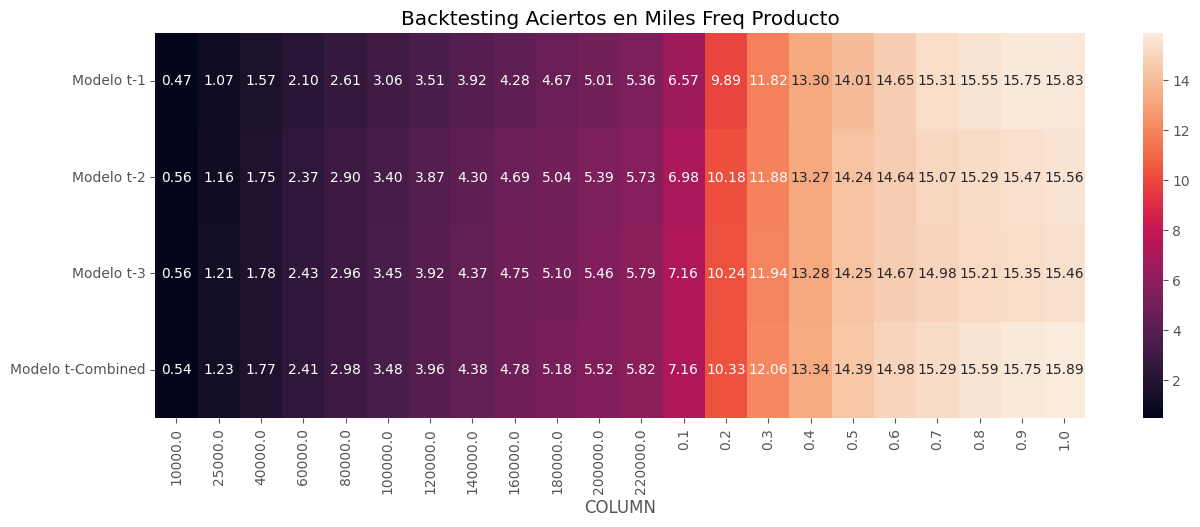

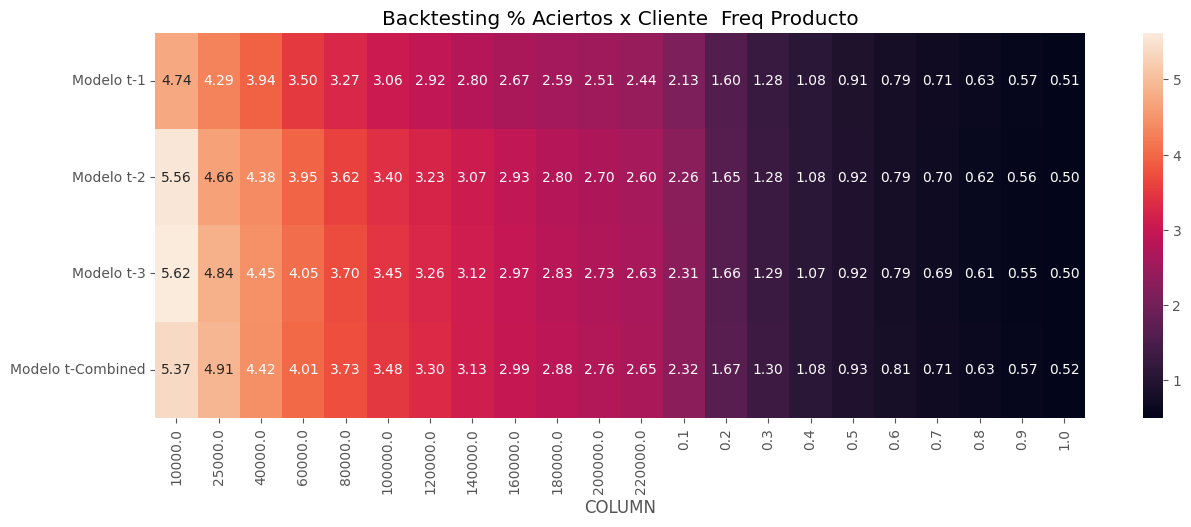

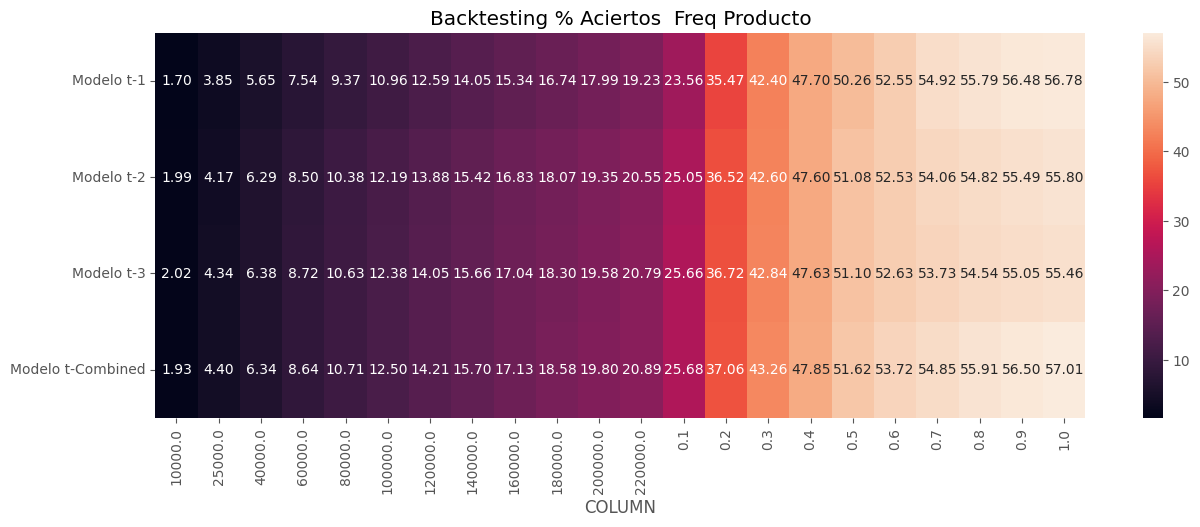

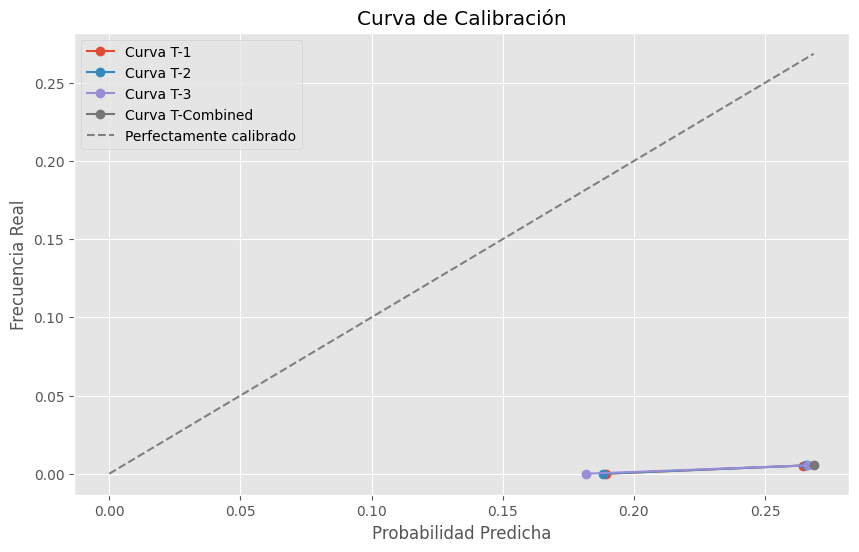

In [9]:
backtesting.plotear_curvas_rezago(save_backtesting, params)
plt.figure(figsize=(10, 6))
max_value = 0
for i in save_backtesting.keys():
    prob_true = save_backtesting[i]['prob_true']
    prob_pred = save_backtesting[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = str(int(i))
    except:
        msg = str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+" T-"+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [10]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for i in save_backtesting.keys():
    print(i,'Top Metrics')
    res = save_backtesting[i]['metrics']
    display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
    display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
    print('------------')

1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   1.2823  
3          1   1.2823  
5          1    100.0  
7          1   2.5322  
9          1    11852

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:20         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:20         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:20         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:20         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15756.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2986661.0

------------
2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   1.2913  
3          1   1.2913  
5          1    100.0  
7          1   2.5497  
9          1    11945

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:20         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:20         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:20         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:20         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15486.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2920177.0

------------
3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   1.3007  
3          1   1.3007  
5          1    100.0  
7          1   2.5679  
9          1    12066

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:20         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:20         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:20         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:20         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15391.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2853731.0

------------
Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   1.3153  
3          1   1.3153  
5          1    100.0  
7          1   2.5965  
9          1    12157

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:21         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:21         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:21         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:21         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15822.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2847077.0

------------


In [11]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['ks']
    display(res)

1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308088             6535            2.12   
1      9     26.99     27.00          308088             3305            1.07   
2      8     26.98     26.99          308088             1921            0.62   
3      7     26.95     26.98          308088             1475            0.48   
4      6     26.94     26.95          180992              545            0.30   
5      5     26.91     26.94          435183              804            0.18   
6      4     26.82     26.91          308088              658            0.21   
7      3     26.40     26.82          308088              241            0.08   
8      2     24.67     26.40          308088              191            0.06   
9      1     17.74     24.67          308088               81            0.03   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          41.48               10.00    31.48  
1          62.45               20.00    42.45  
2          74.64               30.00    44.64  
3          84.01               40.00    44.01  
4          87.47               45.87    41.59  
5          92.57               60.00    32.57  
6          96.74               70.00    26.74  
7          98.27               80.00    18.27  
8          99.49               90.00     9.49  
9         100.00              100.00     0.00

2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308346             6950            2.25   
1      9     27.00     27.00          308346             3180            1.03   
2      8     26.99     27.00          308346             1691            0.55   
3      7     26.98     26.99          308346             1388            0.45   
4      6     26.95     26.98          308346              970            0.31   
5      5     26.94     26.95          308346              401            0.13   
6      4     26.90     26.94          308346              425            0.14   
7      3     26.72     26.90          308333              213            0.07   
8      2     25.58     26.72          308359              183            0.06   
9      1     17.64     25.58          308346               85            0.03   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.88                10.0    34.88  
1          65.41                20.0    45.41  
2          76.33                30.0    46.33  
3          85.30                40.0    45.30  
4          91.56                50.0    41.56  
5          94.15                60.0    34.15  
6          96.89                70.0    26.89  
7          98.27                80.0    18.27  
8          99.45                90.0     9.45  
9         100.00               100.0     0.00

3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          309230             7116            2.30   
1      9     27.00     27.00          309229             3068            0.99   
2      8     26.99     27.00          309230             1698            0.55   
3      7     26.98     26.99          309229             1332            0.43   
4      6     26.97     26.98          309229              968            0.31   
5      5     26.96     26.97          233395              364            0.16   
6      4     26.94     26.96          385064              367            0.10   
7      3     26.85     26.94          309121              227            0.07   
8      2     26.12     26.85          309338              141            0.05   
9      1     15.90     26.12          309230              110            0.04   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          46.23               10.00    36.23  
1          66.17               20.00    46.17  
2          77.20               30.00    47.20  
3          85.86               40.00    45.86  
4          92.14               50.00    42.14  
5          94.51               57.55    36.96  
6          96.89               70.00    26.89  
7          98.37               80.00    18.37  
8          99.29               90.00     9.29  
9         100.00              100.00     0.00

Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308088             7109            2.31   
1      9     27.00     27.00          308088             3153            1.02   
2      8     26.99     27.00          308088             1725            0.56   
3      7     26.99     26.99          308088             1267            0.41   
4      6     26.98     26.99          308088             1054            0.34   
5      5     26.96     26.98          307778              592            0.19   
6      4     26.95     26.96          308398              313            0.10   
7      3     26.90     26.95          308088              300            0.10   
8      2     26.74     26.90          308088              162            0.05   
9      1     23.91     26.74          308088              147            0.05   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.93               10.00    34.93  
1          64.86               20.00    44.86  
2          75.76               30.00    45.76  
3          83.77               40.00    43.77  
4          90.43               50.00    40.43  
5          94.17               59.99    34.18  
6          96.15               70.00    26.15  
7          98.05               80.00    18.05  
8          99.07               90.00     9.07  
9         100.00              100.00     0.00

## Comparar backtesting

In [12]:
data_backtesting1 = catalog.load("data_backtesting_202410_exp2")
data_backtesting11 = catalog.load("data_backtesting_202410_exp1")
data_backtesting111 = catalog.load("data_backtesting_202410_anterior")

[01/23/25 14:23:08] INFO     Loading data from 'data_backtesting_202410_exp2'                   ]8;id=696482;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=31350;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/23/25 14:25:22] INFO     Loading data from 'data_backtesting_202410_exp1'                   ]8;id=764617;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=205989;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/23/25 14:27:35] INFO     Loading data from 'data_backtesting_202410_anterior'               ]8;id=507329;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=810865;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

In [13]:
data_backtesting2 = catalog.load("data_backtesting_202411_exp2")
data_backtesting22 = catalog.load("data_backtesting_202411_exp1")
data_backtesting222 = catalog.load("data_backtesting_202411_anterior")

[01/23/25 14:29:55] INFO     Loading data from 'data_backtesting_202411_exp2'                   ]8;id=642096;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=206395;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/23/25 14:32:34] INFO     Loading data from 'data_backtesting_202411_exp1'                   ]8;id=614352;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=875347;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/23/25 14:35:23] INFO     Loading data from 'data_backtesting_202411_anterior'               ]8;id=369214;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=290408;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

In [14]:
 nametag_model = ['202410 exp2','202410 exp1','202410_MVP4']+['202411 exp2','202411 exp1','202411_MVP4']
 backtesting_all = [data_backtesting1,data_backtesting11,data_backtesting111]+[data_backtesting2,data_backtesting22,data_backtesting222]
# nametag_model = ['202410','202411']
# backtesting_all = [data_backtesting1,data_backtesting2]

dict_keys(['ID', 'Freq Producto'])


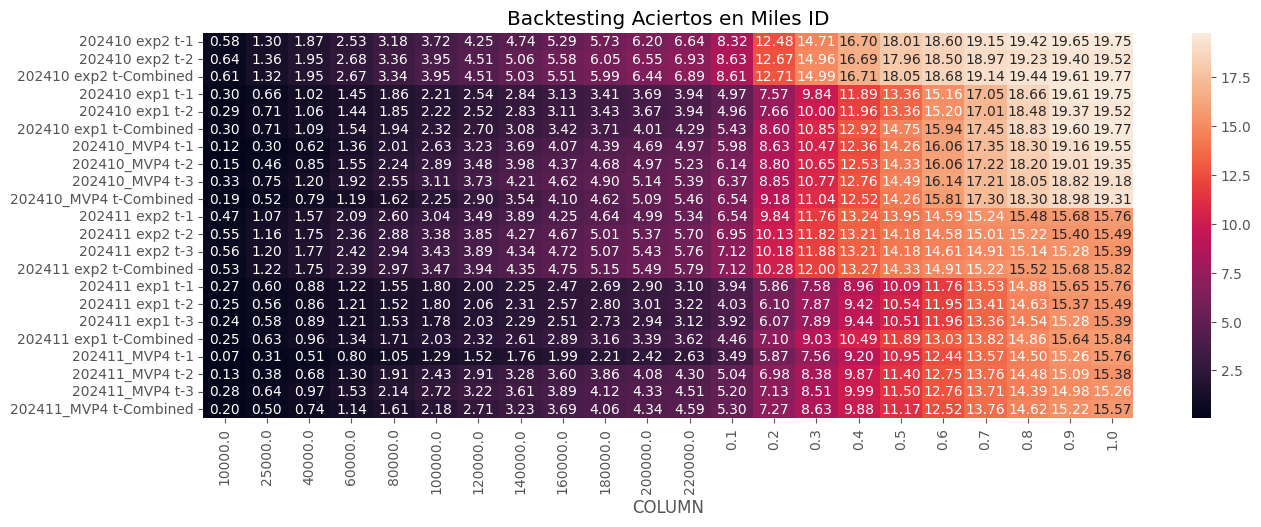

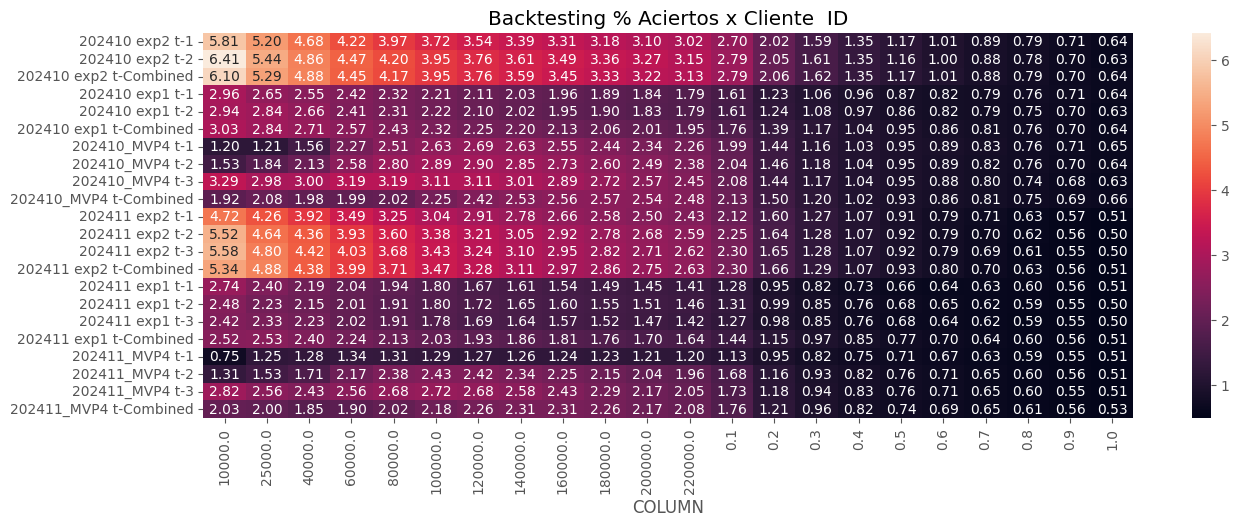

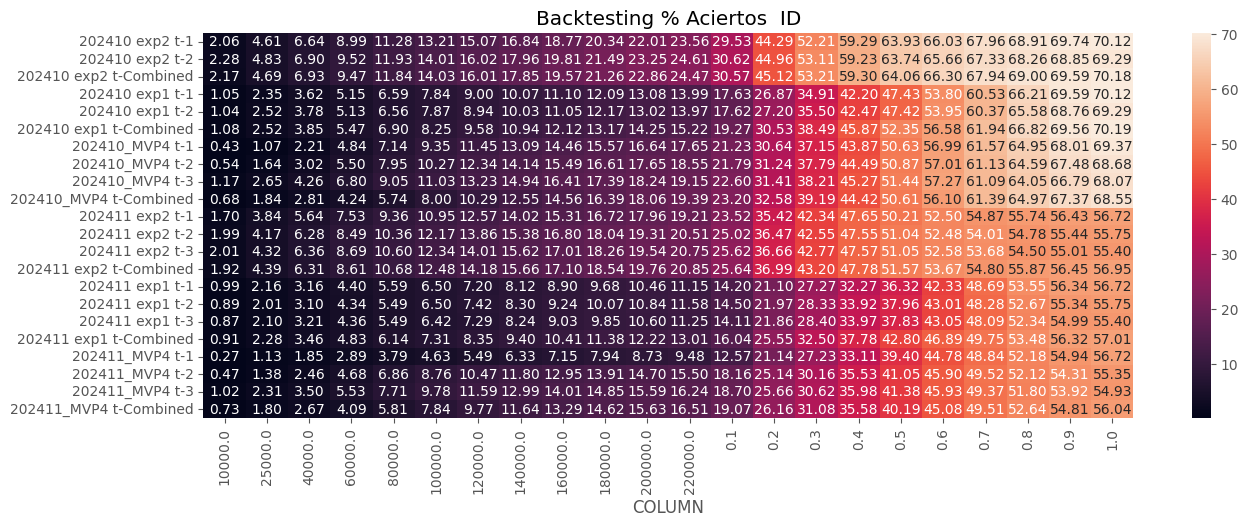

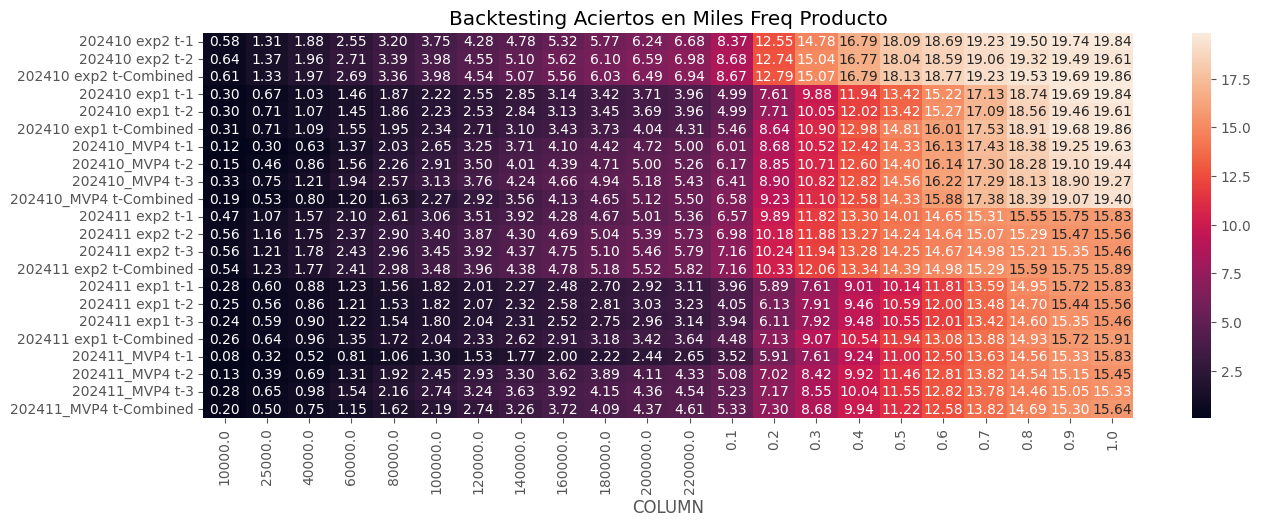

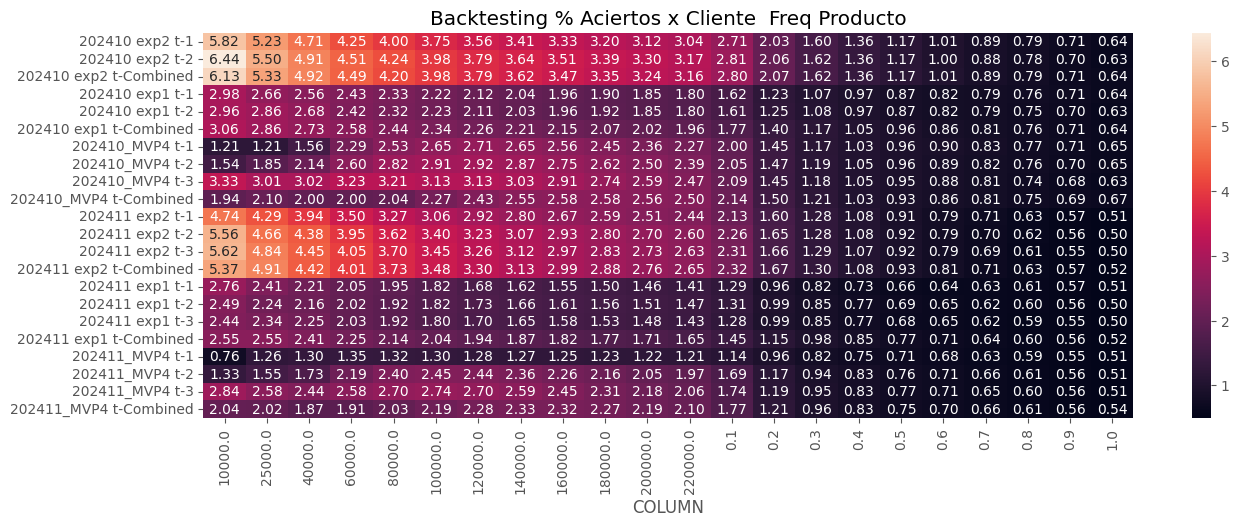

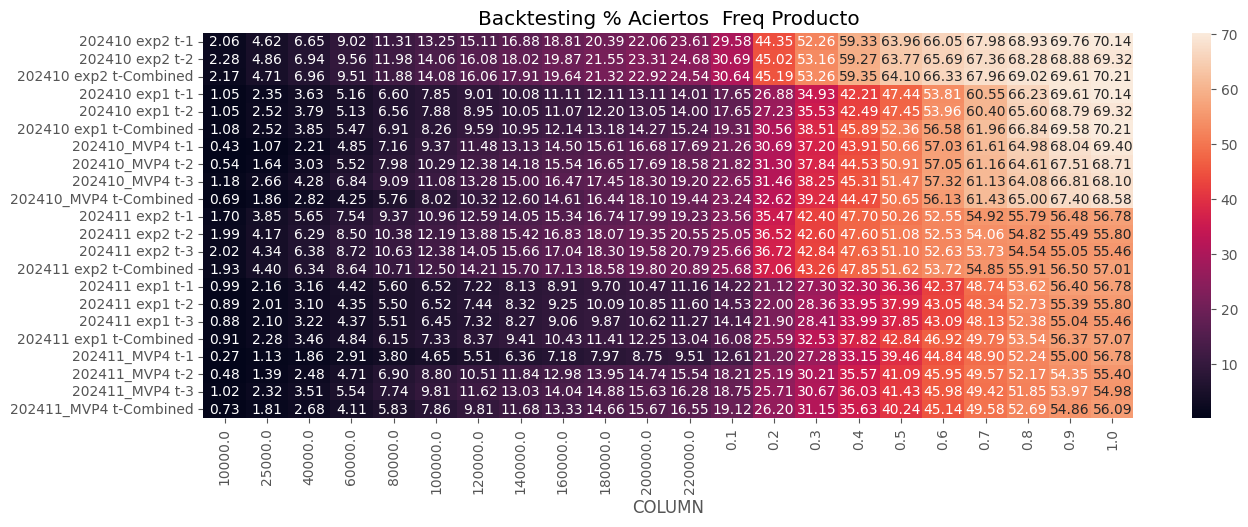

In [15]:
consolidacion_tipo = {}
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        df_i = save_backtesting[i]['contactabilidad_curva']#.keys()
        df_i = df_i[~df_i['Aciertos'].isnull()]
        df_i = df_i.replace('Fabrica '+params['target'].split('_')[0],name)
        df_i = df_i[df_i['Modelo'] == name]
        for tipo in df_i['Tipo'].unique():
            df_ii = df_i[df_i['Tipo'] == tipo]
            df_ii = df_ii.set_index('COLUMN')
            if tipo not in consolidacion_tipo:
                consolidacion_tipo[tipo] = {'Aciertos': pd.DataFrame(),'% Aciertos x Cliente':pd.DataFrame(),'% Aciertos': pd.DataFrame()}
            for col in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
                consolidacion_tipo[tipo][col] = pd.concat([consolidacion_tipo[tipo][col],df_ii[[col]].rename(columns = {col:name})], axis = 1)
print(consolidacion_tipo.keys())
import seaborn as sns
for col in list(consolidacion_tipo.keys()):
    for tipo in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
        if tipo == 'Aciertos':
            graph = consolidacion_tipo[col][tipo].T/1000
            msj = f'Backtesting {tipo} en Miles {col}'
        else:
            graph = consolidacion_tipo[col][tipo].T
            msj = f'Backtesting {tipo}  {col}'
        plt.figure(figsize=(15,5))
        sns.heatmap(graph, annot = True, fmt= '0.02f')
        plt.title(msj)
        plt.show()

In [17]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['ks']
        display(res)

202410 exp2 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308346             8319            2.70   
1      9     27.00     27.00          308346             4159            1.35   
2      8     26.99     27.00          308346             2231            0.72   
3      7     26.98     26.99          308346             1996            0.65   
4      6     26.95     26.98          308346             1306            0.42   
5      5     26.94     26.95          308346              592            0.19   
6      4     26.90     26.94          308346              544            0.18   
7      3     26.72     26.90          308333              269            0.09   
8      2     25.58     26.72          308359              232            0.08   
9      1     17.64     25.58          308346              107            0.03   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          42.11                10.0    32.11  
1          63.16                20.0    43.16  
2          74.46                30.0    44.46  
3          84.56                40.0    44.56  
4          91.17                50.0    41.17  
5          94.17                60.0    34.17  
6          96.92                70.0    26.92  
7          98.28                80.0    18.28  
8          99.46                90.0     9.46  
9         100.00               100.0     0.00

202410 exp2 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          309230             8626            2.79   
1      9     27.00     27.00          309229             4042            1.31   
2      8     26.99     27.00          309230             2297            0.74   
3      7     26.98     26.99          309229             1723            0.56   
4      6     26.97     26.98          309229             1270            0.41   
5      5     26.96     26.97          233395              463            0.20   
6      4     26.94     26.96          385064              549            0.14   
7      3     26.85     26.94          309121              261            0.08   
8      2     26.12     26.85          309338              167            0.05   
9      1     15.90     26.12          309230              124            0.04   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.19               10.00    34.19  
1          64.89               20.00    44.89  
2          76.66               30.00    46.66  
3          85.48               40.00    45.48  
4          91.99               50.00    41.99  
5          94.36               57.55    36.81  
6          97.17               70.00    27.17  
7          98.51               80.00    18.51  
8          99.36               90.00     9.36  
9         100.00              100.00     0.00

202410 exp2 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308346             8595            2.79   
1      9     27.00     27.00          308346             4101            1.33   
2      8     26.99     27.00          308346             2272            0.74   
3      7     26.99     26.99          308346             1715            0.56   
4      6     26.97     26.99          308346             1352            0.44   
5      5     26.96     26.97          298544              631            0.21   
6      4     26.95     26.96          318142              470            0.15   
7      3     26.89     26.95          308352              301            0.10   
8      2     26.64     26.89          308346              166            0.05   
9      1     23.30     26.64          308347              171            0.06   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          43.47               10.00    33.47  
1          64.21               20.00    44.21  
2          75.70               30.00    45.70  
3          84.37               40.00    44.37  
4          91.21               50.00    41.21  
5          94.40               59.68    34.71  
6          96.77               70.00    26.77  
7          98.30               80.00    18.30  
8          99.14               90.00     9.14  
9         100.00              100.00     0.00

202410 exp1 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30     27.30          308061             4964            1.61   
1      9     27.30     27.30          306055             2596            0.85   
2      8     27.30     27.30          310789             2274            0.73   
3      7     27.30     27.30          308369             2055            0.67   
4      6     27.30     27.30          307792             1474            0.48   
5      5     27.30     27.30          308798             1795            0.58   
6      4     27.30     27.30          308420             1896            0.61   
7      3     27.30     27.30          308444             1600            0.52   
8      2     27.29     27.30          308369              952            0.31   
9      1     25.86     27.29          308363              149            0.05   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.13                9.99    15.14  
1          38.27               19.92    18.35  
2          49.78               30.00    19.78  
3          60.18               40.00    20.19  
4          67.64               49.98    17.67  
5          76.73               59.99    16.74  
6          86.33               70.00    16.33  
7          94.43               80.00    14.43  
8          99.25               90.00     9.25  
9         100.00              100.00     0.00

202410 exp1 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30     27.30          308903             4961            1.61   
1      9     27.30     27.30          309042             2695            0.87   
2      8     27.30     27.30          309170             2345            0.76   
3      7     27.30     27.30          309427             1960            0.63   
4      6     27.30     27.30          309423             1398            0.45   
5      5     27.30     27.30          309075             1837            0.59   
6      4     27.30     27.30          306347             1810            0.59   
7      3     27.30     27.30          312335             1469            0.47   
8      2     27.29     27.30          309298              897            0.29   
9      1     25.98     27.29          309275              150            0.05   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.41                9.99    15.42  
1          39.22               19.98    19.23  
2          51.23               29.98    21.25  
3          61.27               39.99    21.28  
4          68.43               49.99    18.44  
5          77.84               59.99    17.85  
6          87.11               69.90    17.22  
7          94.64               80.00    14.64  
8          99.23               90.00     9.23  
9         100.00              100.00     0.00

202410 exp1 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30      27.3          308105             5415            1.76   
1      9     27.30      27.3          308359             3165            1.03   
2      8     27.30      27.3          308458             2249            0.73   
3      7     27.30      27.3          307819             2073            0.67   
4      6     27.30      27.3          308591             1809            0.59   
5      5     27.30      27.3          308740             1190            0.39   
6      4     27.30      27.3          308302             1517            0.49   
7      3     27.30      27.3          308173             1382            0.45   
8      2     27.30      27.3          308565              789            0.26   
9      1     27.29      27.3          308349              186            0.06   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          27.38                9.99    17.39  
1          43.39               19.99    23.40  
2          54.76               30.00    24.76  
3          65.24               39.98    25.26  
4          74.39               49.99    24.40  
5          80.41               60.00    20.41  
6          88.08               70.00    18.08  
7          95.07               79.99    15.08  
8          99.06               90.00     9.06  
9         100.00              100.00     0.00

202410_MVP4 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.36     93.89          300137             5981            1.99   
1      9      1.14      1.36          300136             2652            0.88   
2      8      0.80      1.14          300136             1834            0.61   
3      7      0.65      0.80          300137             1893            0.63   
4      6      0.57      0.65          300136             1904            0.63   
5      5      0.47      0.57          300136             1794            0.60   
6      4      0.36      0.47          300137             1288            0.43   
7      3      0.25      0.36          300136              953            0.32   
8      2      0.12      0.25          300136              862            0.29   
9      1      0.00      0.12          300137              385            0.13   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          30.60                10.0    20.60  
1          44.17                20.0    24.17  
2          53.55                30.0    23.55  
3          63.24                40.0    23.24  
4          72.98                50.0    22.98  
5          82.15                60.0    22.15  
6          88.74                70.0    18.74  
7          93.62                80.0    13.62  
8          98.03                90.0     8.03  
9         100.00               100.0     0.00

202410_MVP4 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.49     93.89          301027             6140            2.04   
1      9      1.19      1.49          301026             2663            0.88   
2      8      0.80      1.19          301026             1845            0.61   
3      7      0.64      0.80          301026             1886            0.63   
4      6      0.57      0.64          301026             1798            0.60   
5      5      0.46      0.57          301026             1730            0.57   
6      4      0.36      0.46          301026             1160            0.39   
7      3      0.25      0.36          301026              975            0.32   
8      2      0.12      0.25          301026              815            0.27   
9      1      0.00      0.12          301027              339            0.11   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          31.73                10.0    21.73  
1          45.49                20.0    25.49  
2          55.03                30.0    25.03  
3          64.77                40.0    24.77  
4          74.06                50.0    24.06  
5          83.00                60.0    23.00  
6          89.00                70.0    19.00  
7          94.04                80.0    14.04  
8          98.25                90.0     8.25  
9         100.00               100.0     0.00

202410_MVP4 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.58     93.89          306616             6367            2.08   
1      9      1.20      1.58          306616             2482            0.81   
2      8      0.79      1.20          306616             1918            0.63   
3      7      0.64      0.79          306615             1989            0.65   
4      6      0.56      0.64          306616             1737            0.57   
5      5      0.45      0.56          306615             1643            0.54   
6      4      0.35      0.45          306616             1075            0.35   
7      3      0.24      0.35          306616              835            0.27   
8      2      0.11      0.24          306616              771            0.25   
9      1      0.00      0.11          306616              361            0.12   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          33.20                10.0    23.20  
1          46.14                20.0    26.14  
2          56.14                30.0    26.14  
3          66.51                40.0    26.51  
4          75.57                50.0    25.57  
5          84.14                60.0    24.14  
6          89.74                70.0    19.74  
7          94.10                80.0    14.10  
8          98.12                90.0     8.12  
9         100.00               100.0     0.00

202410_MVP4 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.98     93.89          291332             6392            2.19   
1      9      1.35      1.98          291331             2553            0.88   
2      8      1.11      1.35          291331             1860            0.64   
3      7      0.80      1.11          291332             1419            0.49   
4      6      0.66      0.80          291331             1620            0.56   
5      5      0.59      0.66          291331             1531            0.53   
6      4      0.52      0.59          291332             1517            0.52   
7      3      0.39      0.52          291331             1018            0.35   
8      2      0.29      0.39          291331              766            0.26   
9      1      0.16      0.29          291332              638            0.22   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          33.10                10.0    23.10  
1          46.31                20.0    26.31  
2          55.94                30.0    25.94  
3          63.29                40.0    23.29  
4          71.68                50.0    21.68  
5          79.61                60.0    19.61  
6          87.46                70.0    17.46  
7          92.73                80.0    12.73  
8          96.70                90.0     6.70  
9         100.00               100.0     0.00

202411 exp2 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308088             6535            2.12   
1      9     26.99     27.00          308088             3305            1.07   
2      8     26.98     26.99          308088             1921            0.62   
3      7     26.95     26.98          308088             1475            0.48   
4      6     26.94     26.95          180992              545            0.30   
5      5     26.91     26.94          435183              804            0.18   
6      4     26.82     26.91          308088              658            0.21   
7      3     26.40     26.82          308088              241            0.08   
8      2     24.67     26.40          308088              191            0.06   
9      1     17.74     24.67          308088               81            0.03   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          41.48               10.00    31.48  
1          62.45               20.00    42.45  
2          74.64               30.00    44.64  
3          84.01               40.00    44.01  
4          87.47               45.87    41.59  
5          92.57               60.00    32.57  
6          96.74               70.00    26.74  
7          98.27               80.00    18.27  
8          99.49               90.00     9.49  
9         100.00              100.00     0.00

202411 exp2 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308346             6950            2.25   
1      9     27.00     27.00          308346             3180            1.03   
2      8     26.99     27.00          308346             1691            0.55   
3      7     26.98     26.99          308346             1388            0.45   
4      6     26.95     26.98          308346              970            0.31   
5      5     26.94     26.95          308346              401            0.13   
6      4     26.90     26.94          308346              425            0.14   
7      3     26.72     26.90          308333              213            0.07   
8      2     25.58     26.72          308359              183            0.06   
9      1     17.64     25.58          308346               85            0.03   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.88                10.0    34.88  
1          65.41                20.0    45.41  
2          76.33                30.0    46.33  
3          85.30                40.0    45.30  
4          91.56                50.0    41.56  
5          94.15                60.0    34.15  
6          96.89                70.0    26.89  
7          98.27                80.0    18.27  
8          99.45                90.0     9.45  
9         100.00               100.0     0.00

202411 exp2 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          309230             7116            2.30   
1      9     27.00     27.00          309229             3068            0.99   
2      8     26.99     27.00          309230             1698            0.55   
3      7     26.98     26.99          309229             1332            0.43   
4      6     26.97     26.98          309229              968            0.31   
5      5     26.96     26.97          233395              364            0.16   
6      4     26.94     26.96          385064              367            0.10   
7      3     26.85     26.94          309121              227            0.07   
8      2     26.12     26.85          309338              141            0.05   
9      1     15.90     26.12          309230              110            0.04   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          46.23               10.00    36.23  
1          66.17               20.00    46.17  
2          77.20               30.00    47.20  
3          85.86               40.00    45.86  
4          92.14               50.00    42.14  
5          94.51               57.55    36.96  
6          96.89               70.00    26.89  
7          98.37               80.00    18.37  
8          99.29               90.00     9.29  
9         100.00              100.00     0.00

202411 exp2 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.00     27.01          308088             7109            2.31   
1      9     27.00     27.00          308088             3153            1.02   
2      8     26.99     27.00          308088             1725            0.56   
3      7     26.99     26.99          308088             1267            0.41   
4      6     26.98     26.99          308088             1054            0.34   
5      5     26.96     26.98          307778              592            0.19   
6      4     26.95     26.96          308398              313            0.10   
7      3     26.90     26.95          308088              300            0.10   
8      2     26.74     26.90          308088              162            0.05   
9      1     23.91     26.74          308088              147            0.05   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.93               10.00    34.93  
1          64.86               20.00    44.86  
2          75.76               30.00    45.76  
3          83.77               40.00    43.77  
4          90.43               50.00    40.43  
5          94.17               59.99    34.18  
6          96.15               70.00    26.15  
7          98.05               80.00    18.05  
8          99.07               90.00     9.07  
9         100.00              100.00     0.00

202411 exp1 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30     27.30          307983             3945            1.28   
1      9     27.30     27.30          307615             1910            0.62   
2      8     27.30     27.30          307399             1712            0.56   
3      7     27.30     27.30          309339             1397            0.45   
4      6     27.30     27.30          307638             1122            0.36   
5      5     27.30     27.30          308366             1673            0.54   
6      4     27.30     27.30          308207             1765            0.57   
7      3     27.30     27.30          306894             1353            0.44   
8      2     27.29     27.30          309319              773            0.25   
9      1     25.23     27.29          308119              106            0.03   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.04               10.00    15.04  
1          37.16               19.98    17.18  
2          48.03               29.96    18.07  
3          56.89               40.00    16.89  
4          64.01               49.98    14.03  
5          74.63               59.99    14.64  
6          85.83               70.00    15.84  
7          94.42               79.96    14.46  
8          99.33               90.00     9.33  
9         100.00              100.00     0.00

202411 exp1 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30     27.30          308061             4028            1.31   
1      9     27.30     27.30          306055             2064            0.67   
2      8     27.30     27.30          310789             1777            0.57   
3      7     27.30     27.30          308369             1554            0.50   
4      6     27.30     27.30          307792             1118            0.36   
5      5     27.30     27.30          308798             1406            0.46   
6      4     27.30     27.30          308420             1464            0.47   
7      3     27.30     27.30          308444             1222            0.40   
8      2     27.29     27.30          308369              740            0.24   
9      1     25.86     27.29          308363              113            0.04   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          26.01                9.99    16.02  
1          39.34               19.92    19.42  
2          50.81               30.00    20.82  
3          60.85               40.00    20.85  
4          68.07               49.98    18.09  
5          77.15               59.99    17.15  
6          86.60               70.00    16.61  
7          94.49               80.00    14.49  
8          99.27               90.00     9.27  
9         100.00              100.00     0.00

202411 exp1 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30     27.30          308903             3919            1.27   
1      9     27.30     27.30          309042             2150            0.70   
2      8     27.30     27.30          309170             1814            0.59   
3      7     27.30     27.30          309427             1550            0.50   
4      6     27.30     27.30          309423             1074            0.35   
5      5     27.30     27.30          309075             1450            0.47   
6      4     27.30     27.30          306347             1401            0.46   
7      3     27.30     27.30          312335             1182            0.38   
8      2     27.29     27.30          309298              735            0.24   
9      1     25.98     27.29          309275              116            0.04   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          25.46                9.99    15.47  
1          39.43               19.98    19.45  
2          51.22               29.98    21.24  
3          61.29               39.99    21.30  
4          68.27               49.99    18.27  
5          77.69               59.99    17.70  
6          86.79               69.90    16.90  
7          94.47               80.00    14.47  
8          99.25               90.00     9.25  
9         100.00              100.00     0.00

202411 exp1 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     27.30      27.3          308076             4444            1.44   
1      9     27.30      27.3          307389             2634            0.86   
2      8     27.30      27.3          307983             1927            0.63   
3      7     27.30      27.3          307696             1459            0.47   
4      6     27.30      27.3          308199             1404            0.46   
5      5     27.30      27.3          308384             1128            0.37   
6      4     27.30      27.3          308564              785            0.25   
7      3     27.30      27.3          308111             1051            0.34   
8      2     27.30      27.3          308208              794            0.26   
9      1     27.29      27.3          308270              211            0.07   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          28.06               10.00    18.06  
1          44.69               19.98    24.72  
2          56.86               29.97    26.89  
3          66.07               39.96    26.11  
4          74.94               49.96    24.97  
5          82.06               59.97    22.09  
6          87.02               69.99    17.03  
7          93.65               79.99    13.66  
8          98.67               89.99     8.67  
9         100.00              100.00     0.00

202411_MVP4 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.22     93.89          308088             3493            1.13   
1      9      0.90      1.22          308088             2381            0.77   
2      8      0.72      0.90          308088             1690            0.55   
3      7      0.61      0.72          308088             1633            0.53   
4      6      0.55      0.61          308087             1749            0.57   
5      5      0.44      0.55          308088             1495            0.49   
6      4      0.35      0.44          308088             1128            0.37   
7      3      0.25      0.35          308088              927            0.30   
8      2      0.13      0.25          308088              767            0.25   
9      1      0.00      0.13          308088              493            0.16   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          22.17                10.0    12.17  
1          37.28                20.0    17.28  
2          48.01                30.0    18.01  
3          58.37                40.0    18.37  
4          69.47                50.0    19.47  
5          78.96                60.0    18.96  
6          86.12                70.0    16.12  
7          92.00                80.0    12.00  
8          96.87                90.0     6.87  
9         100.00               100.0     0.00

202411_MVP4 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.36     93.89          300137             5044            1.68   
1      9      1.14      1.36          300136             1939            0.65   
2      8      0.80      1.14          300136             1395            0.46   
3      7      0.65      0.80          300137             1491            0.50   
4      6      0.57      0.65          300136             1534            0.51   
5      5      0.47      0.57          300136             1347            0.45   
6      4      0.36      0.47          300137             1007            0.34   
7      3      0.25      0.36          300136              722            0.24   
8      2      0.12      0.25          300136              608            0.20   
9      1      0.00      0.12          300137              289            0.10   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          32.80                10.0    22.80  
1          45.41                20.0    25.41  
2          54.49                30.0    24.49  
3          64.18                40.0    24.18  
4          74.16                50.0    24.16  
5          82.92                60.0    22.92  
6          89.47                70.0    19.47  
7          94.17                80.0    14.17  
8          98.12                90.0     8.12  
9         100.00               100.0     0.00

202411_MVP4 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.49     93.89          301027             5196            1.73   
1      9      1.19      1.49          301026             1932            0.64   
2      8      0.80      1.19          301026             1377            0.46   
3      7      0.64      0.80          301026             1490            0.49   
4      6      0.57      0.64          301026             1501            0.50   
5      5      0.46      0.57          301026             1262            0.42   
6      4      0.36      0.46          301026              957            0.32   
7      3      0.25      0.36          301026              674            0.22   
8      2      0.12      0.25          301026              589            0.20   
9      1      0.00      0.12          301027              281            0.09   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          34.05                10.0    24.05  
1          46.71                20.0    26.71  
2          55.74                30.0    25.74  
3          65.50                40.0    25.50  
4          75.34                50.0    25.34  
5          83.61                60.0    23.61  
6          89.88                70.0    19.88  
7          94.30                80.0    14.30  
8          98.16                90.0     8.16  
9         100.00               100.0     0.00

202411_MVP4 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      1.69     93.89          291332             5225            1.79   
1      9      1.33      1.69          291331             1937            0.66   
2      8      0.98      1.33          291331             1350            0.46   
3      7      0.79      0.98          291332             1227            0.42   
4      6      0.68      0.79          291331             1220            0.42   
5      5      0.60      0.68          291331             1316            0.45   
6      4      0.54      0.60          291332             1213            0.42   
7      3      0.40      0.54          291331              958            0.33   
8      2      0.31      0.40          291331              630            0.22   
9      1      0.18      0.31          291332              491            0.17   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          33.56                10.0    23.56  
1          46.01                20.0    26.01  
2          54.68                30.0    24.68  
3          62.56                40.0    22.56  
4          70.40                50.0    20.40  
5          78.85                60.0    18.85  
6          86.64                70.0    16.64  
7          92.80                80.0    12.80  
8          96.85                90.0     6.85  
9         100.00               100.0     0.00

In [18]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name,'Top Metrics')
        res = save_backtesting[i]['metrics']
        display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
        display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
        print('------------')

202410 exp2 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   1.6027  
3          1   1.6027  
5          1    100.0  
7          1   3.1549  
9          1    14826

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 23:07         LD  Ensamble,       202411   True positives   
19  2025-01-22 23:07         LD  Ensamble,       202411  False negatives   
20  2025-01-22 23:07         LD  Ensamble,       202411   True negatives   
21  2025-01-22 23:07         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    19755.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2991311.0

------------
202410 exp2 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0    1.631  
3          1    1.631  
5          1    100.0  
7          1   3.2097  
9          1    15131

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 23:07         LD  Ensamble,       202411   True positives   
19  2025-01-22 23:07         LD  Ensamble,       202411  False negatives   
20  2025-01-22 23:07         LD  Ensamble,       202411   True negatives   
21  2025-01-22 23:07         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    19522.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2922157.0

------------
202410 exp2 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083461  
2        1.0   1.6349  
3          1   1.6349  
5          1    100.0  
7          1   3.2171  
9          1    15123

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 23:07         LD  Ensamble,       202411   True positives   
19  2025-01-22 23:07         LD  Ensamble,       202411  False negatives   
20  2025-01-22 23:07         LD  Ensamble,       202411   True negatives   
21  2025-01-22 23:07         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    19774.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2915683.0

------------
202410 exp1 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   1.0738  
3          1   1.0738  
5          1    100.0  
7          1   2.1248  
9          1     9933

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 18:19         LD  Ensamble,       202411   True positives   
19  2025-01-15 18:19         LD  Ensamble,       202411  False negatives   
20  2025-01-15 18:19         LD  Ensamble,       202411   True negatives   
21  2025-01-15 18:19         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    19755.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2991311.0

------------
202410 exp1 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   1.0978  
3          1   1.0978  
5          1    100.0  
7          1   2.1717  
9          1    10184

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 18:19         LD  Ensamble,       202411   True positives   
19  2025-01-15 18:19         LD  Ensamble,       202411  False negatives   
20  2025-01-15 18:19         LD  Ensamble,       202411   True negatives   
21  2025-01-15 18:19         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    19522.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2922157.0

------------
202410 exp1 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083461  
2        1.0   1.1911  
3          1   1.1911  
5          1    100.0  
7          1   2.3541  
9          1    11018

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 18:19         LD  Ensamble,       202411   True positives   
19  2025-01-15 18:19         LD  Ensamble,       202411  False negatives   
20  2025-01-15 18:19         LD  Ensamble,       202411   True negatives   
21  2025-01-15 18:19         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    19775.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2913184.0

------------
202410_MVP4 t-1 Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   900409  
1  dim shape  3001364  
2        1.0   1.1644  
3          1   1.1644  
5          1    100.0  
7          1   2.3019  
9          1    10484

timestamp model_name  model_type dataset_name      metric_name  \
20  2025-01-17 21:04         LD  MLP_3,Run4       202410   True positives   
21  2025-01-17 21:04         LD  MLP_3,Run4       202410  False negatives   
22  2025-01-17 21:04         LD  MLP_3,Run4       202410   True negatives   
23  2025-01-17 21:04         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall    19521.0  
21  overall metric    overall       25.0  
22  overall metric    overall    87980.0  
23  overall metric    overall  2821560.0

------------
202410_MVP4 t-2 Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   903078  
1  dim shape  3010262  
2        1.0   1.1816  
3          1   1.1816  
5          1    100.0  
7          1   2.3357  
9          1    10671

timestamp model_name  model_type dataset_name      metric_name  \
20  2025-01-17 21:04         LD  MLP_3,Run4       202410   True positives   
21  2025-01-17 21:04         LD  MLP_3,Run4       202410  False negatives   
22  2025-01-17 21:04         LD  MLP_3,Run4       202410   True negatives   
23  2025-01-17 21:04         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall    19320.0  
21  overall metric    overall       31.0  
22  overall metric    overall    88195.0  
23  overall metric    overall  2745179.0

------------
202410_MVP4 t-3 Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   919847  
1  dim shape  3066158  
2        1.0   1.1782  
3          1   1.1782  
5          1    100.0  
7          1    2.329  
9          1    10838

timestamp model_name  model_type dataset_name      metric_name  \
20  2025-01-17 21:04         LD  MLP_3,Run4       202410   True positives   
21  2025-01-17 21:04         LD  MLP_3,Run4       202410  False negatives   
22  2025-01-17 21:04         LD  MLP_3,Run4       202410   True negatives   
23  2025-01-17 21:04         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall    19128.0  
21  overall metric    overall       50.0  
22  overall metric    overall    86271.0  
23  overall metric    overall  2665931.0

------------
202410_MVP4 t-Combined Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   873994  
1  dim shape  2913314  
2        1.0   1.2406  
3          1   1.2406  
5          1    100.0  
7          1   2.4508  
9          1    10843

timestamp model_name  model_type dataset_name      metric_name  \
18  2025-01-17 21:05         LD  MLP_3,Run4       202410   True positives   
19  2025-01-17 21:05         LD  MLP_3,Run4       202410  False negatives   
20  2025-01-17 21:05         LD  MLP_3,Run4       202410   True negatives   
21  2025-01-17 21:05         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
18  overall metric    overall    19314.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2606359.0

------------
202411 exp2 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   1.2823  
3          1   1.2823  
5          1    100.0  
7          1   2.5322  
9          1    11852

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:20         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:20         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:20         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:20         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15756.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2986661.0

------------
202411 exp2 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   1.2913  
3          1   1.2913  
5          1    100.0  
7          1   2.5497  
9          1    11945

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:20         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:20         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:20         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:20         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15486.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2920177.0

------------
202411 exp2 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   1.3007  
3          1   1.3007  
5          1    100.0  
7          1   2.5679  
9          1    12066

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:20         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:20         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:20         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:20         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15391.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2853731.0

------------
202411 exp2 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   1.3153  
3          1   1.3153  
5          1    100.0  
7          1   2.5965  
9          1    12157

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-22 22:21         LD  Ensamble,       202411   True positives   
19  2025-01-22 22:21         LD  Ensamble,       202411  False negatives   
20  2025-01-22 22:21         LD  Ensamble,       202411   True negatives   
21  2025-01-22 22:21         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15822.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2847077.0

------------
202411 exp1 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.8276  
3          1   0.8276  
5          1    100.0  
7          1   1.6416  
9          1     7649

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 20:02         LD  Ensamble,       202411   True positives   
19  2025-01-15 20:02         LD  Ensamble,       202411  False negatives   
20  2025-01-15 20:02         LD  Ensamble,       202411   True negatives   
21  2025-01-15 20:02         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15756.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2986661.0

------------
202411 exp1 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.8649  
3          1   0.8649  
5          1    100.0  
7          1    1.715  
9          1     8001

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 20:03         LD  Ensamble,       202411   True positives   
19  2025-01-15 20:03         LD  Ensamble,       202411  False negatives   
20  2025-01-15 20:03         LD  Ensamble,       202411   True negatives   
21  2025-01-15 20:03         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15486.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2920177.0

------------
202411 exp1 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.8762  
3          1   0.8762  
5          1    100.0  
7          1   1.7371  
9          1     8128

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 20:03         LD  Ensamble,       202411   True positives   
19  2025-01-15 20:03         LD  Ensamble,       202411  False negatives   
20  2025-01-15 20:03         LD  Ensamble,       202411   True negatives   
21  2025-01-15 20:03         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15391.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2853731.0

------------
202411 exp1 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         LD  Ensamble,       202411                N n_top       n_top   
1         LD  Ensamble,       202411                  N all   dim shape   
2         LD  Ensamble,       202411  backtest_metric n_top       n_top   
3         LD  Ensamble,       202411        Precision n_top       n_top   
5         LD  Ensamble,       202411           recall n_top       n_top   
7         LD  Ensamble,       202411         f1-score n_top       n_top   
9         LD  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   0.9925  
3          1   0.9925  
5          1    100.0  
7          1   1.9654  
9          1     9173

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 20:03         LD  Ensamble,       202411   True positives   
19  2025-01-15 20:03         LD  Ensamble,       202411  False negatives   
20  2025-01-15 20:03         LD  Ensamble,       202411   True negatives   
21  2025-01-15 20:03         LD  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall    15837.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2844436.0

------------
202411_MVP4 t-1 Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.8218  
3          1   0.8218  
5          1    100.0  
7          1   1.6303  
9          1     7596

timestamp model_name  model_type dataset_name      metric_name  \
20  2025-01-17 21:38         LD  MLP_3,Run4       202410   True positives   
21  2025-01-17 21:38         LD  MLP_3,Run4       202410  False negatives   
22  2025-01-17 21:38         LD  MLP_3,Run4       202410   True negatives   
23  2025-01-17 21:38         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall    15723.0  
21  overall metric    overall       33.0  
22  overall metric    overall    32192.0  
23  overall metric    overall  2954469.0

------------
202411_MVP4 t-2 Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   900409  
1  dim shape  3001364  
2        1.0   0.9339  
3          1   0.9339  
5          1    100.0  
7          1   1.8505  
9          1     8409

timestamp model_name  model_type dataset_name      metric_name  \
20  2025-01-17 21:39         LD  MLP_3,Run4       202410   True positives   
21  2025-01-17 21:39         LD  MLP_3,Run4       202410  False negatives   
22  2025-01-17 21:39         LD  MLP_3,Run4       202410   True negatives   
23  2025-01-17 21:39         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall    15347.0  
21  overall metric    overall       29.0  
22  overall metric    overall    87257.0  
23  overall metric    overall  2752471.0

------------
202411_MVP4 t-3 Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   903078  
1  dim shape  3010262  
2        1.0   0.9467  
3          1   0.9467  
5          1    100.0  
7          1   1.8755  
9          1     8549

timestamp model_name  model_type dataset_name      metric_name  \
20  2025-01-17 21:39         LD  MLP_3,Run4       202410   True positives   
21  2025-01-17 21:39         LD  MLP_3,Run4       202410  False negatives   
22  2025-01-17 21:39         LD  MLP_3,Run4       202410   True negatives   
23  2025-01-17 21:39         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall    15225.0  
21  overall metric    overall       34.0  
22  overall metric    overall    87352.0  
23  overall metric    overall  2688136.0

------------
202411_MVP4 t-Combined Top Metrics


model_name  model_type dataset_name            metric_name metric_type  \
0         LD  MLP_3,Run4       202410                N n_top       n_top   
1         LD  MLP_3,Run4       202410                  N all   dim shape   
2         LD  MLP_3,Run4       202410  backtest_metric n_top       n_top   
3         LD  MLP_3,Run4       202410        Precision n_top       n_top   
5         LD  MLP_3,Run4       202410           recall n_top       n_top   
7         LD  MLP_3,Run4       202410         f1-score n_top       n_top   
9         LD  MLP_3,Run4       202410         true_sum n_top       n_top   

  class_name    value  
0          1   873994  
1  dim shape  2913314  
2        1.0   0.9764  
3          1   0.9764  
5          1    100.0  
7          1    1.934  
9          1     8534

timestamp model_name  model_type dataset_name      metric_name  \
18  2025-01-17 21:40         LD  MLP_3,Run4       202410   True positives   
19  2025-01-17 21:40         LD  MLP_3,Run4       202410  False negatives   
20  2025-01-17 21:40         LD  MLP_3,Run4       202410   True negatives   
21  2025-01-17 21:40         LD  MLP_3,Run4       202410  False positives   

       metric_type class_name      value  
18  overall metric    overall    15567.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2684833.0

------------
